# CREDIT EDA ASSIGNMENT : CASE STUDY

## PROBLEM STATEMENT

- The loan providing companies have to make a decision when they receive a loan application of whether to accept or reject it. These decisions are made on the basis of various factors. 
- Sometimes due to unavailability of enough credit history data, some customers take advantage and become defaulters on the loan payments. 
- Thus, the problem statement basically deals with conducting an EDA of the given dataset to minimise risk associated with bank's lending activities.
- There are basically teo risks that are to be minimised : 1) If an applicant who is a non-defaulter is rejected then it would lead to business loss to the company and secondly, 2) If a defaulter's application is accepted then it would cause financial loss to the company.

## BUSINESS OBJECTIVE: 

- The following case study is aimed towards the identification of patterns which indicate wheather a client incurrs any difficulty while paying their loan instalments. This data could be used for undertaking necessary actions such as denying the loan, reducing the amount of loan, lending at a higher interest rate, etc. 
- This is being undertaken to ensure that the consumers who are capable of repaying the loan are not rejected, which may inturn cause a loss to the company.
- Identification of such applicants using Exploratory Data Analysis (EDA) is the aim of this case study. In other words, the company aims to understand the key driving factors behind loan default, i.e. the variables which are strong indicators of loan default. The company can utilise this knowledge for its portfolio and risk assessment.

In [1]:
#We begin by importing the necessary libraries to conduct the EDA. We also import the warnings that are essential.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# APPLICATION_DATA DATASET ANALYSIS

In [2]:
#Now we go ahead and read the .csv files that contain the essential datasets for conducting the EDA. There are two datasets that have been provided we begin by importing them one by one and conducting some basic analysis to understand the type and shape of the dataset.

application_data = pd.read_csv("application_data.csv")
application_data.head(10)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   
5      100008       0         Cash loans           M            N   
6      100009       0         Cash loans           F            Y   
7      100010       0         Cash loans           M            Y   
8      100011       0         Cash loans           F            N   
9      100012       0    Revolving loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   
5               Y             0           99000.0    490495.5      27517.5   
6               Y             1          171000.0   1560726.0      41301.0   
7               Y             0          360000.0   1530000.0      42075.0   
8               Y             0          112500.0   1019610.0      33826.5   
9               Y             0          135000.0    405000.0      20250.0   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   
5  ...                 0                0                0                0   
6  ...                 0                0                0                0   
7  ...                 0                0                0                0   
8  ...                 0                0                0                0   
9  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   
5                        0.0                       0.0   
6                        0.0                       0.0   
7                        0.0                       0.0   
8                        0.0                       0.0   
9                        NaN                       NaN   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   
5                         0.0                        0.0   
6                         0.0                        1.0   
7                         0.0                        0.0   
8                         0.0                        0.0   
9                         NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0         

In [3]:
#Now we analyse the shape of the first dataset.

application_data.shape

(307511, 122)

The first dataset named "application_data" has the following shape:

- 307511 rows
- 122 columns

In [4]:
# Analysing the datatypes of the dataset.

application_data.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

As it can be observed from the above analysis that the dataset has columns of the following datatypes:

- float64 : 65
- int64 : 41
- object : 16

In [5]:
#Applying the "describe" function enables us to get a brief overview of the entire dataset.

application_data.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  ...  \
count               307511.000000  307511.000000  307511.000000  ...   
mean                     0.020868  -16036.995067   63815.045904  ...   
std                      0.013831    4363.988632  141275.766519  ...   
min                      0.000290  -25229.000000  -17912.000000  ...   
25%                      0.010006  -19682.000000   -2760.000000  ...   
50%                      0.018850  -15750.000000   -1213.000000  ...   
75%                      0.028663  -12413.000000    -289.000000  ...   
max                      0.072508   -7489.000000  365243.000000  ...   

       FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  \
count     307511.000000     307511.000000     307511.000000     307511.000000   
mean           0.008130          0.000595          0.000507          0.000335   
std            0.089798          0.024387          0.022518          0.018299   
min            0.000000          0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000          0.000000   
50%            0.000000          0.000000          0.000000          0.000000   
75%            0.000000          0.000000          0.000000          0.000000   
max            1.000000          1.000000          1.000000          1.000000   

       AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
count               265992.000000              265992.000000   
mean                     0.006402                   0.007000   
std                      0.083849                   0.110757   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      4.000000                   9.000000   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
count               265992.000000              265992.000000   
mean                     0.034362                   0.267395   
std                      0.204685                   0.916002   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      8.000000                  27.000000   

       AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
count              265992.000000               265992.000000  
mean                    0.265474                    1.899974  
std                     0.794056                    1.869295  
min                     0.000000                    0.000000  
25%              

### MISSING VALUE ANALYSIS

Here, we analyse the missing values in the dataset "application_data". The columns that have missing values greater than 40% are dropped. The remaining columns with lessser percentage of missing values are dealt by imputing the null values according to the nature of the variable and column.

- First, we calculate the percentage of missing values in each column.
- Secondly, we drop the columns with missing values greater than or equal to 40%.

In [6]:
# The code below helps us understand the number os unique values contained in each column.

application_data.nunique()

SK_ID_CURR                    307511
TARGET                             2
NAME_CONTRACT_TYPE                 2
CODE_GENDER                        3
FLAG_OWN_CAR                       2
                               ...  
AMT_REQ_CREDIT_BUREAU_DAY          9
AMT_REQ_CREDIT_BUREAU_WEEK         9
AMT_REQ_CREDIT_BUREAU_MON         24
AMT_REQ_CREDIT_BUREAU_QRT         11
AMT_REQ_CREDIT_BUREAU_YEAR        25
Length: 122, dtype: int64

In [7]:
# Percentage of missing values in each column.

null_values = application_data.isnull().mean()*100
null_values.sort_values(ascending = False).head(20)

COMMONAREA_MEDI             69.872297
COMMONAREA_AVG              69.872297
COMMONAREA_MODE             69.872297
NONLIVINGAPARTMENTS_MODE    69.432963
NONLIVINGAPARTMENTS_AVG     69.432963
NONLIVINGAPARTMENTS_MEDI    69.432963
FONDKAPREMONT_MODE          68.386172
LIVINGAPARTMENTS_MODE       68.354953
LIVINGAPARTMENTS_AVG        68.354953
LIVINGAPARTMENTS_MEDI       68.354953
FLOORSMIN_AVG               67.848630
FLOORSMIN_MODE              67.848630
FLOORSMIN_MEDI              67.848630
YEARS_BUILD_MEDI            66.497784
YEARS_BUILD_MODE            66.497784
YEARS_BUILD_AVG             66.497784
OWN_CAR_AGE                 65.990810
LANDAREA_MEDI               59.376738
LANDAREA_MODE               59.376738
LANDAREA_AVG                59.376738
dtype: float64

In [8]:
# We create a list with all the columns with missing values greater than or equal to 40%.

drop_columns_1 = null_values[null_values.values >=40.00].index.tolist()

In [9]:
# Number of columns with missing values greater than or equal to 40%.

len(drop_columns_1)

49

In [10]:
# We drop columns with missing values greater than or equal to 40%.

application_data.drop(drop_columns_1, axis =1, inplace = True)

In [11]:
# The shape of the dataset after dropping the high missing value columns.

application_data.shape

(307511, 73)

After dropping the columns with huge amount of missing values that shape of the dataset is as follows:

- 307511 rows
- 73 columns

In [12]:
# The code below gives us an idea about the rest of the columns in the dataset.

application_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

### CATEGORISATION OF VARIABLES

Before, we deal with rest of the missing values, let us categorise the variables and then conduct the further analysis based on the datatypes.

We categorise the variables in the following types:

- Categorical columns : Based on the columns that are flag columns and columns with "object" datatype.
- Numerical columns : Includes columns that have "int64" and "float64" datatype.

In [13]:
# This gives information about the columns of the dataset.

application_data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_C

In [14]:
application_data.select_dtypes(include = "object")

NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0              Cash loans           M            N               Y   
1              Cash loans           F            N               N   
2         Revolving loans           M            Y               Y   
3              Cash loans           F            N               Y   
4              Cash loans           M            N               Y   
...                   ...         ...          ...             ...   
307506         Cash loans           M            N               N   
307507         Cash loans           F            N               Y   
307508         Cash loans           F            N               Y   
307509         Cash loans           F            N               Y   
307510         Cash loans           F            N               N   

       NAME_TYPE_SUITE      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0        Unaccompanied               Working  Secondary / secondary special   
1               Family         State servant               Higher education   
2        Unaccompanied               Working  Secondary / secondary special   
3        Unaccompanied               Working  Secondary / secondary special   
4        Unaccompanied               Working  Secondary / secondary special   
...                ...                   ...                            ...   
307506   Unaccompanied               Working  Secondary / secondary special   
307507   Unaccompanied             Pensioner  Secondary / secondary special   
307508   Unaccompanied               Working               Higher education   
307509   Unaccompanied  Commercial associate  Secondary / secondary special   
307510   Unaccompanied  Commercial associate               Higher education   

          NAME_FAMILY_STATUS  NAME_HOUSING_TYPE OCCUPATION_TYPE  \
0       Single / not married  House / apartment        Laborers   
1                    Married  House / apartment      Core staff   
2       Single / not married  House / apartment        Laborers   
3             Civil marriage  House / apartment        Laborers   
4       Single / not married  House / apartment      Core staff   
...                      ...                ...             ...   
307506             Separated       With parents     Sales staff   
307507                 Widow  House / apartment             NaN   
307508             Separated  House / apartment        Managers   
307509               Married  House / apartment        Laborers   
307510               Married  House / apartment        Laborers   

       WEEKDAY_APPR_PROCESS_START       ORGANIZATION_TYPE  
0                       WEDNESDAY  Business Entity Type 3  
1                          MONDAY                  School  
2                          MONDAY              Government  
3                       WEDNESDAY  Business Entity Type 3  
4                        THURSDAY                Religion  
...                           ...                     ...  
307506                   THURSDAY                Services  
307507                     MONDAY                     XNA  
307508                   THURSDAY                  School  
307509                  WEDNESDAY  Business Entity Type 1  
307510                   THURSDAY  Business Entity Type 3  

[307511 rows x 12 columns]

In [15]:
application_data.select_dtypes('int64').nunique()

SK_ID_CURR                     307511
TARGET                              2
CNT_CHILDREN                       15
DAYS_BIRTH                      17460
DAYS_EMPLOYED                   12574
DAYS_ID_PUBLISH                  6168
FLAG_MOBIL                          2
FLAG_EMP_PHONE                      2
FLAG_WORK_PHONE                     2
FLAG_CONT_MOBILE                    2
FLAG_PHONE                          2
FLAG_EMAIL                          2
REGION_RATING_CLIENT                3
REGION_RATING_CLIENT_W_CITY         3
HOUR_APPR_PROCESS_START            24
REG_REGION_NOT_LIVE_REGION          2
REG_REGION_NOT_WORK_REGION          2
LIVE_REGION_NOT_WORK_REGION         2
REG_CITY_NOT_LIVE_CITY              2
REG_CITY_NOT_WORK_CITY              2
LIVE_CITY_NOT_WORK_CITY             2
FLAG_DOCUMENT_2                     2
FLAG_DOCUMENT_3                     2
FLAG_DOCUMENT_4                     2
FLAG_DOCUMENT_5                     2
FLAG_DOCUMENT_6                     2
FLAG_DOCUMEN

In [16]:
# Since there are many columns that have only 2 values these are also categorical columns called the "flag columns".
# The following datset has all the "categorical columns" from the "application_data" dataset.

cat_cols_1 = ["NAME_CONTRACT_TYPE", "REGION_RATING_CLIENT", "REGION_RATING_CLIENT_W_CITY", "ORGANIZATION_TYPE", "CODE_GENDER", "FLAG_OWN_CAR", "FLAG_OWN_REALTY", "NAME_TYPE_SUITE", "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "HOUR_APPR_PROCESS_START", "NAME_FAMILY_STATUS", "NAME_HOUSING_TYPE", "OCCUPATION_TYPE", "WEEKDAY_APPR_PROCESS_START", "TARGET", "FLAG_MOBIL", "FLAG_EMP_PHONE", "FLAG_WORK_PHONE", "FLAG_CONT_MOBILE", "FLAG_PHONE", "FLAG_EMAIL", "REG_REGION_NOT_LIVE_REGION", "REG_REGION_NOT_WORK_REGION", "LIVE_REGION_NOT_WORK_REGION", "REG_CITY_NOT_LIVE_CITY", "REG_CITY_NOT_WORK_CITY", "LIVE_CITY_NOT_WORK_CITY", "FLAG_DOCUMENT_2","FLAG_DOCUMENT_3", "FLAG_DOCUMENT_4", "FLAG_DOCUMENT_5", "FLAG_DOCUMENT_6", "FLAG_DOCUMENT_7", "FLAG_DOCUMENT_8", "FLAG_DOCUMENT_9", "FLAG_DOCUMENT_10", "FLAG_DOCUMENT_11", "FLAG_DOCUMENT_12", "FLAG_DOCUMENT_13", "FLAG_DOCUMENT_14", "FLAG_DOCUMENT_15", "FLAG_DOCUMENT_16", "FLAG_DOCUMENT_17", "FLAG_DOCUMENT_18", "FLAG_DOCUMENT_19", "FLAG_DOCUMENT_20", "FLAG_DOCUMENT_21"]

In [17]:
# The following code will help us get insight on the categorical columns.

for c in cat_cols_1:
    print(application_data[c].value_counts())
    print("-"*60)
    print(application_data[c].value_counts(normalize= True))
    print("*"*60)
    print("Null Values: ", application_data[c].isnull().sum())
    print(application_data[c].mode()[0])
    print("="*60)

Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64
------------------------------------------------------------
Cash loans         0.904787
Revolving loans    0.095213
Name: NAME_CONTRACT_TYPE, dtype: float64
************************************************************
Null Values:  0
Cash loans
2    226984
3     48330
1     32197
Name: REGION_RATING_CLIENT, dtype: int64
------------------------------------------------------------
2    0.738133
3    0.157165
1    0.104702
Name: REGION_RATING_CLIENT, dtype: float64
************************************************************
Null Values:  0
2
2    229484
3     43860
1     34167
Name: REGION_RATING_CLIENT_W_CITY, dtype: int64
------------------------------------------------------------
2    0.746263
3    0.142629
1    0.111108
Name: REGION_RATING_CLIENT_W_CITY, dtype: float64
************************************************************
Null Values:  0
2
Business Entity Type 3    67992
XNA          

In [18]:
application_data.select_dtypes(include = ["int64","float64"]).columns

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMEN

In [19]:
# The following datset has all the numerical columns from the "application_data" dataset.

numerical_cols_1 = ["CNT_CHILDREN", "AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_ANNUITY", "AMT_GOODS_PRICE", "REGION_POPULATION_RELATIVE", "DAYS_BIRTH", "DAYS_EMPLOYED", 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH','CNT_FAM_MEMBERS', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE','DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']

In [20]:
# The following code will help us get insight on the numerical columns.
for i in numerical_cols_1:
    print("Null Values: ", application_data[i].isnull().sum())
    print(application_data[i].skew())
    print("="*60)

Null Values:  0
1.9746044696947922
Null Values:  0
391.5596541041876
Null Values:  0
1.2347784971349398
Null Values:  12
1.5797773638612507
Null Values:  278
1.3490003414747445
Null Values:  0
1.4880085207077665
Null Values:  0
-0.11567331170166129
Null Values:  0
1.6643461980685423
Null Values:  0
-0.590871615735003
Null Values:  0
0.3493274932029977
Null Values:  2
0.9875428137192184
Null Values:  660
-0.7935760449636996
Null Values:  60965
-0.4093904596160267
Null Values:  1021
12.13959776486944
Null Values:  1021
5.183517952420263
Null Values:  1021
12.070828697697412
Null Values:  1021
5.27787829269804
Null Values:  1
-0.7136056678591622
Null Values:  41519
14.534062061826708
Null Values:  41519
27.043504708921265
Null Values:  41519
9.293572551814966
Null Values:  41519
7.804848087437468
Null Values:  41519
134.3657760491256
Null Values:  41519
1.243590004141659


In [21]:
# We also have an id column.

id_col = ['SK_ID_CURR']

# Now, in order to check whether the segmentation of columns have included all the columns of the dataset that we obtained after dropping the high missing value columns, we check the following:

len(cat_cols_1) + len(numerical_cols_1) + len(id_col)

73

#### TREATMENT OF NULL VALUES IN THE CATEGORICAL COLUMNS

Now, as we have checked the rest of the columns for missing values, we will fill the null values as follows:

- In case of categorical columns we fill the missing values with the mode of the column.

In [22]:
# Now to check if null values are present in the categorical columns.

for c in cat_cols_1:
    a = application_data[c].isnull().sum()
    print(c + " : " , a)

NAME_CONTRACT_TYPE :  0
REGION_RATING_CLIENT :  0
REGION_RATING_CLIENT_W_CITY :  0
ORGANIZATION_TYPE :  0
CODE_GENDER :  0
FLAG_OWN_CAR :  0
FLAG_OWN_REALTY :  0
NAME_TYPE_SUITE :  1292
NAME_INCOME_TYPE :  0
NAME_EDUCATION_TYPE :  0
HOUR_APPR_PROCESS_START :  0
NAME_FAMILY_STATUS :  0
NAME_HOUSING_TYPE :  0
OCCUPATION_TYPE :  96391
WEEKDAY_APPR_PROCESS_START :  0
TARGET :  0
FLAG_MOBIL :  0
FLAG_EMP_PHONE :  0
FLAG_WORK_PHONE :  0
FLAG_CONT_MOBILE :  0
FLAG_PHONE :  0
FLAG_EMAIL :  0
REG_REGION_NOT_LIVE_REGION :  0
REG_REGION_NOT_WORK_REGION :  0
LIVE_REGION_NOT_WORK_REGION :  0
REG_CITY_NOT_LIVE_CITY :  0
REG_CITY_NOT_WORK_CITY :  0
LIVE_CITY_NOT_WORK_CITY :  0
FLAG_DOCUMENT_2 :  0
FLAG_DOCUMENT_3 :  0
FLAG_DOCUMENT_4 :  0
FLAG_DOCUMENT_5 :  0
FLAG_DOCUMENT_6 :  0
FLAG_DOCUMENT_7 :  0
FLAG_DOCUMENT_8 :  0
FLAG_DOCUMENT_9 :  0
FLAG_DOCUMENT_10 :  0
FLAG_DOCUMENT_11 :  0
FLAG_DOCUMENT_12 :  0
FLAG_DOCUMENT_13 :  0
FLAG_DOCUMENT_14 :  0
FLAG_DOCUMENT_15 :  0
FLAG_DOCUMENT_16 :  0
FLAG_DO

In [23]:
# We will use the mode of the variables to fill the null values in these columns.

application_data["NAME_TYPE_SUITE"].fillna(application_data["NAME_TYPE_SUITE"].mode()[0], inplace = True)
application_data["OCCUPATION_TYPE"].fillna(application_data["OCCUPATION_TYPE"].mode()[0], inplace = True)

In [24]:
# Lets check if anymore null values are present after using the previous code in the these columns.

for c in cat_cols_1:
    a = application_data[c].isnull().sum()
    print(c + " : " , a)

NAME_CONTRACT_TYPE :  0
REGION_RATING_CLIENT :  0
REGION_RATING_CLIENT_W_CITY :  0
ORGANIZATION_TYPE :  0
CODE_GENDER :  0
FLAG_OWN_CAR :  0
FLAG_OWN_REALTY :  0
NAME_TYPE_SUITE :  0
NAME_INCOME_TYPE :  0
NAME_EDUCATION_TYPE :  0
HOUR_APPR_PROCESS_START :  0
NAME_FAMILY_STATUS :  0
NAME_HOUSING_TYPE :  0
OCCUPATION_TYPE :  0
WEEKDAY_APPR_PROCESS_START :  0
TARGET :  0
FLAG_MOBIL :  0
FLAG_EMP_PHONE :  0
FLAG_WORK_PHONE :  0
FLAG_CONT_MOBILE :  0
FLAG_PHONE :  0
FLAG_EMAIL :  0
REG_REGION_NOT_LIVE_REGION :  0
REG_REGION_NOT_WORK_REGION :  0
LIVE_REGION_NOT_WORK_REGION :  0
REG_CITY_NOT_LIVE_CITY :  0
REG_CITY_NOT_WORK_CITY :  0
LIVE_CITY_NOT_WORK_CITY :  0
FLAG_DOCUMENT_2 :  0
FLAG_DOCUMENT_3 :  0
FLAG_DOCUMENT_4 :  0
FLAG_DOCUMENT_5 :  0
FLAG_DOCUMENT_6 :  0
FLAG_DOCUMENT_7 :  0
FLAG_DOCUMENT_8 :  0
FLAG_DOCUMENT_9 :  0
FLAG_DOCUMENT_10 :  0
FLAG_DOCUMENT_11 :  0
FLAG_DOCUMENT_12 :  0
FLAG_DOCUMENT_13 :  0
FLAG_DOCUMENT_14 :  0
FLAG_DOCUMENT_15 :  0
FLAG_DOCUMENT_16 :  0
FLAG_DOCUMENT_

#### TREATMENT OF NULL VALUES IN THE NUMERICAL COLUMNS

- If the data is normally distributed we fill the missing values with mean of the values.
- If the data is not normally distributed we fill the missing values with median of the values.
- We will be using the concept of skewness of distribution for the treatment of missing values here.
   1. A skewness value which is greater than 1 or less than -1 indicates a highly skewed distribution. 
   2. A value between o.5 and 1 or -0.5 and -1 shows that the distribution is moderately skewed.
   3. A value between -0.5 and 0.5 shows a fairly symmetrical distribution. 

In [25]:
for i in numerical_cols_1:
    a = application_data[i].isnull().sum()
    print(i + " : " , a)

CNT_CHILDREN :  0
AMT_INCOME_TOTAL :  0
AMT_CREDIT :  0
AMT_ANNUITY :  12
AMT_GOODS_PRICE :  278
REGION_POPULATION_RELATIVE :  0
DAYS_BIRTH :  0
DAYS_EMPLOYED :  0
DAYS_REGISTRATION :  0
DAYS_ID_PUBLISH :  0
CNT_FAM_MEMBERS :  2
EXT_SOURCE_2 :  660
EXT_SOURCE_3 :  60965
OBS_30_CNT_SOCIAL_CIRCLE :  1021
DEF_30_CNT_SOCIAL_CIRCLE :  1021
OBS_60_CNT_SOCIAL_CIRCLE :  1021
DEF_60_CNT_SOCIAL_CIRCLE :  1021
DAYS_LAST_PHONE_CHANGE :  1
AMT_REQ_CREDIT_BUREAU_HOUR :  41519
AMT_REQ_CREDIT_BUREAU_DAY :  41519
AMT_REQ_CREDIT_BUREAU_WEEK :  41519
AMT_REQ_CREDIT_BUREAU_MON :  41519
AMT_REQ_CREDIT_BUREAU_QRT :  41519
AMT_REQ_CREDIT_BUREAU_YEAR :  41519


In [26]:
# Lets check the nature of distribution for one of the columns to understand the process.

application_data["AMT_REQ_CREDIT_BUREAU_YEAR"].describe()

count    265992.000000
mean          1.899974
std           1.869295
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          25.000000
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64

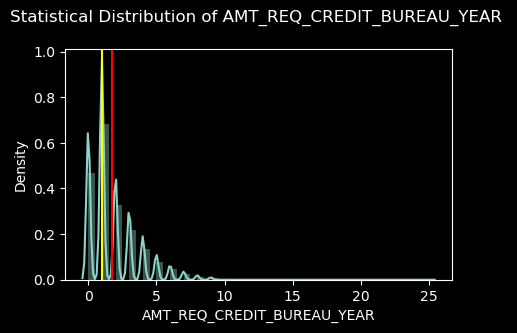

In [191]:
# We use a frequency distribution plot to understand the distribution of the data, it can be seen that the data is positively skewed.

plt.figure(figsize = [5,3])
plt.style.use("dark_background")
sns.distplot(application_data["AMT_REQ_CREDIT_BUREAU_YEAR"])
plt.title("Statistical Distribution of AMT_REQ_CREDIT_BUREAU_YEAR \n")
plt.axvline(application_data["AMT_REQ_CREDIT_BUREAU_YEAR"].mean(), color = "red")
plt.axvline(application_data["AMT_REQ_CREDIT_BUREAU_YEAR"].median(), color = "yellow")
plt.show()

In [28]:
application_data["AMT_REQ_CREDIT_BUREAU_YEAR"].skew()

1.243590004141659

In [29]:
# Since the data is positively skewed we fill the null values using "median" of the column.

application_data["AMT_REQ_CREDIT_BUREAU_YEAR"].fillna(application_data["AMT_REQ_CREDIT_BUREAU_YEAR"].median(), inplace = True)

In [30]:
# Lets check if anymore null values are present after using the previous code in the these columns. 

application_data["AMT_REQ_CREDIT_BUREAU_YEAR"].isnull().sum()

0

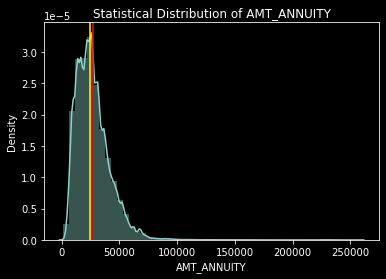

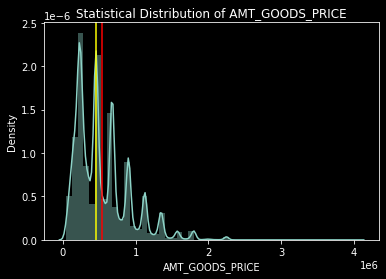

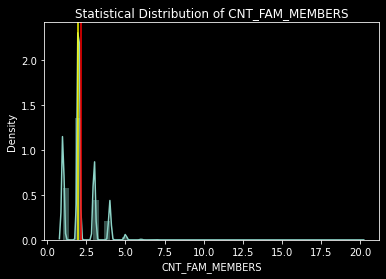

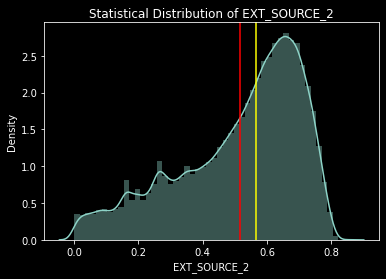

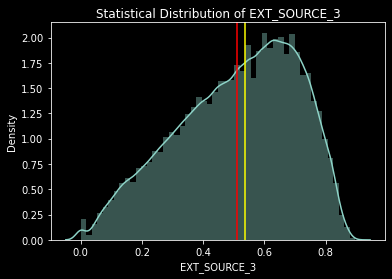

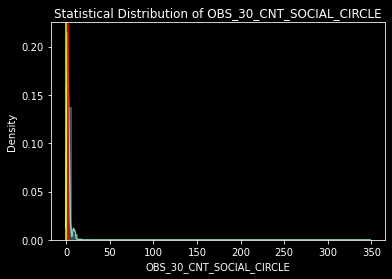

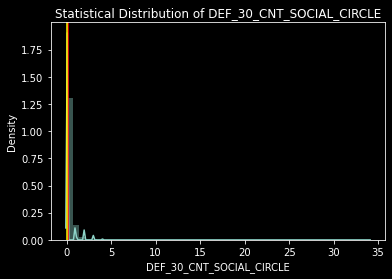

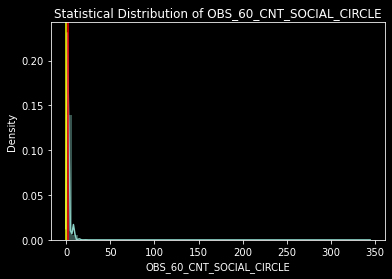

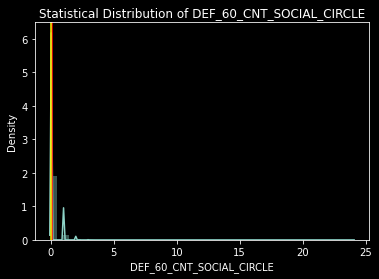

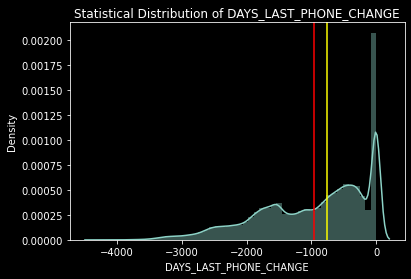

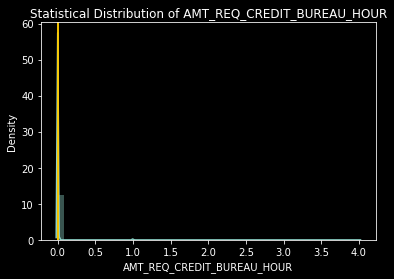

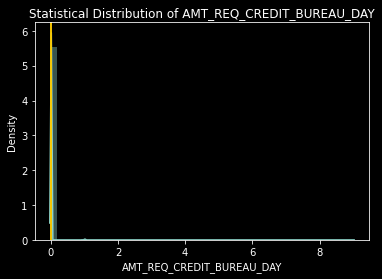

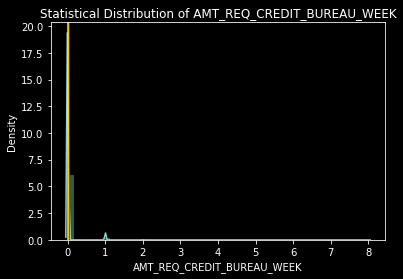

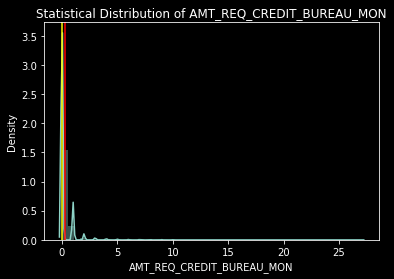

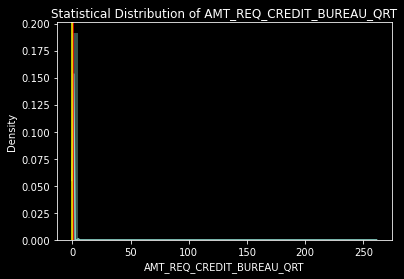

In [31]:
# Let us use a for loop to check the distplot of all the numerical columns that have null values present.

plt.style.use("dark_background")
for i in numerical_cols_1:
    a = application_data[i].isnull().sum()
    if a > 0:
        sns.distplot(application_data[i])
        plt.title("Statistical Distribution of " + i)
        plt.axvline(application_data[i].mean(), color = "red")
        plt.axvline(application_data[i].median(), color = "yellow")
        plt.show()

In [32]:
# Checking for skewness of the variables.

for i in numerical_cols_1:
    a = application_data[i].isnull().sum()
    if a > 0:
        print("Skewness of " + i + " is : ", application_data[i].skew())
    

Skewness of AMT_ANNUITY is :  1.5797773638612507
Skewness of AMT_GOODS_PRICE is :  1.3490003414747445
Skewness of CNT_FAM_MEMBERS is :  0.9875428137192184
Skewness of EXT_SOURCE_2 is :  -0.7935760449636996
Skewness of EXT_SOURCE_3 is :  -0.4093904596160267
Skewness of OBS_30_CNT_SOCIAL_CIRCLE is :  12.13959776486944
Skewness of DEF_30_CNT_SOCIAL_CIRCLE is :  5.183517952420263
Skewness of OBS_60_CNT_SOCIAL_CIRCLE is :  12.070828697697412
Skewness of DEF_60_CNT_SOCIAL_CIRCLE is :  5.27787829269804
Skewness of DAYS_LAST_PHONE_CHANGE is :  -0.7136056678591622
Skewness of AMT_REQ_CREDIT_BUREAU_HOUR is :  14.534062061826708
Skewness of AMT_REQ_CREDIT_BUREAU_DAY is :  27.043504708921265
Skewness of AMT_REQ_CREDIT_BUREAU_WEEK is :  9.293572551814966
Skewness of AMT_REQ_CREDIT_BUREAU_MON is :  7.804848087437468
Skewness of AMT_REQ_CREDIT_BUREAU_QRT is :  134.3657760491256


In [33]:
# Now let us fill the null values in each column using a for loop.

for i in numerical_cols_1:
    a = application_data[i].isnull().sum()
    b = application_data[i].skew()
    if a > 0:
        if -0.5 < b < 0.5:
            application_data[i].fillna(application_data[i].mean(), inplace= True)
        else:
            application_data[i].fillna(application_data[i].median(), inplace= True)            

In [34]:
# Lets check if anymore null values are present after using the previous code in the these columns.

for i in numerical_cols_1:
    a = application_data[i].isnull().sum()
    print(i + " : " , a)

CNT_CHILDREN :  0
AMT_INCOME_TOTAL :  0
AMT_CREDIT :  0
AMT_ANNUITY :  0
AMT_GOODS_PRICE :  0
REGION_POPULATION_RELATIVE :  0
DAYS_BIRTH :  0
DAYS_EMPLOYED :  0
DAYS_REGISTRATION :  0
DAYS_ID_PUBLISH :  0
CNT_FAM_MEMBERS :  0
EXT_SOURCE_2 :  0
EXT_SOURCE_3 :  0
OBS_30_CNT_SOCIAL_CIRCLE :  0
DEF_30_CNT_SOCIAL_CIRCLE :  0
OBS_60_CNT_SOCIAL_CIRCLE :  0
DEF_60_CNT_SOCIAL_CIRCLE :  0
DAYS_LAST_PHONE_CHANGE :  0
AMT_REQ_CREDIT_BUREAU_HOUR :  0
AMT_REQ_CREDIT_BUREAU_DAY :  0
AMT_REQ_CREDIT_BUREAU_WEEK :  0
AMT_REQ_CREDIT_BUREAU_MON :  0
AMT_REQ_CREDIT_BUREAU_QRT :  0
AMT_REQ_CREDIT_BUREAU_YEAR :  0


### HANDLING OUTLIERS

The common approaches that are used to treat outliers in a dataset are as follows:

- Imputation of values
- Deletion of the outliers
- Binning of values
- Capping the outliers

In this dataset, in order to identify if the dataset has outliers we will be using boxplots.

Let us check the following columns for outliers as they seem important from the point of view of the analysis:

- AMT_INCOME_TOTAL
- AMT_CREDIT
- AMT_ANNUITY
- AMT_GOODS_PRICE


Here, the following variables have been analysed using boxplots and subsequently, as it can be seen in the figures, there is pressence of outliers in all the four columns. Thus, the following approach has been adopted to treat the outliers:

- The 1st and 3rd Quartiles are calculated at 25% and 75% of the distribution respectively.
- Then, we calculate the Inter Quartile Range (IQR) by subtracting Q3 from Q1.
- Further, as we use the upper bound (Q3 + 1.5 * IQR) to remove the outliers from the dataset, since in all the columns upper bound outliers are detected.

In [35]:
cols_to_check = ["AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_ANNUITY", "AMT_GOODS_PRICE"]

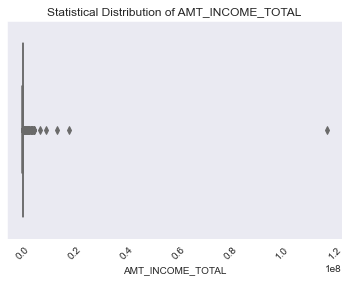

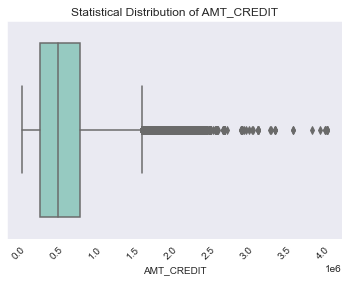

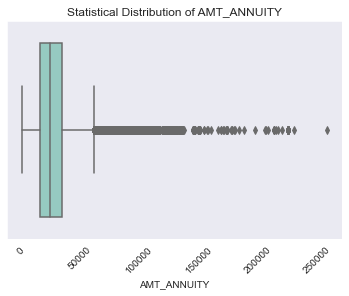

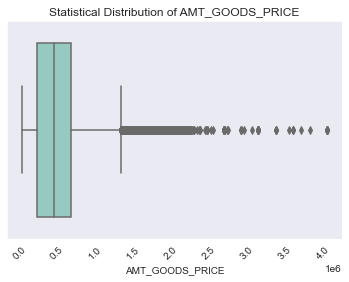

In [36]:
sns.set_style("dark")
for i in cols_to_check:
    sns.boxplot(application_data[i])
    plt.xlabel(i)
    plt.title("Statistical Distribution of "+i)
    plt.xticks(rotation=45)
    plt.show()

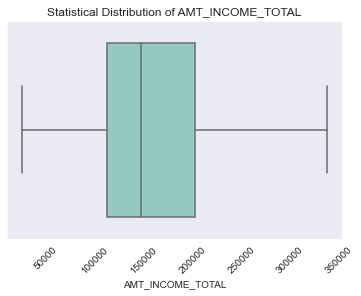

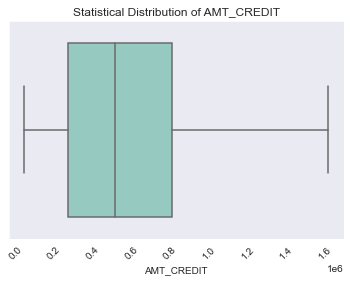

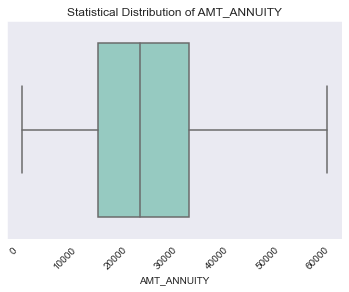

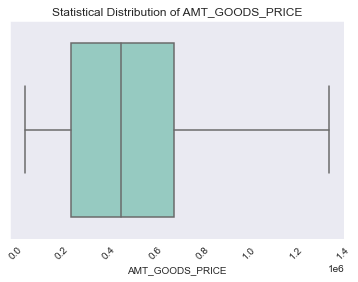

In [37]:
sns.set_style("dark")
for i in cols_to_check:
    Q1 = application_data[i].quantile(0.25)
    Q3 = application_data[i].quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5 * IQR
    application_data[i]=np.where(application_data[i]>upper_bound, upper_bound, application_data[i])
    sns.boxplot(application_data[i])
    plt.xlabel(i)
    plt.title("Statistical Distribution of "+i)
    plt.xticks(rotation=45)
    plt.show()

### DATA IMBALANCE : TARGET VARIABLE

We will be analysing the "Target" variable that gives information about the "clients with payment difficulties" i.e., defaulters and "all other cases" i.e., non-defaulters, for data imbalance.

From the data dictionary, we can infer that: 
- The value "1" means defaulter.
- The value "0" indicates non-defaulter.


In [38]:
application_data["TARGET"].value_counts(normalize= True)*100

0    91.927118
1     8.072882
Name: TARGET, dtype: float64

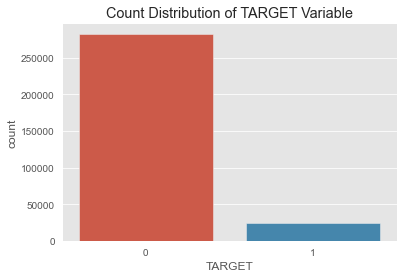

In [39]:
plt.style.use("ggplot")
sns.countplot(application_data["TARGET"])
plt.xlabel("TARGET")
plt.title("Count Distribution of TARGET Variable")
plt.show()

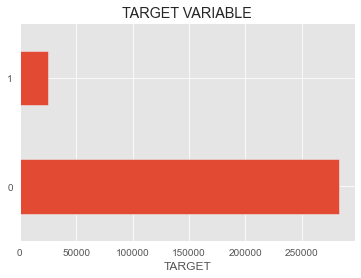

In [40]:
application_data["TARGET"].value_counts().plot.barh()
plt.title("TARGET VARIABLE")
plt.xlabel("TARGET")
plt.show()

In [41]:
print("Ratio of data imbalance : ", round(len(application_data[application_data.TARGET == 0])/len(application_data[application_data.TARGET == 1]), 2))

Ratio of data imbalance :  11.39


### OBSERVATION:

From the above analysis it can be observed that there exists data imbalance in the Target variable.

- Non-defaulters:   91.92%
- Defaulters:     8.07%
- Ratio of data imbalance is 11.39

Thus, even though there are some defaulters as per the data set the percentage of such defaulters is very less. This difference in the data is being termed as data imbalance.

### Converting flag columns to categorical data

In [42]:
flag_columns_1 = ["FLAG_MOBIL", "FLAG_EMP_PHONE", "FLAG_WORK_PHONE", "FLAG_CONT_MOBILE", "FLAG_PHONE", "FLAG_EMAIL", "FLAG_DOCUMENT_2","FLAG_DOCUMENT_3", "FLAG_DOCUMENT_4", "FLAG_DOCUMENT_5", "FLAG_DOCUMENT_6", "FLAG_DOCUMENT_7", "FLAG_DOCUMENT_8", "FLAG_DOCUMENT_9", "FLAG_DOCUMENT_10", "FLAG_DOCUMENT_11", "FLAG_DOCUMENT_12", "FLAG_DOCUMENT_13", "FLAG_DOCUMENT_14", "FLAG_DOCUMENT_15", "FLAG_DOCUMENT_16", "FLAG_DOCUMENT_17", "FLAG_DOCUMENT_18", "FLAG_DOCUMENT_19", "FLAG_DOCUMENT_20", "FLAG_DOCUMENT_21"]
flag_columns_2 = ["REG_REGION_NOT_LIVE_REGION", "REG_REGION_NOT_WORK_REGION", "LIVE_REGION_NOT_WORK_REGION", "REG_CITY_NOT_LIVE_CITY", "REG_CITY_NOT_WORK_CITY", "LIVE_CITY_NOT_WORK_CITY"]

In [43]:
for i in flag_columns_1:
    application_data[i].replace((0, 1), ('No', 'Yes') , inplace = True)

In [44]:
for i in flag_columns_2:
    application_data[i].replace((0, 1), ('Same', 'Different') , inplace = True)

### STANDARDISING THE COLUMNS

In [45]:
# As we can see the values in this columns are in negative. As Days cannot be negative we convert the values into absolute values.

application_data[["DAYS_BIRTH", "DAYS_EMPLOYED", "DAYS_ID_PUBLISH", "DAYS_REGISTRATION"]]

DAYS_BIRTH  DAYS_EMPLOYED  DAYS_ID_PUBLISH  DAYS_REGISTRATION
0            -9461           -637            -2120            -3648.0
1           -16765          -1188             -291            -1186.0
2           -19046           -225            -2531            -4260.0
3           -19005          -3039            -2437            -9833.0
4           -19932          -3038            -3458            -4311.0
...            ...            ...              ...                ...
307506       -9327           -236            -1982            -8456.0
307507      -20775         365243            -4090            -4388.0
307508      -14966          -7921            -5150            -6737.0
307509      -11961          -4786             -931            -2562.0
307510      -16856          -1262             -410            -5128.0

[307511 rows x 4 columns]

In [46]:
application_data["DAYS_BIRTH"] = application_data["DAYS_BIRTH"].abs()
application_data["DAYS_EMPLOYED"] = application_data["DAYS_EMPLOYED"].abs()
application_data["DAYS_ID_PUBLISH"] = application_data["DAYS_ID_PUBLISH"].abs()
application_data["DAYS_REGISTRATION"] = application_data["DAYS_REGISTRATION"].abs()

In [47]:
# Now as we can see the problem has been solved. 

application_data[["DAYS_BIRTH", "DAYS_EMPLOYED", "DAYS_ID_PUBLISH", "DAYS_REGISTRATION"]]

DAYS_BIRTH  DAYS_EMPLOYED  DAYS_ID_PUBLISH  DAYS_REGISTRATION
0             9461            637             2120             3648.0
1            16765           1188              291             1186.0
2            19046            225             2531             4260.0
3            19005           3039             2437             9833.0
4            19932           3038             3458             4311.0
...            ...            ...              ...                ...
307506        9327            236             1982             8456.0
307507       20775         365243             4090             4388.0
307508       14966           7921             5150             6737.0
307509       11961           4786              931             2562.0
307510       16856           1262              410             5128.0

[307511 rows x 4 columns]

In [48]:
# Now in order to make the "DAYS_BIRTH" column more readable, let us convert the age of the people from days to years.

application_data["AGE_IN_YEARS"] = round(application_data["DAYS_BIRTH"]/365).astype("int")

In [49]:
application_data["AGE_IN_YEARS"]

0         26
1         46
2         52
3         52
4         55
          ..
307506    26
307507    57
307508    41
307509    33
307510    46
Name: AGE_IN_YEARS, Length: 307511, dtype: int64

In [50]:
# Now let us drop the DAYS_BIRTH column.

application_data.drop(["DAYS_BIRTH"], inplace = True, axis = 1)

In [51]:
application_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                No               No               No   
1  ...                No               No               No   
2  ...                No               No               No   
3  ...                No               No               No   
4  ...                No               No               No   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        0.0                       0.0   
4                        0.0                       0.0   

  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        0.0                        0.0   
4                        0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  AGE_IN_YEARS  
0                        0.0                         1.0            26  
1                        0.0                         0.0            46  
2                        0.0                         0.0            52  
3                        0.0                         1.0            52  
4                        0.0                         0.0            55  

[5 rows x 73 columns]

In [52]:
# Now we can edit the numerical columns list as follows:

numerical_cols_1 = ["CNT_CHILDREN", "AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_ANNUITY", "AMT_GOODS_PRICE", "REGION_POPULATION_RELATIVE", "AGE_IN_YEARS", "DAYS_EMPLOYED", 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH','CNT_FAM_MEMBERS', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE','DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']

## UNIVARIATE ANALYSIS 

### UNIVARIATE ANALYSIS : CATEGORICAL UNORDERED VARIABLES

Unordered variables are those which do not have any measurable terms. For eg., some unordered variables in this dataset are as follow:

- NAME_FAMILY_STATUS : Family status of the client (Marital Status).
- NAME_CONTRACT_TYPE : Identification if loan is cash or revolving.
- ORGANIZATION_TYPE : Type of organization where client works.
- CODE_GENDER : Gender of the client. etc.

In [53]:
cat_cols_unordered = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', "ORGANIZATION_TYPE", "OCCUPATION_TYPE", "FLAG_MOBIL", "FLAG_EMP_PHONE", "FLAG_WORK_PHONE", "FLAG_CONT_MOBILE", "FLAG_PHONE", "FLAG_EMAIL", "REG_REGION_NOT_LIVE_REGION", "REG_REGION_NOT_WORK_REGION", "LIVE_REGION_NOT_WORK_REGION", "REG_CITY_NOT_LIVE_CITY", "REG_CITY_NOT_WORK_CITY", "LIVE_CITY_NOT_WORK_CITY", 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE']
cat_cols_ordered = ['REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'NAME_EDUCATION_TYPE', 'WEEKDAY_APPR_PROCESS_START']

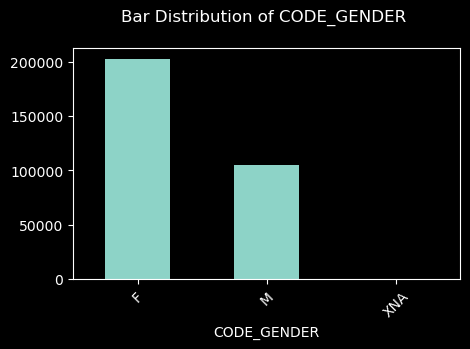

In [194]:
plt.style.use("dark_background")

# The following creates a bar diagram for the CODE_GENDER column.

plt.figure(figsize = [5,3])
application_data['CODE_GENDER'].value_counts().plot.bar()
plt.xlabel("CODE_GENDER")
plt.title("Bar Distribution of CODE_GENDER \n")
plt.xticks(rotation=45)
plt.show()


#### OBSERVATION

- It can be observed from the above diagram that the number of males is more compared to females in the dataset provided.

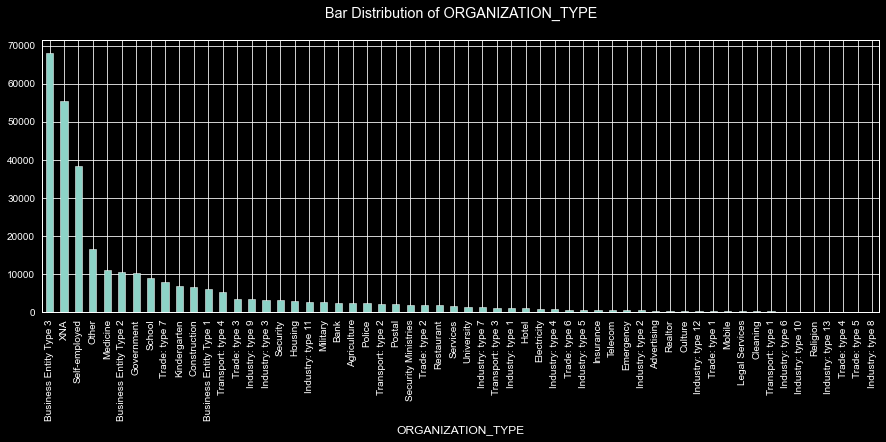

In [55]:
# The following creates a bar diagram for the ORGANIZATION_TYPE column.

plt.figure(figsize = [15,5])
application_data['ORGANIZATION_TYPE'].value_counts().plot.bar()
plt.xlabel("ORGANIZATION_TYPE")
plt.title("Bar Distribution of ORGANIZATION_TYPE\n")
plt.xticks(rotation=90)
plt.show()

#### OBSERVATION

- It can be observed from the above diagram that the number of people engaged in Business Entry Type 3 Category of organization type are the highest.
- This category is followed by Self Employed people, Other, Medicine and so on.

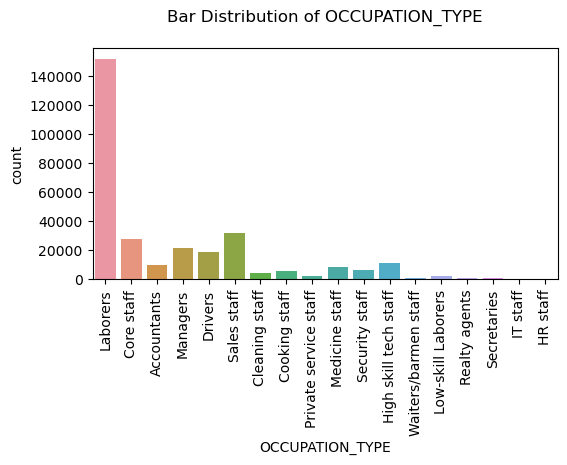

In [215]:
# The following creates a bar diagram for the 'OCCUPATION_TYPE' column.

plt.style.use("default")
plt.figure(figsize = [6,3])
sns.countplot(x = application_data['OCCUPATION_TYPE'], data = application_data)
plt.xlabel('OCCUPATION_TYPE')
plt.title("Bar Distribution of OCCUPATION_TYPE\n")
plt.xticks(rotation=90)
plt.show()

#### OBSERVATION

- It can be observed from the above diagram that the number of people engaged in Labourers Category of occupation type are the highest.
- This category is followed by Sales Staff, Core staff, Managers and so on.

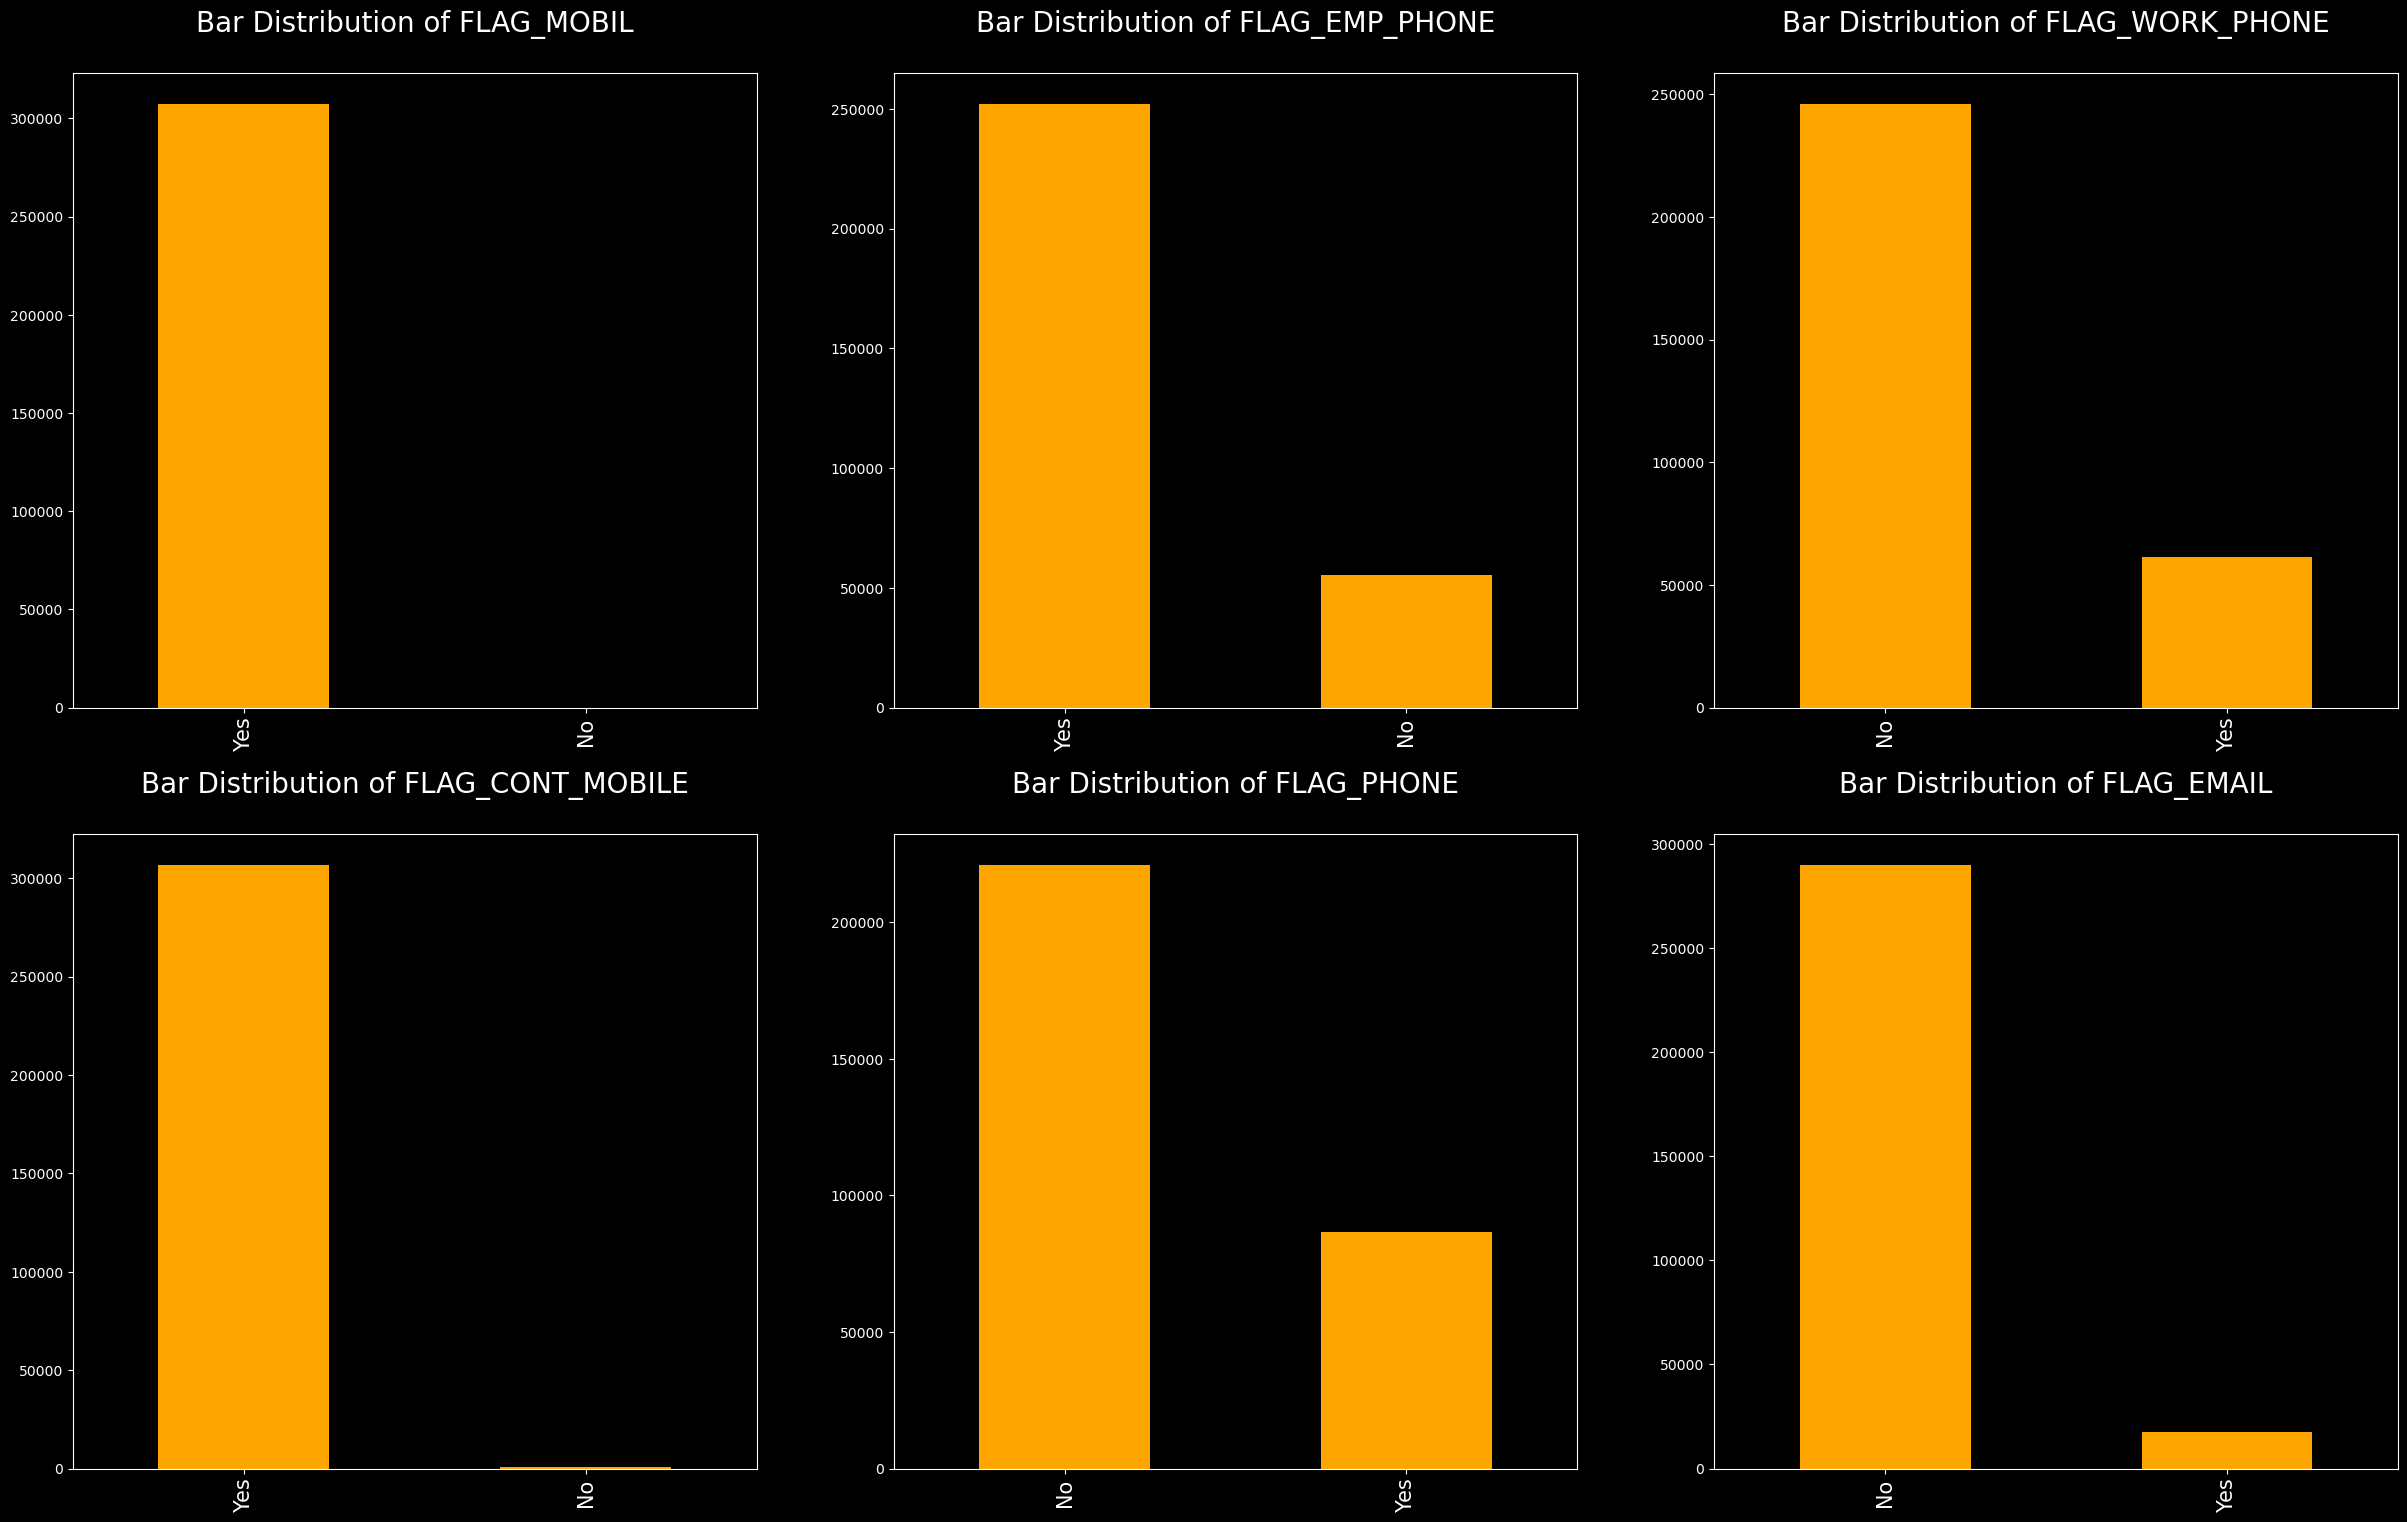

In [200]:
# Using for loop to visualise some of the columns.

plt.style.use("dark_background")
var_list_1 = ["FLAG_MOBIL", "FLAG_EMP_PHONE", "FLAG_WORK_PHONE", "FLAG_CONT_MOBILE", "FLAG_PHONE", "FLAG_EMAIL"]

x = 0
plt.figure(figsize= [30,28])
for i in var_list_1:
    x += 1
    plt.subplot(3,3,x)
    plt.title("Bar Distribution of "+i + "\n", fontsize = 20)
    application_data[i].value_counts().plot(kind = 'bar', color = 'orange')
    plt.xticks(rotation=90, fontsize = 15)
    plt.savefig("FIRST.jpg")

#### OBSERVATION

- The first bar diagram of FLAG_MOBIL category shows that almost all (more than 300000) the people provided their mobile numbers while registering.
- The second bar diagram of FLAG_EMP_PHONE category shows that most (more than 250000) of the people provided their work phone numbers while registering.
- The third bar diagram of FLAG_WORK_PHONE category shows that most (more than 200000) of all the people did not provide their home numbers while registering.
- The fourth bar diagram of FLAG_CONT_MOBILE category shows that most (more than 300000) of the people could be contacted to the numbers they provided while registering.
- The fifth bar diagram of FLAG_PHONE category shows that maximum (more than 200000) people did not provide their phone numbers while registering.
- The sixth bar diagram of FLAG_EMAIL category shows that most of the people (more than 250000) did not provide their email ids while registering.

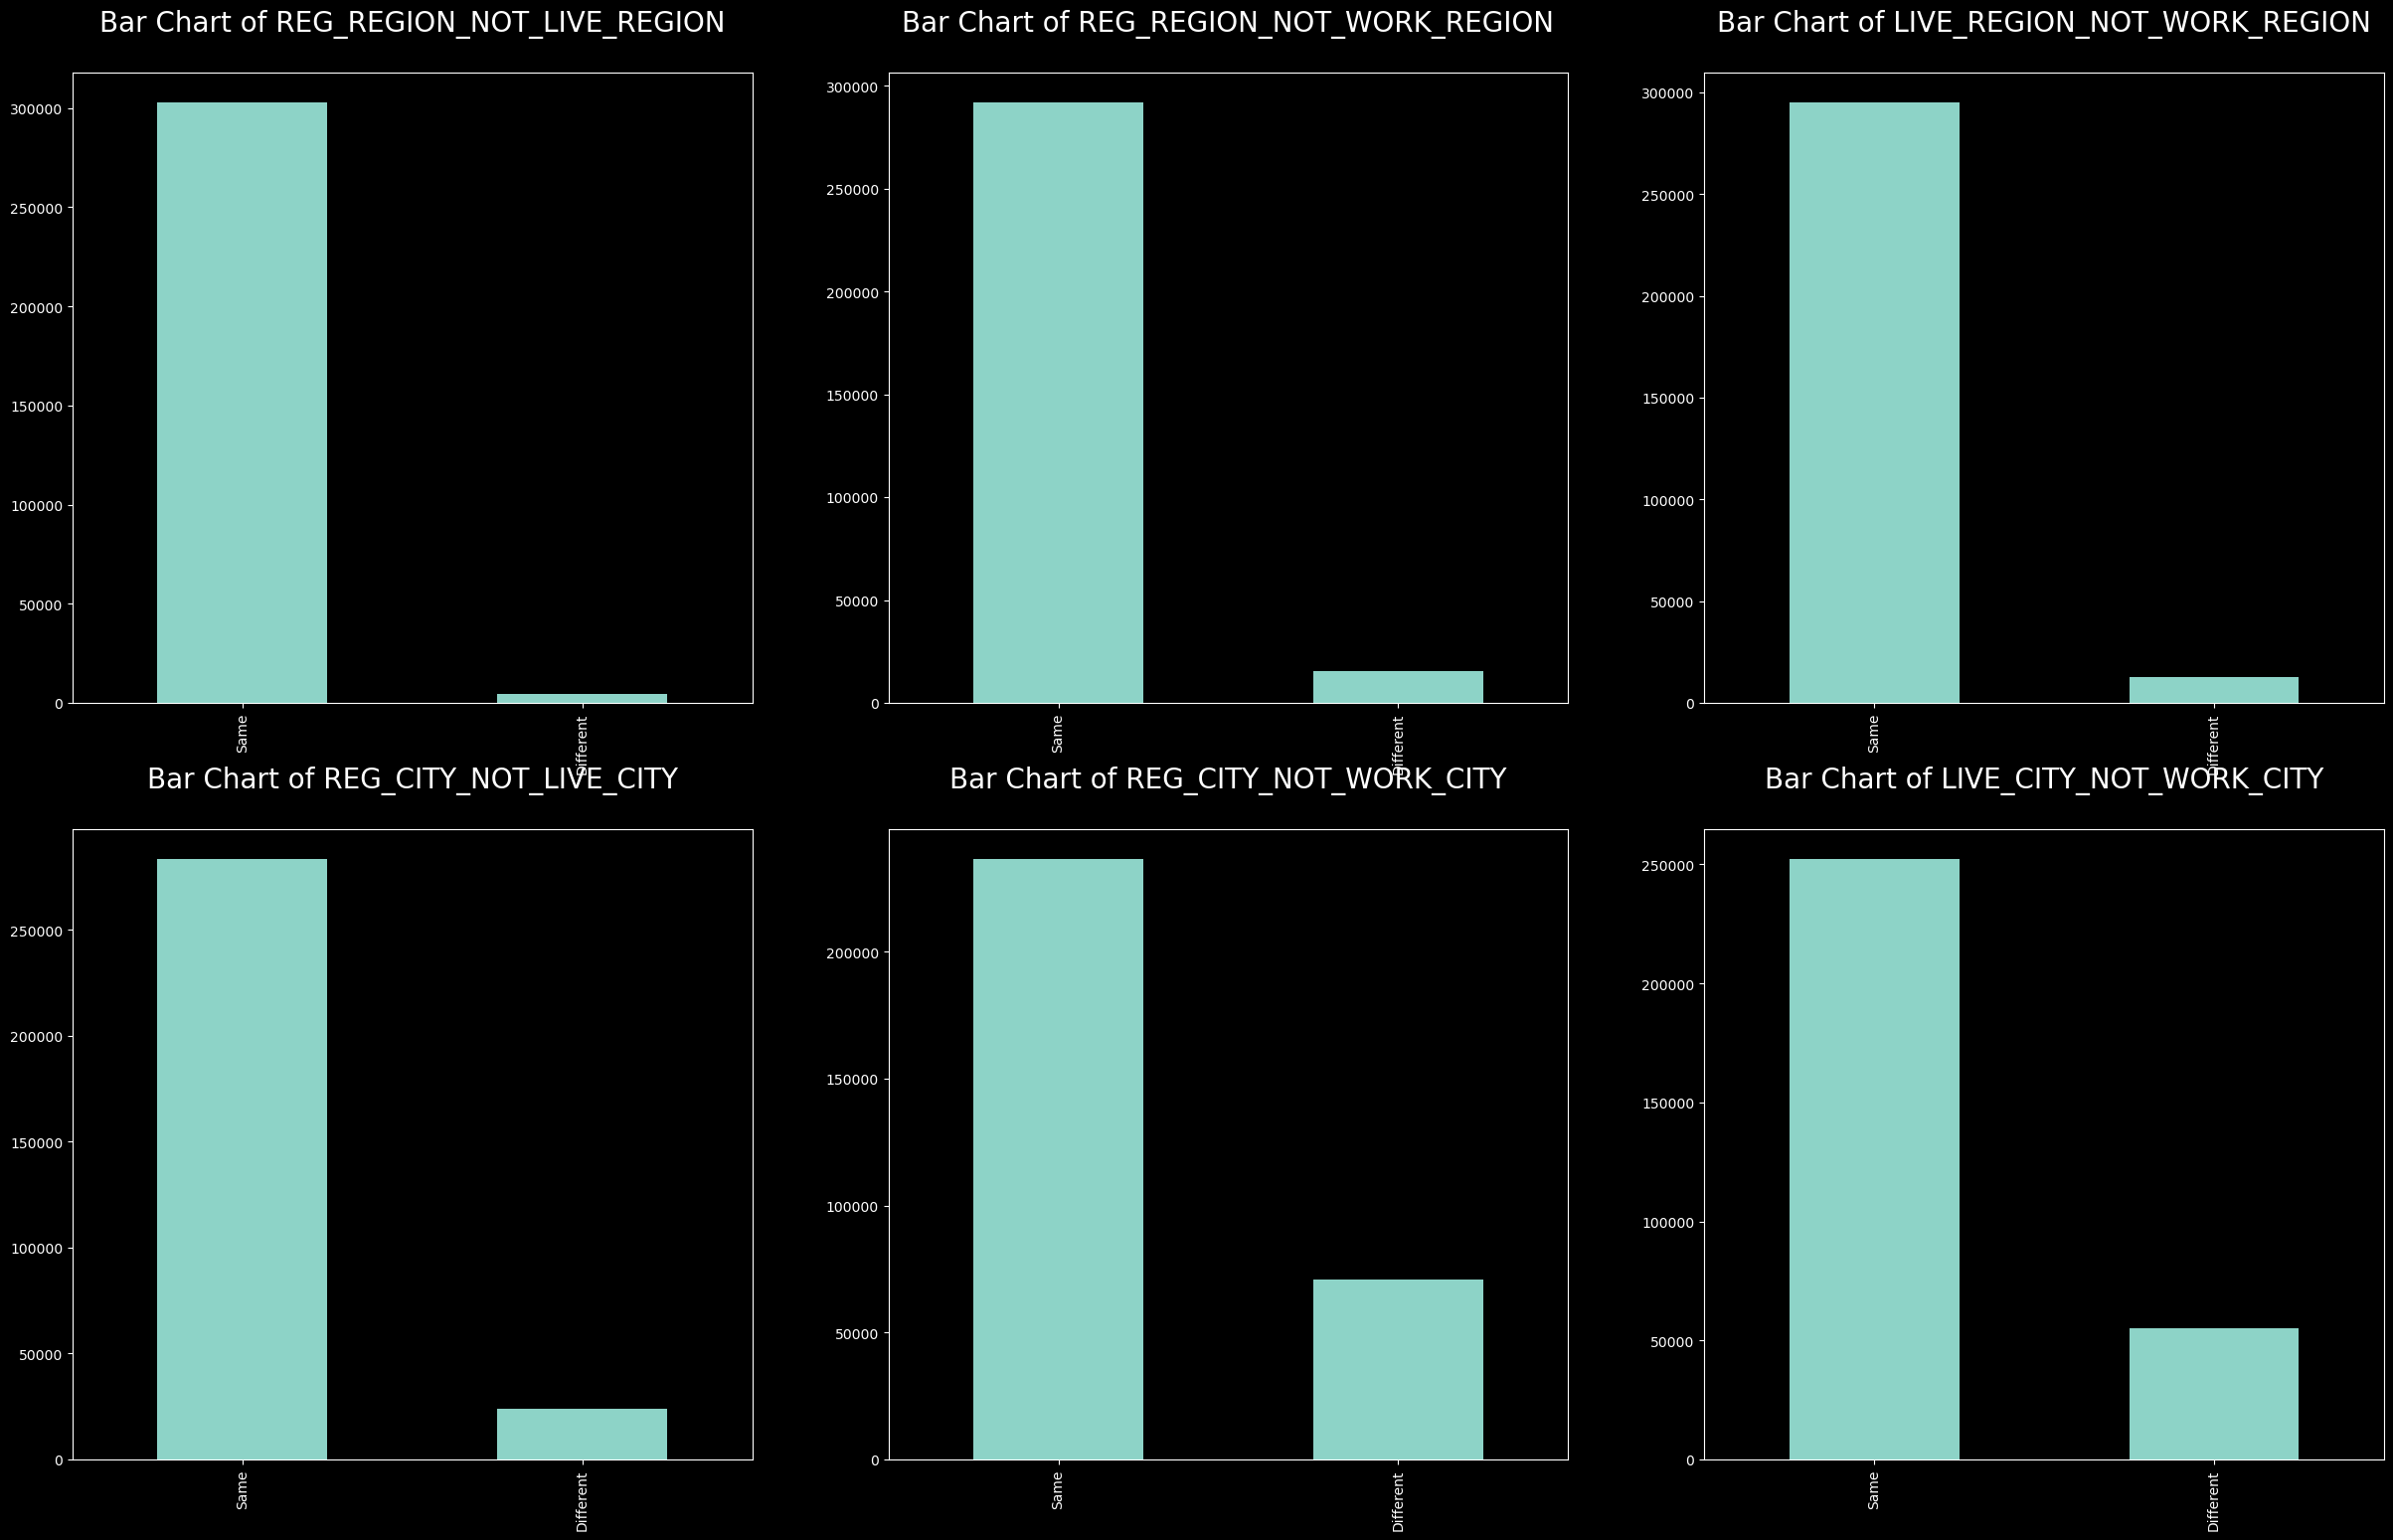

In [197]:
plt.style.use("dark_background")

var_list_2 = ["REG_REGION_NOT_LIVE_REGION", "REG_REGION_NOT_WORK_REGION", "LIVE_REGION_NOT_WORK_REGION", "REG_CITY_NOT_LIVE_CITY", "REG_CITY_NOT_WORK_CITY", "LIVE_CITY_NOT_WORK_CITY"]

x = 0
plt.figure(figsize= [30,28])
for i in var_list_2:
    x += 1
    plt.subplot(3,3,x)
    plt.title("Bar Chart of "+i + "\n", fontsize = 20)
    application_data[i].value_counts().plot(kind = 'bar')

#### OBSERVATION

- The first bar diagram of REG_REGION_NOT_LIVE_REGION category shows that almost all (more than 250000) the client's permanent address is the same as the contact address while registering.
- The second bar diagram of REG_REGION_NOT_WORK_REGION category shows that most (more than 250000) of the client's permanent address is the same as the work address while registering.
- The third bar diagram of LIVE_REGION_NOT_WORK_REGION category shows that most (more than 250000) of all the client's contact address is the same as the work address while registering.
- The fourth bar diagram of REG_CITY_NOT_LIVE_CITY category shows that most (more than 250000) of client's permanent address is the same as the contact address while registering.
- The fifth bar diagram of REG_CITY_NOT_WORK_CITY category shows that maximum (more than 200000) the client's permanent address is the same as the work address while registering.
- The sixth bar diagram of LIVE_CITY_NOT_WORK_CITY category shows that most of the people (more than 250000) the client's contact address is the same as the work address while registering.

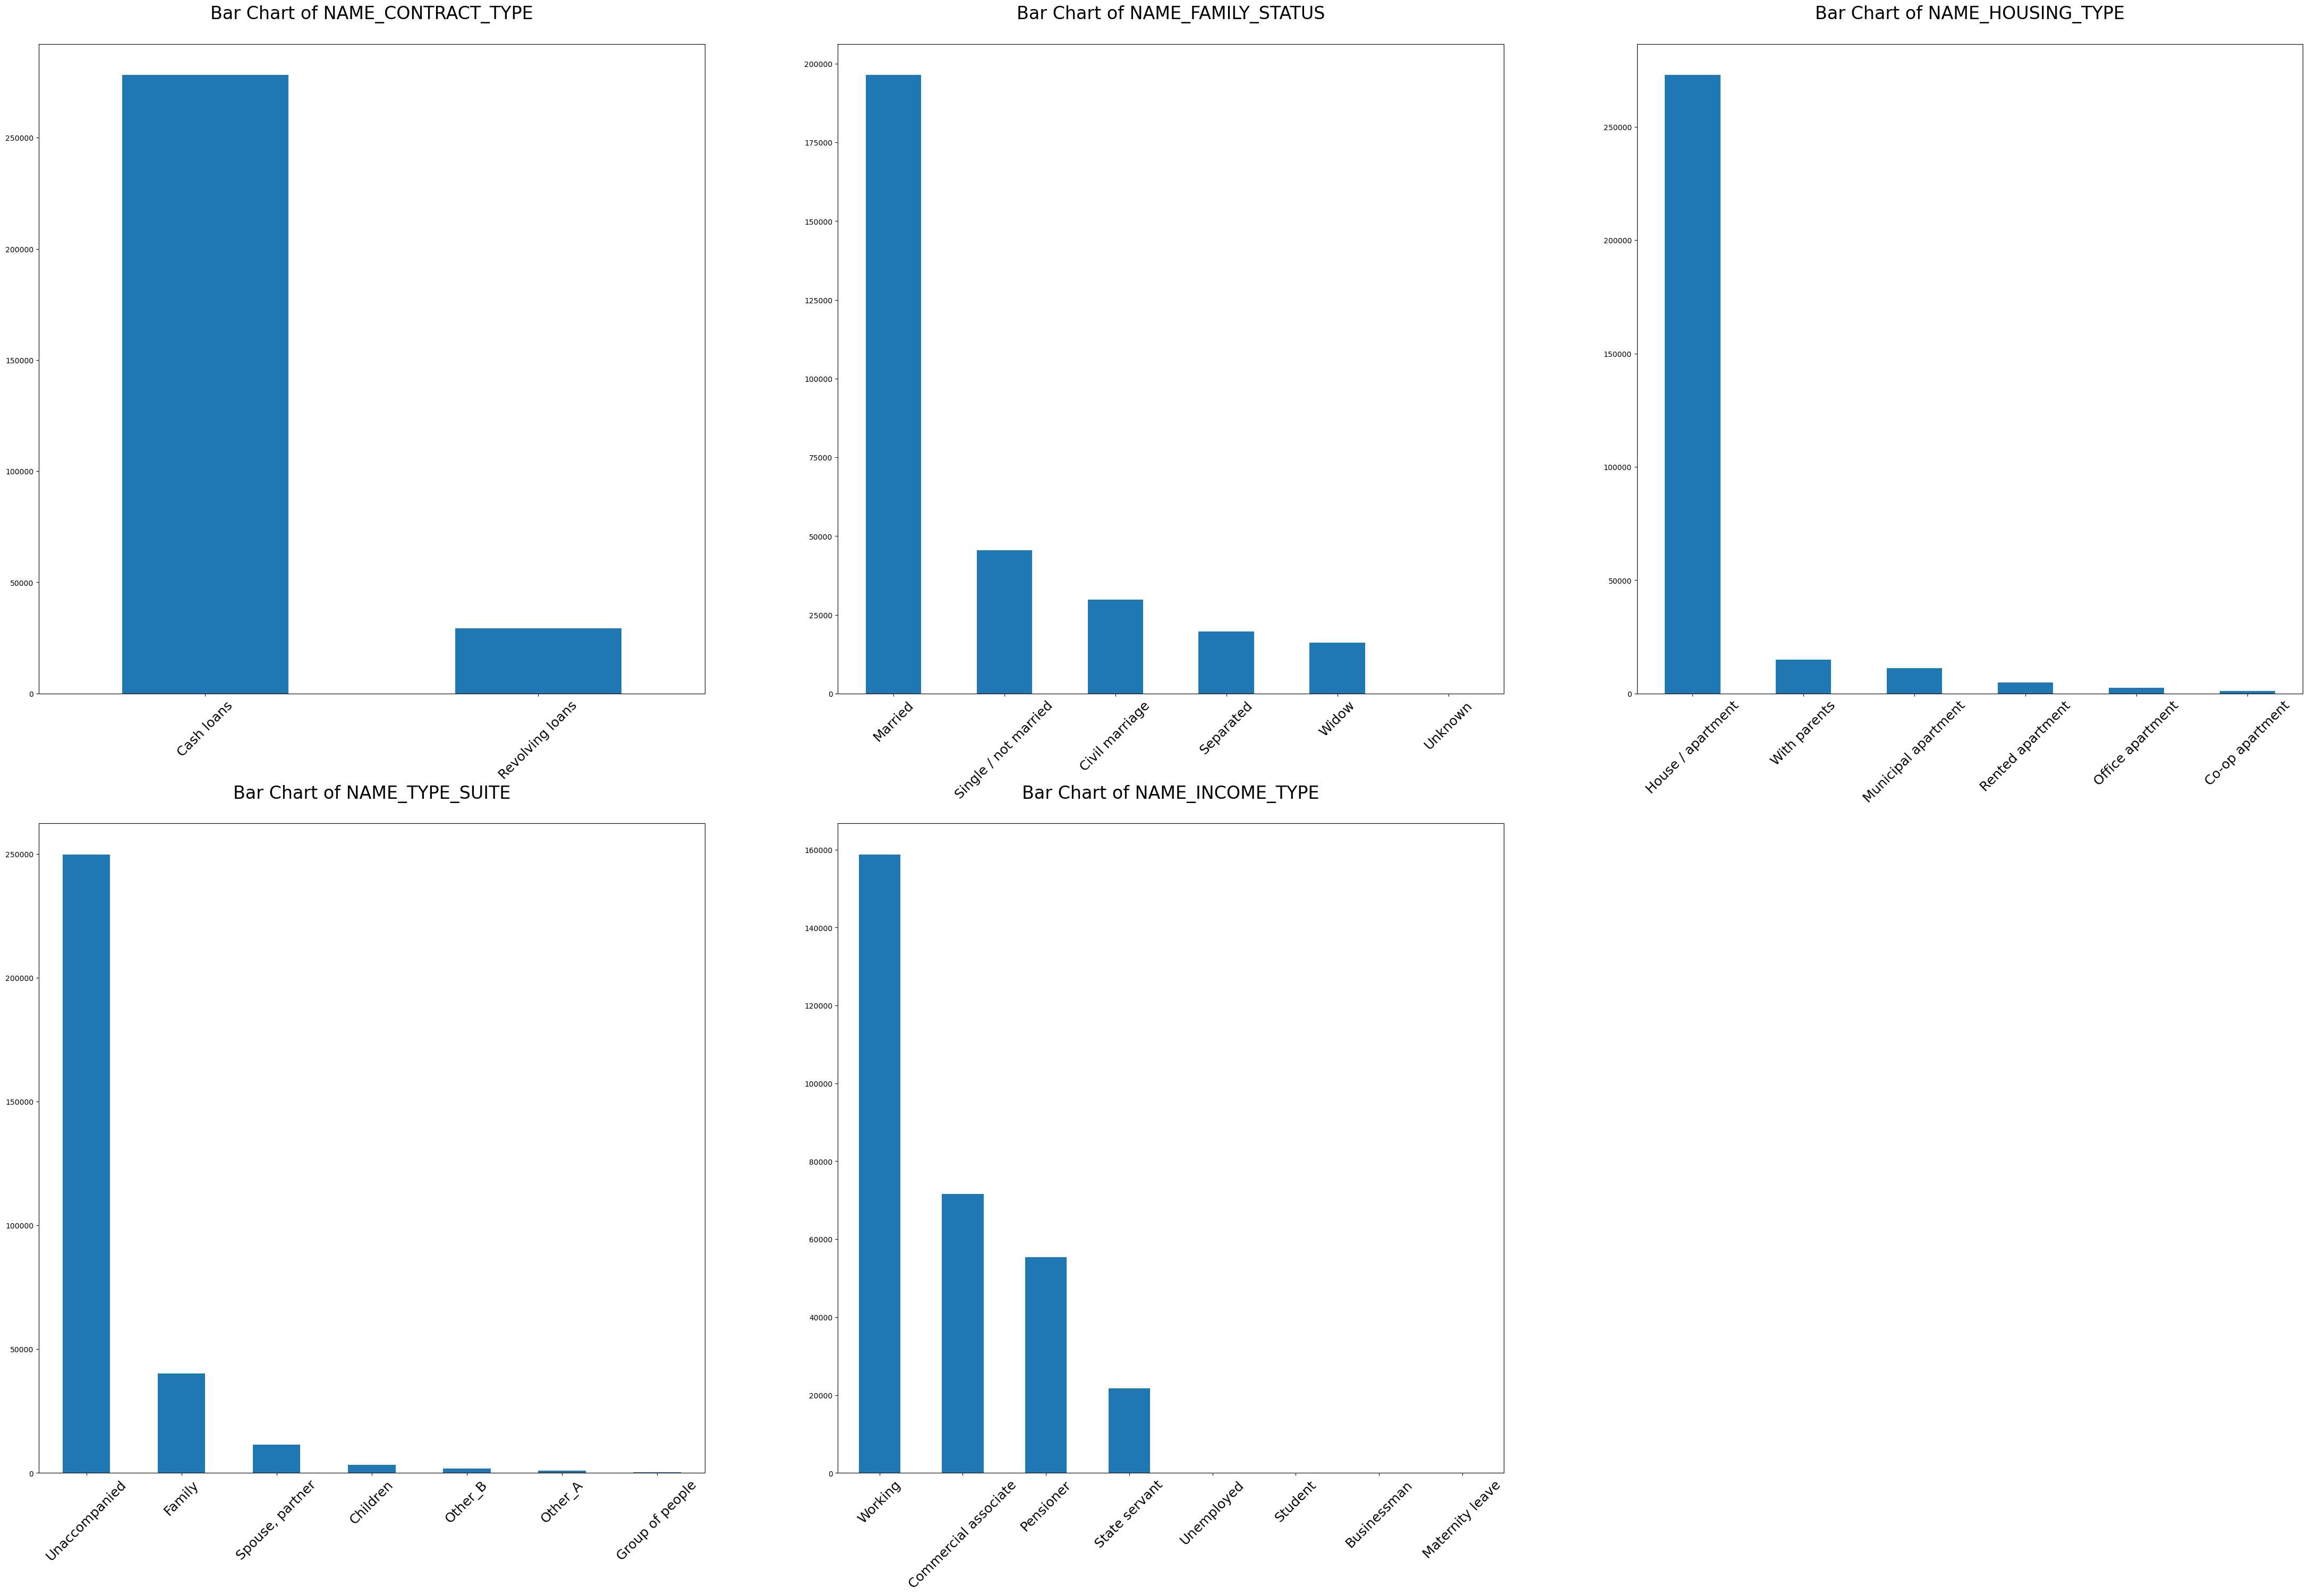

In [59]:
plt.style.use("default")
var_list_3 = ['NAME_CONTRACT_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE']

x = 0
plt.figure(figsize= [55,54])
for i in var_list_3:
    x += 1
    plt.subplot(3,3,x)
    plt.title("Bar Chart of "+i + "\n", fontsize = 24)
    application_data[i].value_counts().plot(kind = 'bar')
    plt.xticks(rotation=45, fontsize = 18)

#### OBSERVATION

- The first bar diagram of NAME_CONTRACT_TYPE category shows that majority of the loans belong to the cash loans category which is about more than 250000 while less that 50000 loans belong to the revolving loans category.
- The second bar diagram of NAME_FAMILY_STATUS shows that more than 175000 people are married, less than 50000 people are single which is the second largest category, these are then followed by categories like civil marriage, separated and widow.
- The third bar diagram of NAME_HOUSING_TYPE category shows that more than 250000 people live in house/apartment making it the largest category, followed by with parents, minucipal apartment, rented apartment etc., categories.
- The fourth bar diagram of NAME_TYPE_SUITE category shows that almost 250000 people came unaccompanied at the time of loan issue, around 40000 people came with their families and these categories are followed by spouse/partner, children etc., categories.
- The fifth bar diagram of NAME_INCOME_TYPE category shows that maximum clients are working which is about 30000, which is followed by the second largest category commercial associate and so on.


### UNIVARIATE ANALYSIS : CATEGORICAL ORDERED VARIABLES

Unordered variables are those which are ordered in some form and have measurable terms. For eg., some ordered variables in this dataset are as follow:

- REGION_RATING_CLIENT : Rating of the region where client lives (1,2,3).
- REGION_RATING_CLIENT_W_CITY : Rating of the region where client lives with taking city into account (1,2,3).
- NAME_EDUCATION_TYPE : Level of highest education the client achieved.
- WEEKDAY_APPR_PROCESS_START : On which day of the week did the client apply for the loan.

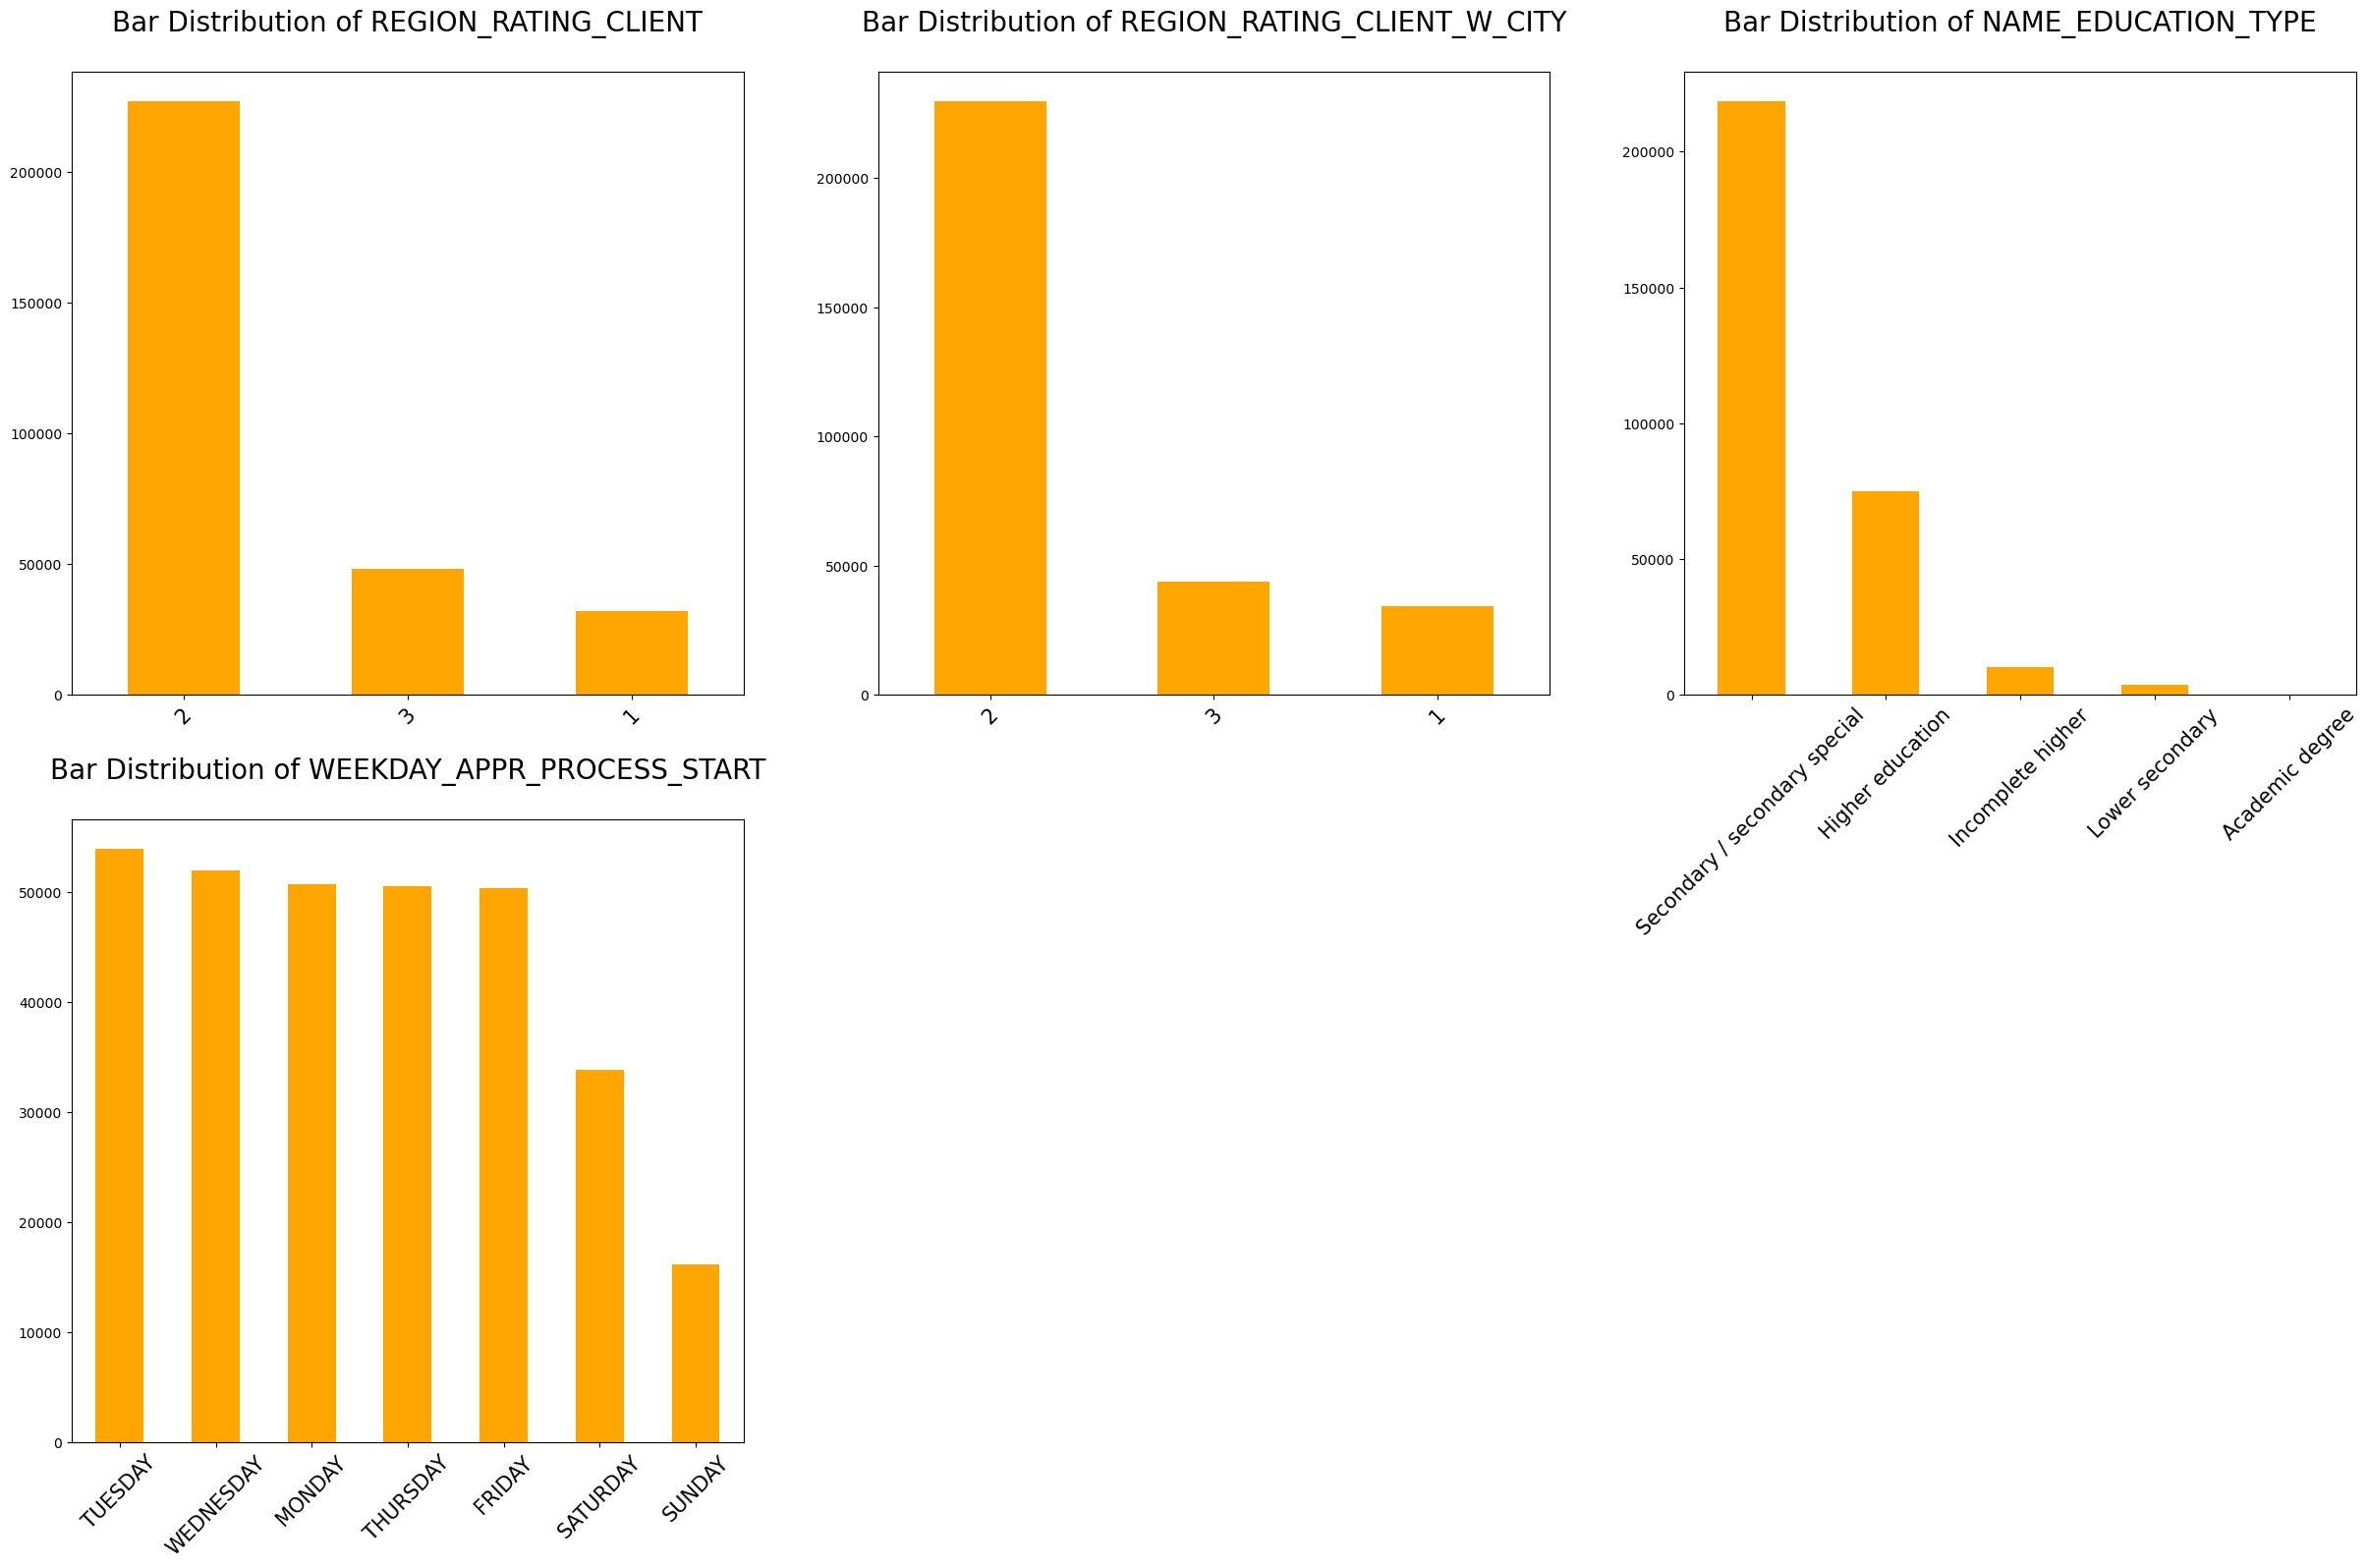

In [60]:
cat_cols_ordered = ['REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'NAME_EDUCATION_TYPE', 'WEEKDAY_APPR_PROCESS_START']

x = 0
plt.figure(figsize= [30,28])
for i in cat_cols_ordered:
    x += 1
    plt.subplot(3,3,x)
    plt.title("Bar Distribution of "+i + "\n", fontsize = 20)
    application_data[i].value_counts().plot(kind = 'bar', color = 'orange')
    plt.xticks(rotation=45, fontsize = 15)

#### OBSERVATION

- The first bar diagram of REGION_RATING_CLIENT category shows that maximum clients live in regions rated 2 and then in 3 and lastly in regions rated as 1.
- The second bar diagram of REGION_RATING_CLIENT_W_CITY category shows that maximum clients live in regions rated 2 and then in 3 and lastly in regions rated as 1.
- The third bar diagram of NAME_EDUCATION_TYPE category shows that majority of people belong to Secondary special, then Higher education, then Incomplete higher and so on.
- The fourth bar diagram of WEEKDAY_APPR_PROCESS_START category shows that most most of the loan application processes started on tuesday, follewed by wednesday, then monday and so on.

### UNIVARIATE ANALYSIS OF NUMERICAL VARIABLES

In [61]:
numerical_cols_1 = ["CNT_CHILDREN", "AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_ANNUITY", "AMT_GOODS_PRICE", "REGION_POPULATION_RELATIVE", "AGE_IN_YEARS", "DAYS_EMPLOYED", 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH','CNT_FAM_MEMBERS', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE','DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']

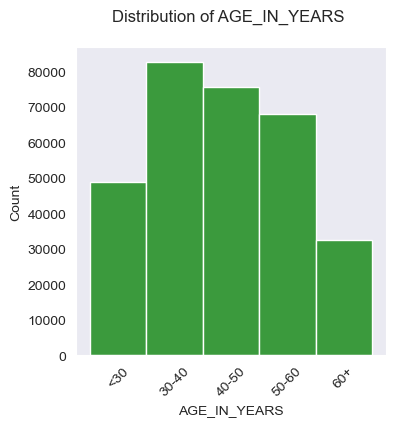

<Figure size 640x480 with 0 Axes>

In [216]:
# Analysis of the AGE_IN_YEARS column using HISTOGRAM.

sns.set_style("dark")
plt.figure(figsize= [4,4])
sns.histplot(application_data["AGE_IN_YEARS"],bins=[0,20,30,40,50,60,70,80], color='g')
plt.xlabel("AGE_IN_YEARS")
plt.title("Distribution of AGE_IN_YEARS \n")
plt.xticks(rotation=45)
plt.show()

#### OBSERVATION :

- The above histogram shows that majority of the people belong to the age group of 40-60.

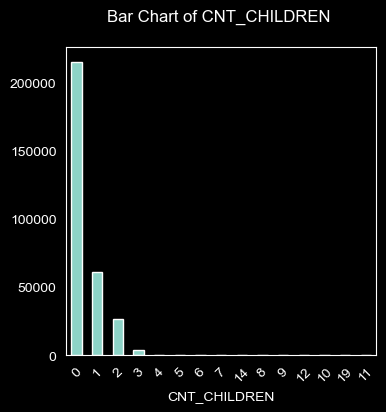

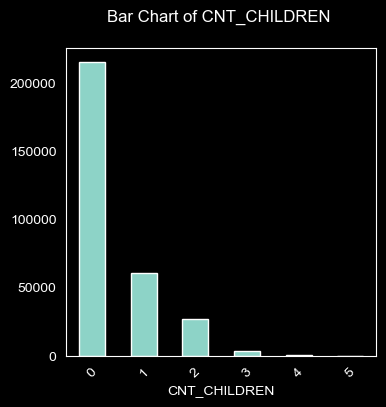

In [63]:
# Analysis of the "CNT_CHILDREN" column using BAR DIAGRAM.

plt.style.use("dark_background")
plt.figure(figsize= [4,4])
application_data["CNT_CHILDREN"].value_counts().plot.bar()
plt.xlabel("CNT_CHILDREN")
plt.title("Bar Chart of CNT_CHILDREN \n")
plt.xticks(rotation=45)
plt.show()

# Since it can be seen in the first diagram that the number of children above 5 is very less, we plot the following diagram to get a better view.

plt.figure(figsize= [4,4])
application_data[-(application_data["CNT_CHILDREN"] > 5 )].CNT_CHILDREN.value_counts().plot.bar()
plt.xlabel("CNT_CHILDREN")
plt.title("Bar Chart of CNT_CHILDREN \n")
plt.xticks(rotation=45)
plt.show()

#### OBSERVATION :

- The above diagram shows that majority of the people have no (0) children among the clients.

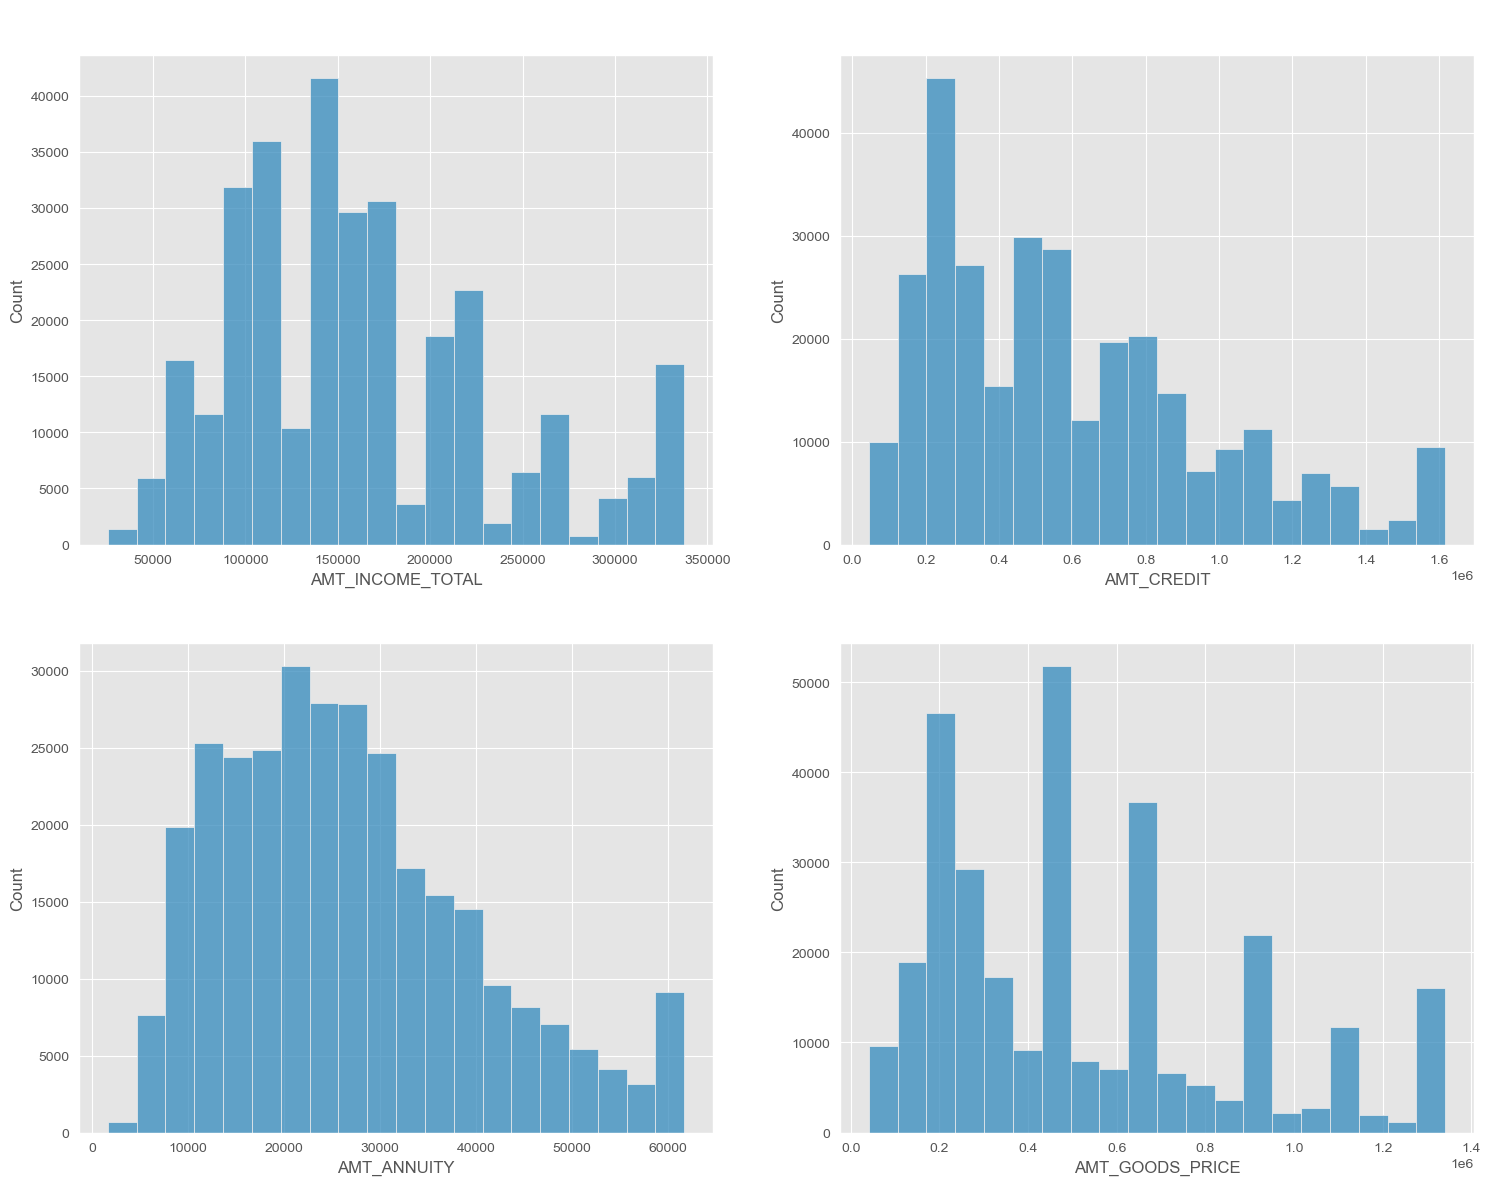

In [64]:
#Analysis of the "AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_ANNUITY", "AMT_GOODS_PRICE" column using HISTOGRAM.

plt.style.use("ggplot")

fig, axes = plt.subplots(2,2, figsize = (18,14))
axes[0,0].set_title("Distribution of AMT_INCOME_TOTAL \n")
axes[0,1].set_title("Distribution of AMT_CREDIT \n")
axes[1,0].set_title("Distribution of AMT_ANNUITY \n")
axes[1,1].set_title("Distribution of AMT_GOODS_PRICE \n")
sns.histplot(ax= axes[0,0], data= application_data["AMT_INCOME_TOTAL"], bins= 20)
sns.histplot(ax= axes[0,1], data= application_data["AMT_CREDIT"], bins= 20)
sns.histplot(ax= axes[1,0], data= application_data["AMT_ANNUITY"], bins= 20)
sns.histplot(ax= axes[1,1], data= application_data["AMT_GOODS_PRICE"], bins= 20)
plt.show()



#### OBSERVATION:

- The first histogram shows that the amount of income can be seen to be the highest in the bracket of 75,000 to 1,70,000.
- The second histogram shows that the amount of credit can be seen to be the highest in the bracket of 20,000 to 40,000.
- The third histogram shows that the amount of income can be seen to be the highest in the bracket of 10,000 to 40,000.
- The fourth histogram shows that the amount of goods price can be seen to be the highest in the bracket of 20,000 to 80,000.

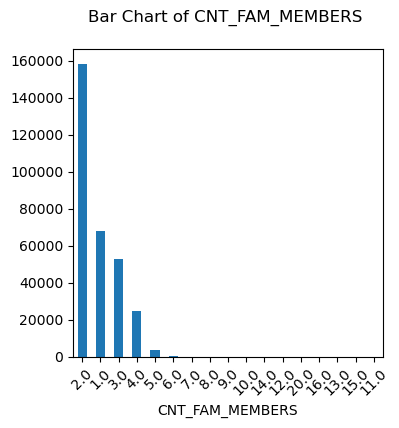

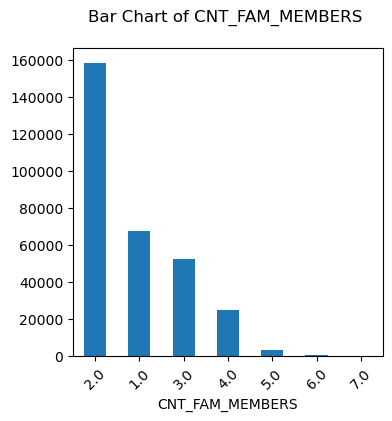

In [65]:
# Analysis of the "CNT_FAM_MEMBERS" column using BAR DIAGRAM.

plt.style.use("default")
plt.figure(figsize= [4,4])
application_data["CNT_FAM_MEMBERS"].value_counts().plot.bar()
plt.xlabel("CNT_FAM_MEMBERS")
plt.title("Bar Chart of CNT_FAM_MEMBERS \n")
plt.xticks(rotation=45)
plt.show()

# Since it can be seen in the first diagram that the number of family members above 7 is very less, we plot the following diagram to get a better view.

plt.figure(figsize= [4,4])
application_data[-(application_data["CNT_FAM_MEMBERS"] > 7 )].CNT_FAM_MEMBERS.value_counts().plot.bar()
plt.xlabel("CNT_FAM_MEMBERS")
plt.title("Bar Chart of CNT_FAM_MEMBERS \n")
plt.xticks(rotation=45)
plt.show()

#### OBSERVATION :

- The above diagram shows that majority of the people have 2 family members in their family among the clients.

### UNIVARIATE ANALYSIS FOR CATEGORICAL VARIABLES TAKING THE TARGET VARIABLE INTO ACCOUNT

In [66]:
cat_cols_unordered = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', "ORGANIZATION_TYPE", "OCCUPATION_TYPE", "FLAG_MOBIL", "FLAG_EMP_PHONE", "FLAG_WORK_PHONE", "FLAG_CONT_MOBILE", "FLAG_PHONE", "FLAG_EMAIL", "REG_REGION_NOT_LIVE_REGION", "REG_REGION_NOT_WORK_REGION", "LIVE_REGION_NOT_WORK_REGION", "REG_CITY_NOT_LIVE_CITY", "REG_CITY_NOT_WORK_CITY", "LIVE_CITY_NOT_WORK_CITY", 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE']
TARGET_DEFAULTER = application_data[application_data.TARGET == 1]
TARGET_NON_DEFAULTER = application_data[application_data.TARGET == 0]
def cat_cols(i):
    plt.figure(figsize = [20,10])
    plt.subplot(1,2,1)
    sns.countplot(TARGET_DEFAULTER[i], order=TARGET_DEFAULTER[i].value_counts(normalize=True).index)
    plt.title("Defaulters' case of "+ i +"\n",color ='black', fontsize = 15)
    plt.xlabel(i)
    plt.xticks(rotation=90)
    plt.subplot(1,2,2)
    sns.countplot(TARGET_NON_DEFAULTER[i], order=TARGET_NON_DEFAULTER[i].value_counts(normalize=True).index)
    plt.title("Non-Defaulters' case of "+ i +"\n",color ='black', fontsize = 15)
    plt.xlabel(i)
    plt.xticks(rotation=90)
    plt.show()

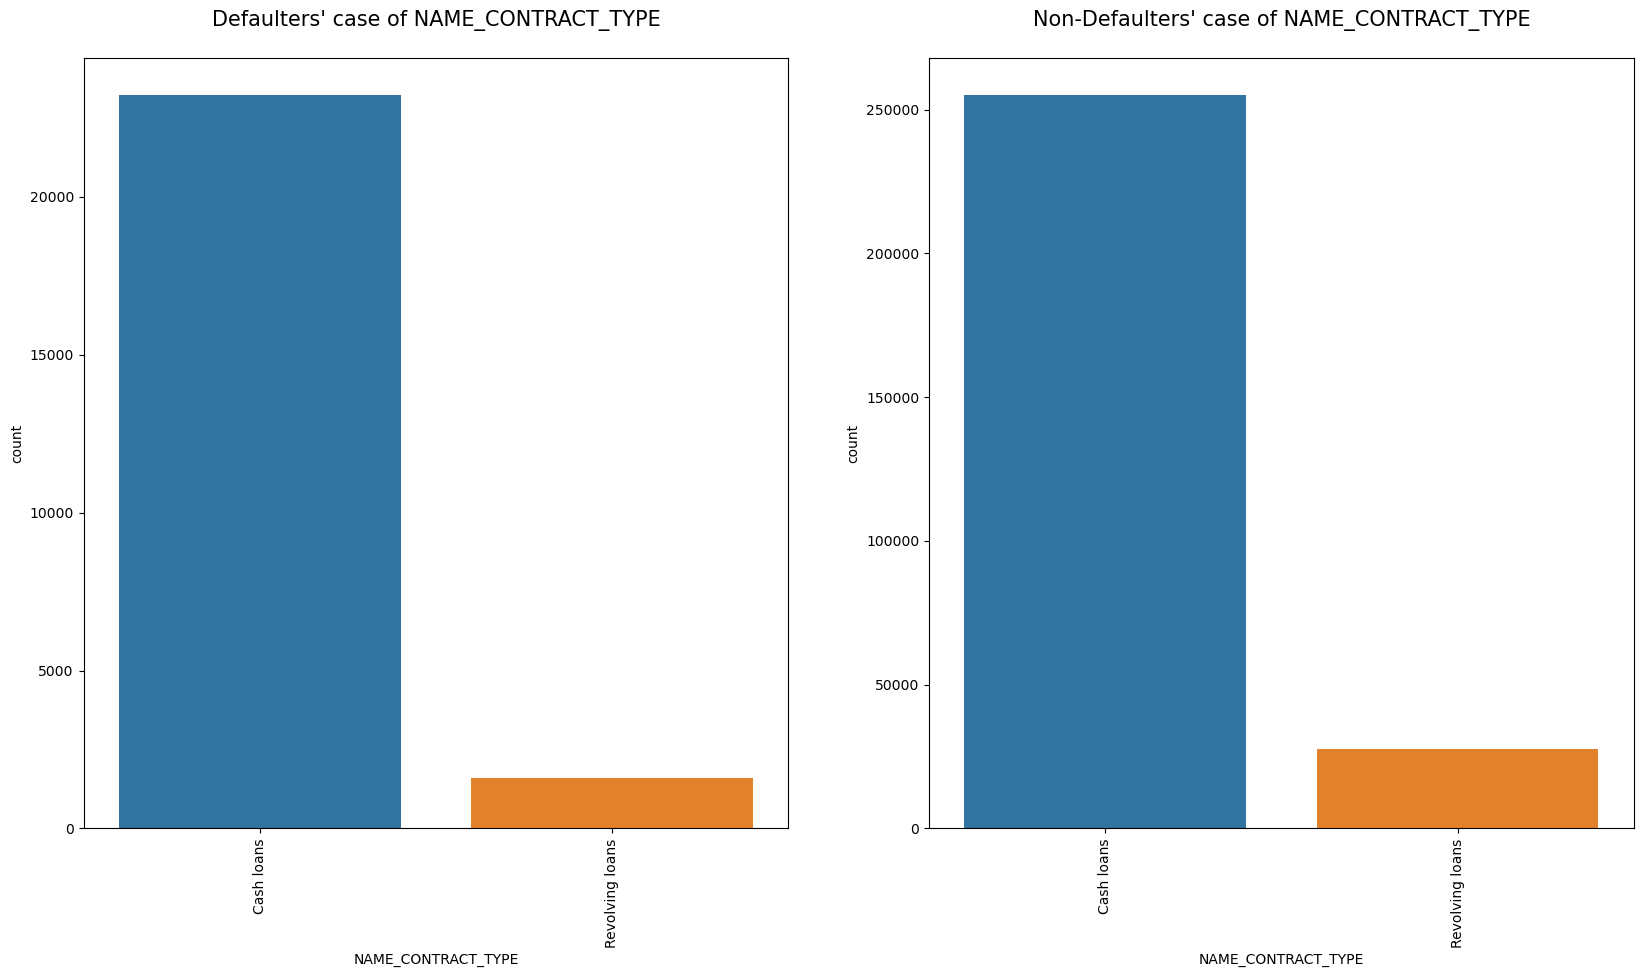

In [67]:
cat_cols('NAME_CONTRACT_TYPE')

### OBSERVATION:

The above set of graphs show that:
- Maximum no of Non-defaulters opt for cash loans.
- Maximum Defaulters also opt for cash loans.


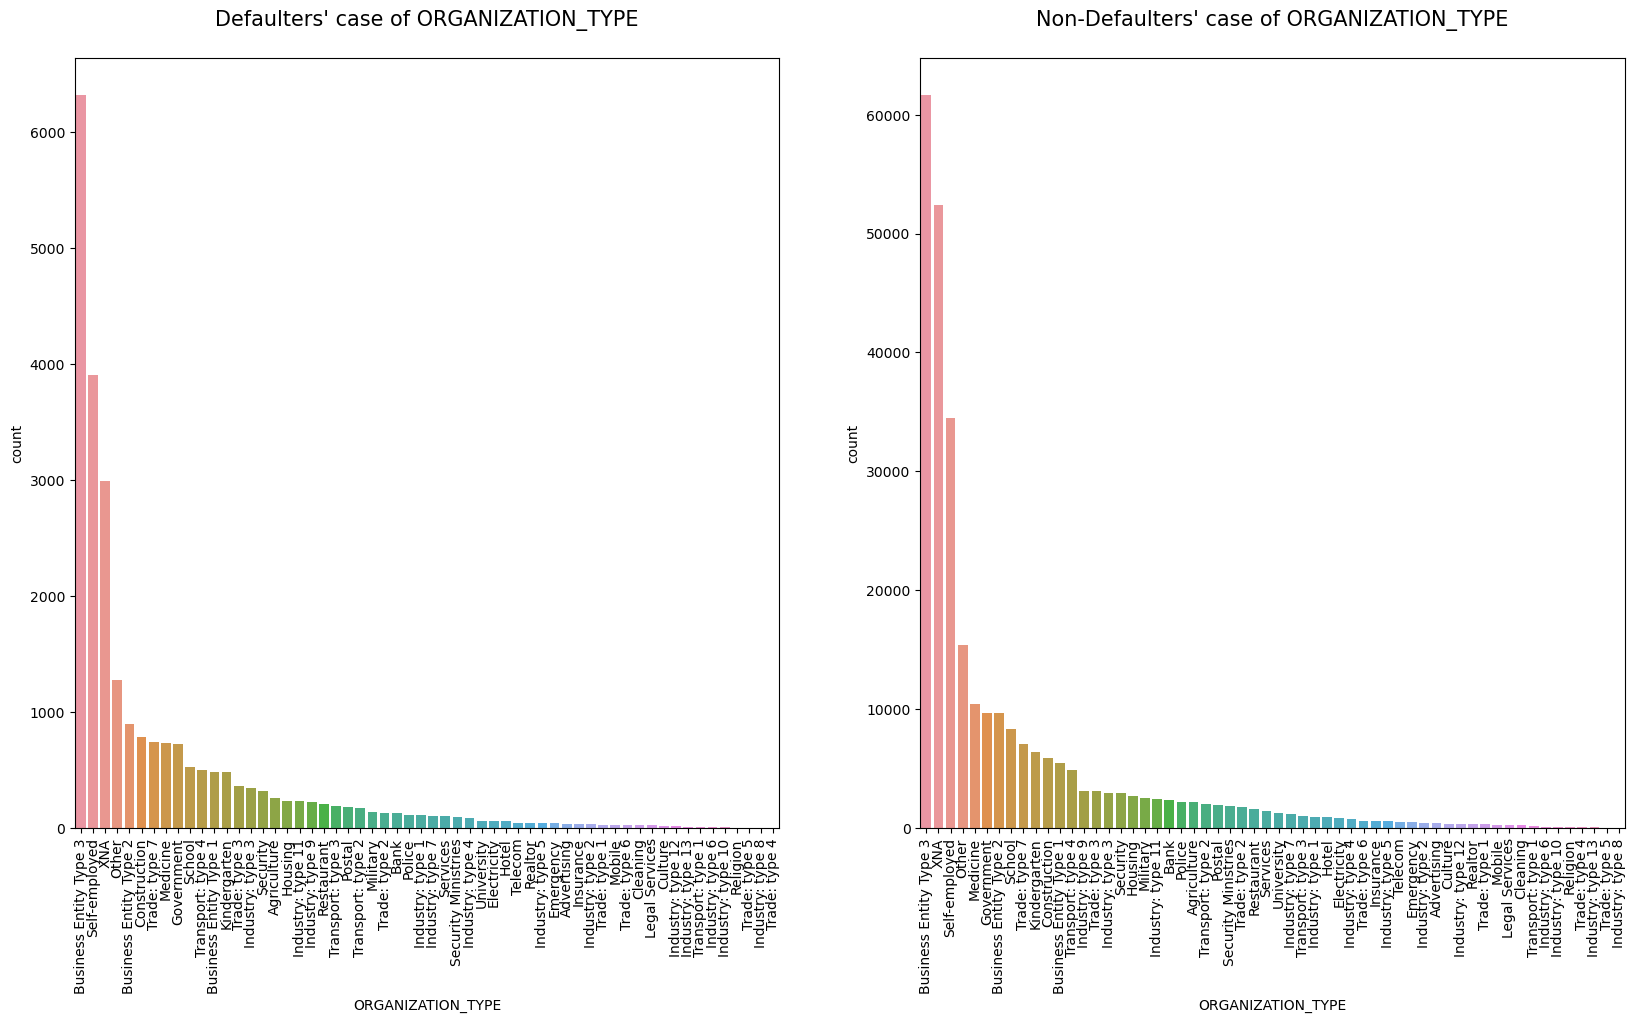

In [68]:
cat_cols('ORGANIZATION_TYPE')

### OBSERVATION:

The above set of graphs show that:

- Maximum Defaulters belong to Business Entity Type 3, organization type.
- Maximum no of Non-defaulters also belong to Business Entity Type 3, organization type.

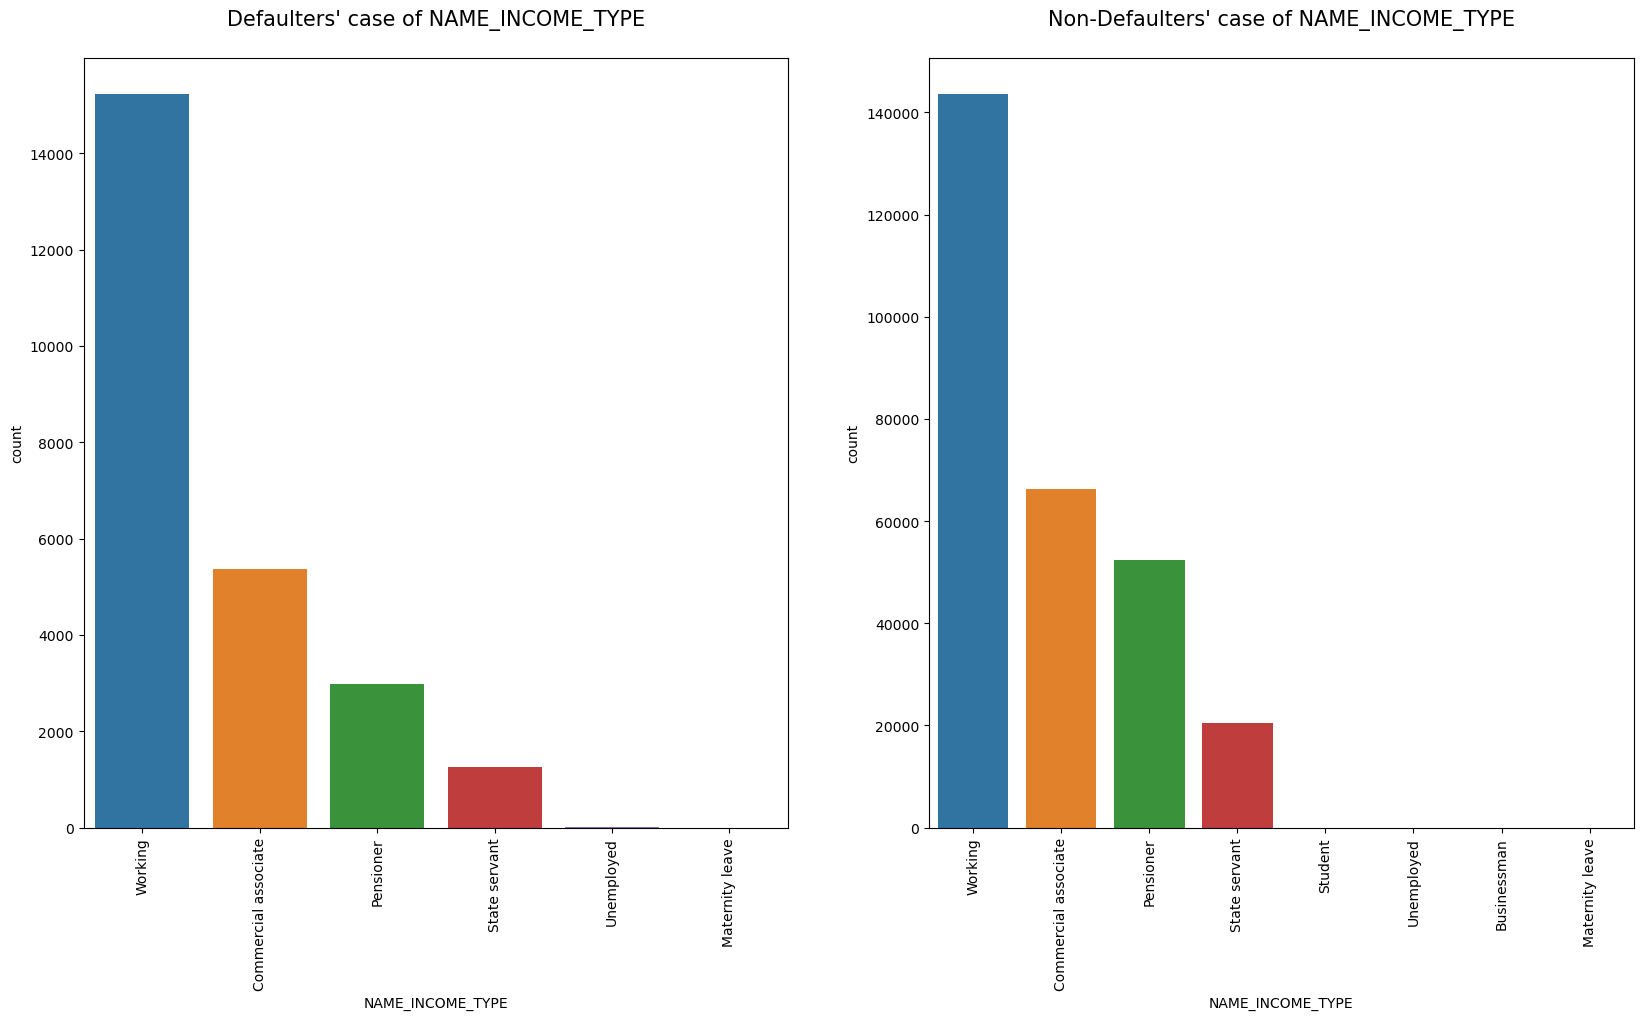

In [69]:
cat_cols('NAME_INCOME_TYPE')

### OBSERVATION:

The above set of graphs show that:

- Maximum Defaulters belong income type of Working category.
- Maximum no of Non-defaulters also belong income type of Working category.

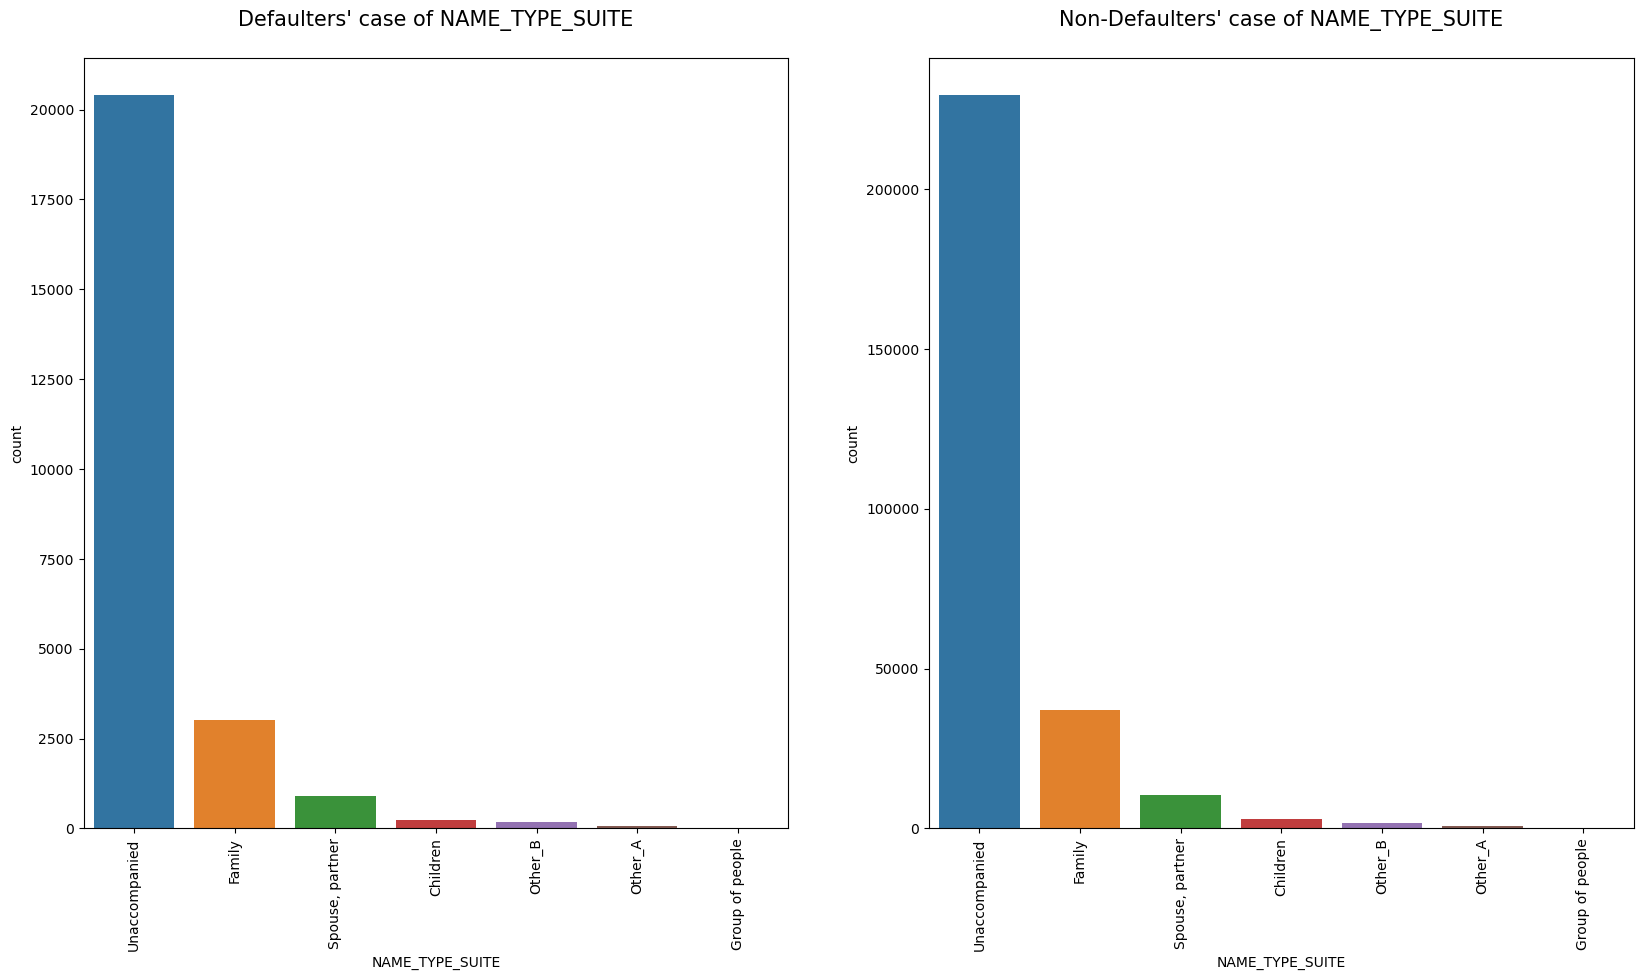

In [70]:
cat_cols('NAME_TYPE_SUITE')

### OBSERVATION:

The above set of graphs show that:

- Maximum Defaulters came for opting for loans unaccompanied.
- Maximum no of Non-defaulters also came for opting for loans unaccompanied.

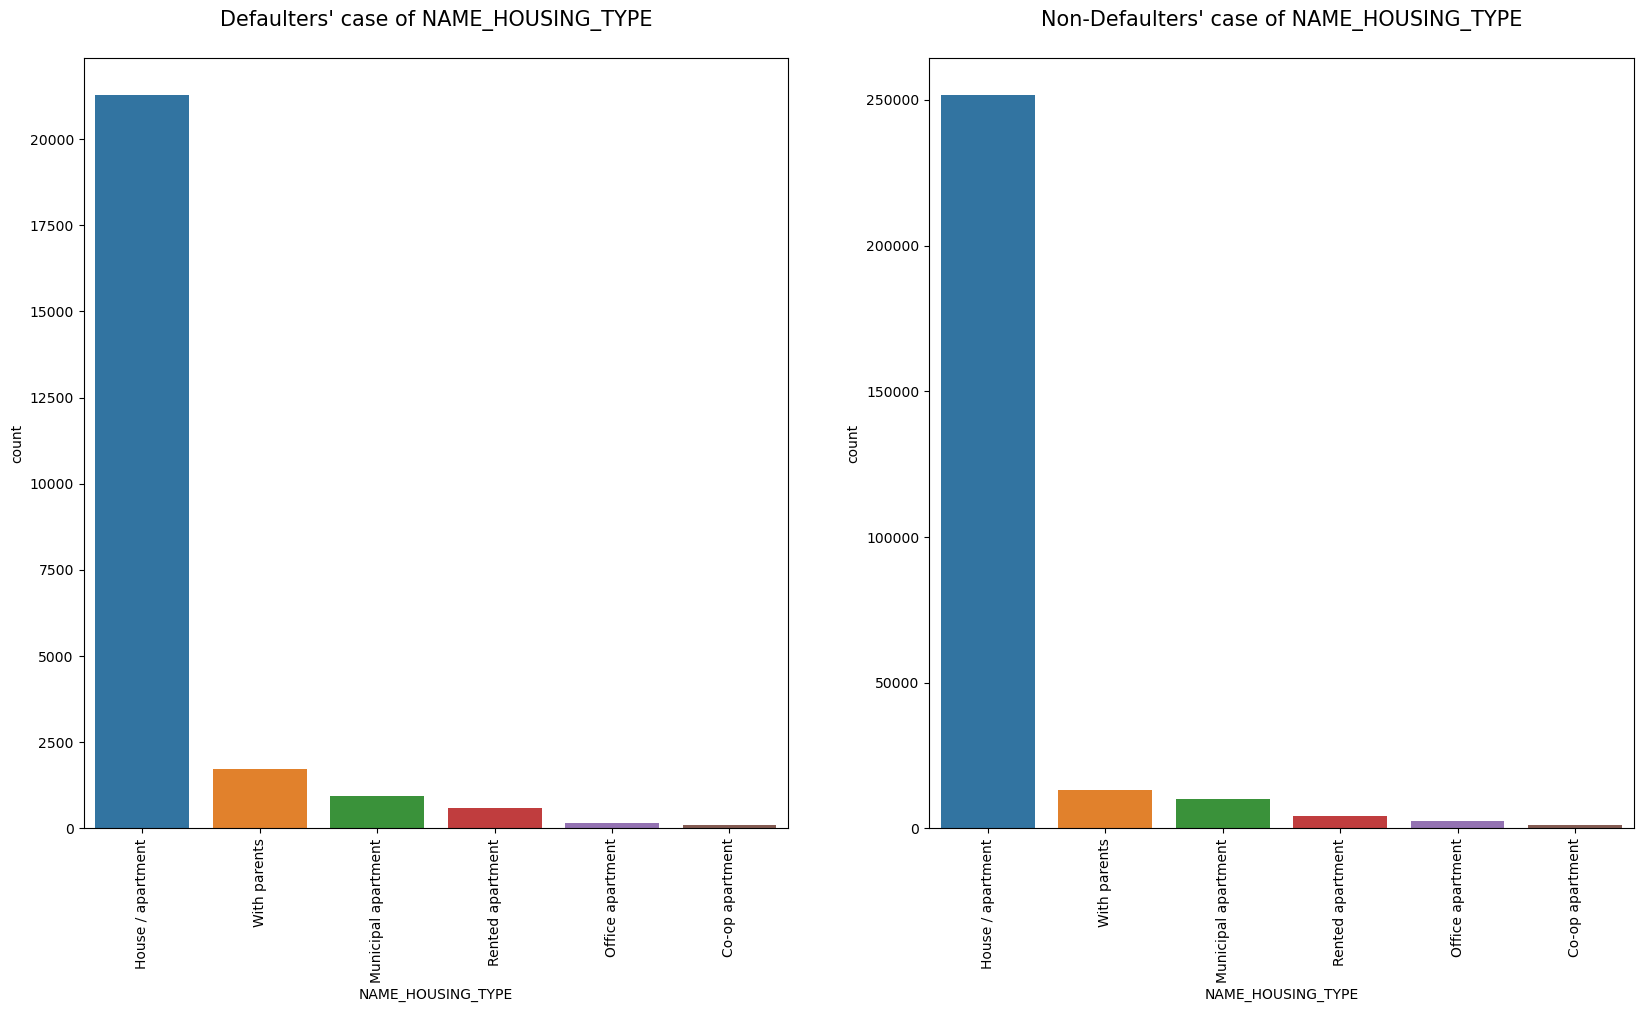

In [71]:
cat_cols('NAME_HOUSING_TYPE')

### OBSERVATION:

The above set of graphs show that:

- Maximum Defaulters live in House/apartments.
- Maximum no of Non-defaulters also live in House/apartments.

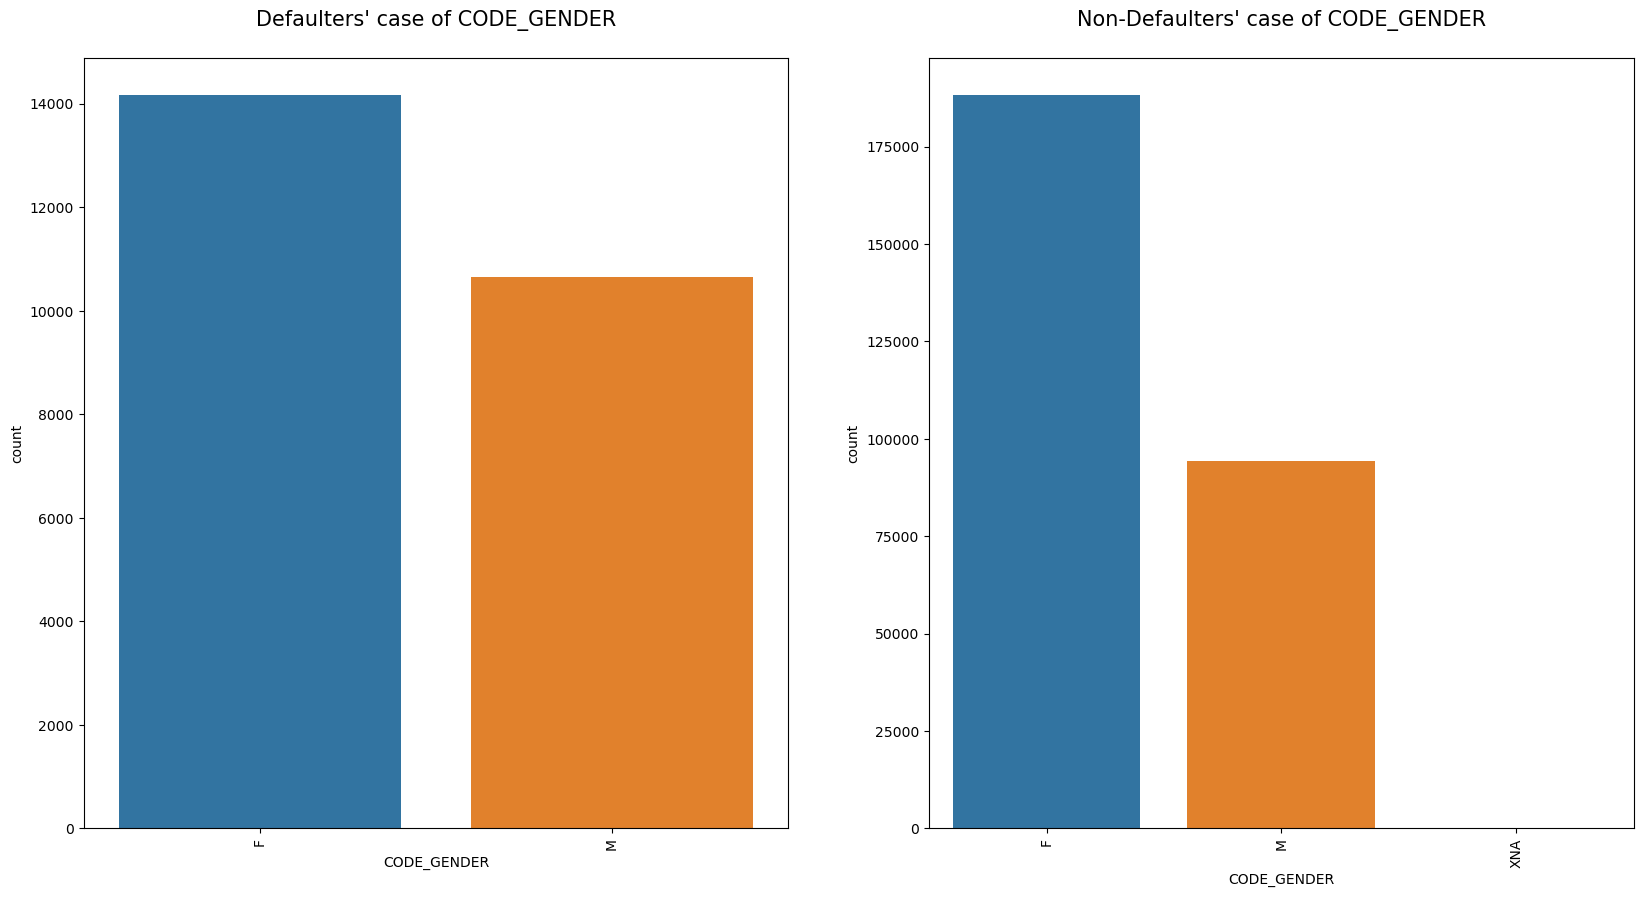

In [72]:
cat_cols('CODE_GENDER')

### OBSERVATION:

The above set of graphs show that:

- Maximum Defaulters are females.
- Maximum no of Non-defaulters also are females.

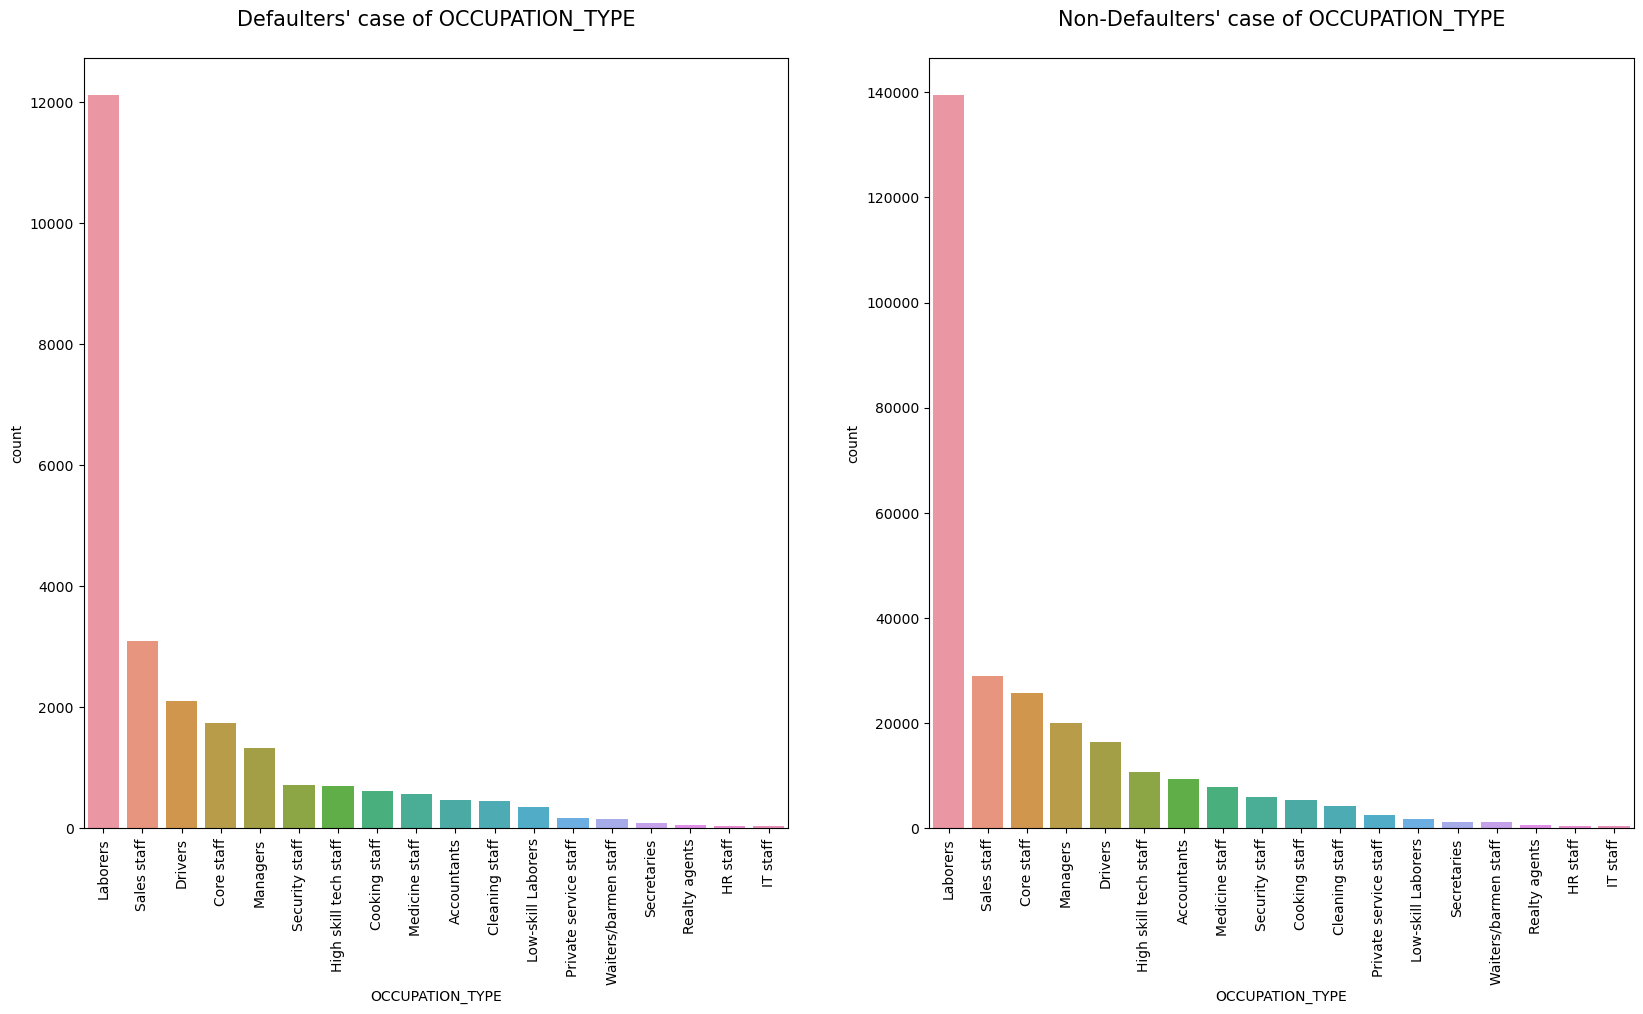

In [73]:
cat_cols('OCCUPATION_TYPE')

### OBSERVATION:

The above set of graphs show that:

- Maximum Defaulters belong to occupation type of laborers.
- Maximum no of Non-defaulters also belong to occupation type of laborers.

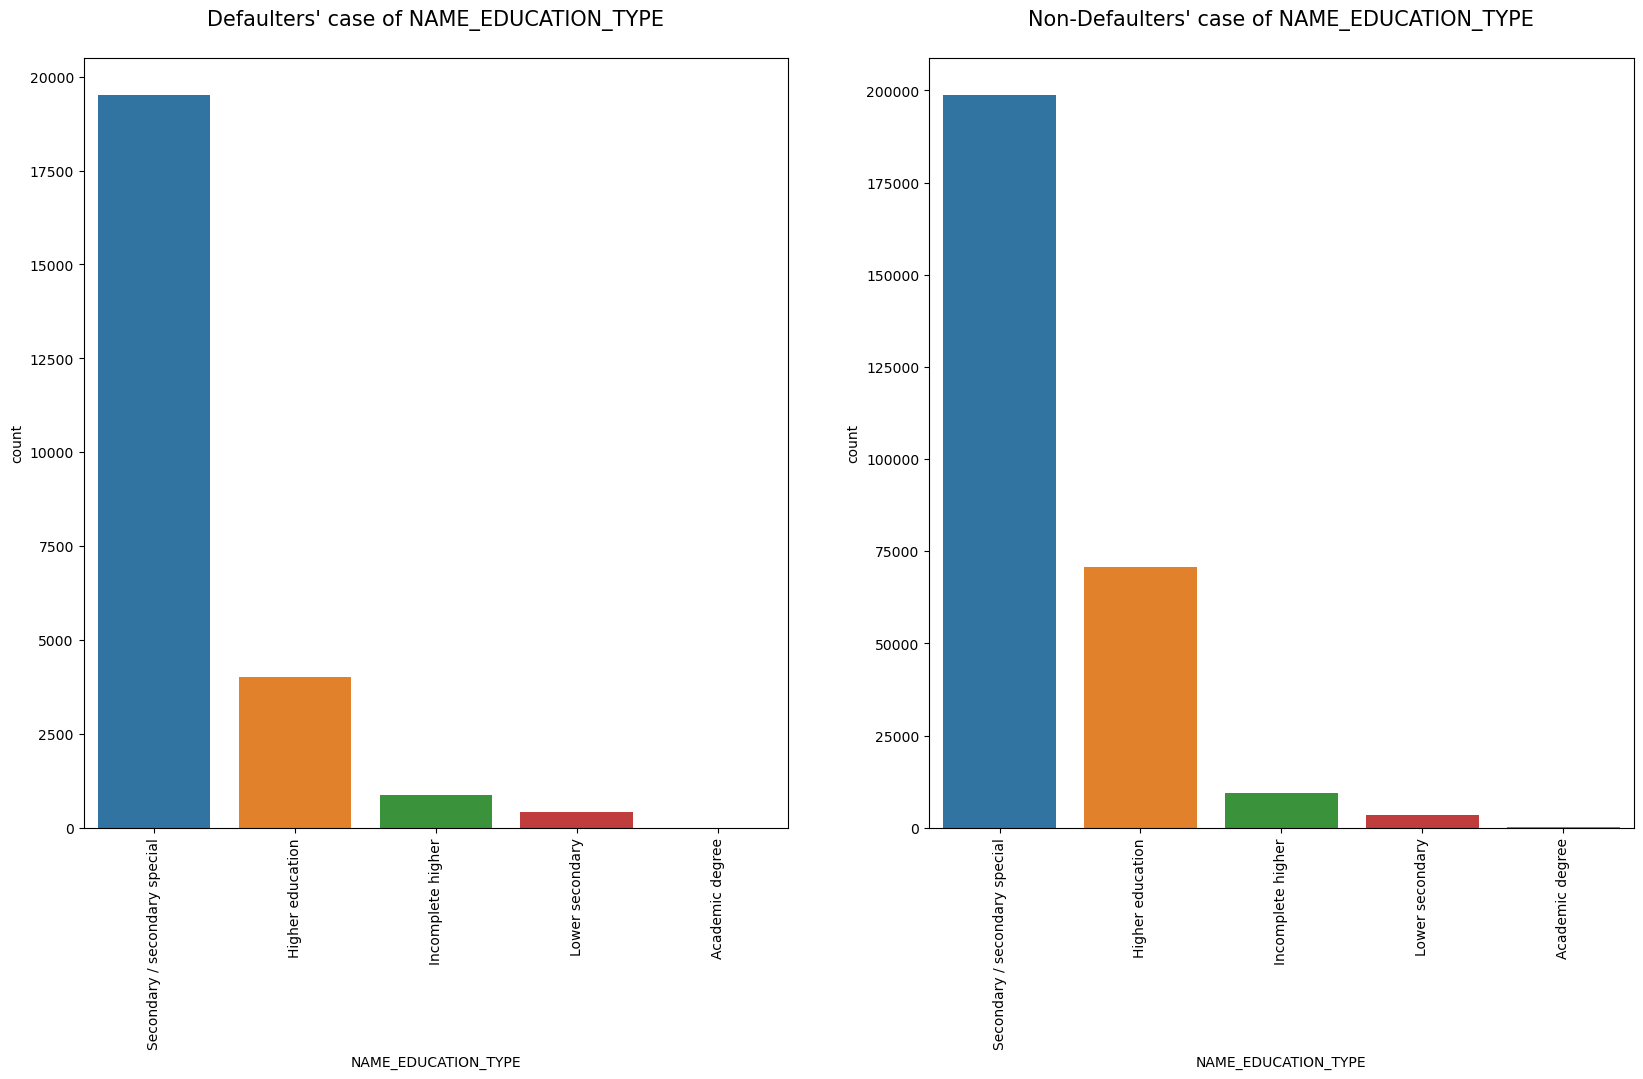

In [74]:
cat_cols("NAME_EDUCATION_TYPE")

### OBSERVATION:

The above set of graphs show that:

- Maximum Defaulters belong to occupation type of Secondary.
- Maximum no of Non-defaulters also belong to occupation type of Secondary.

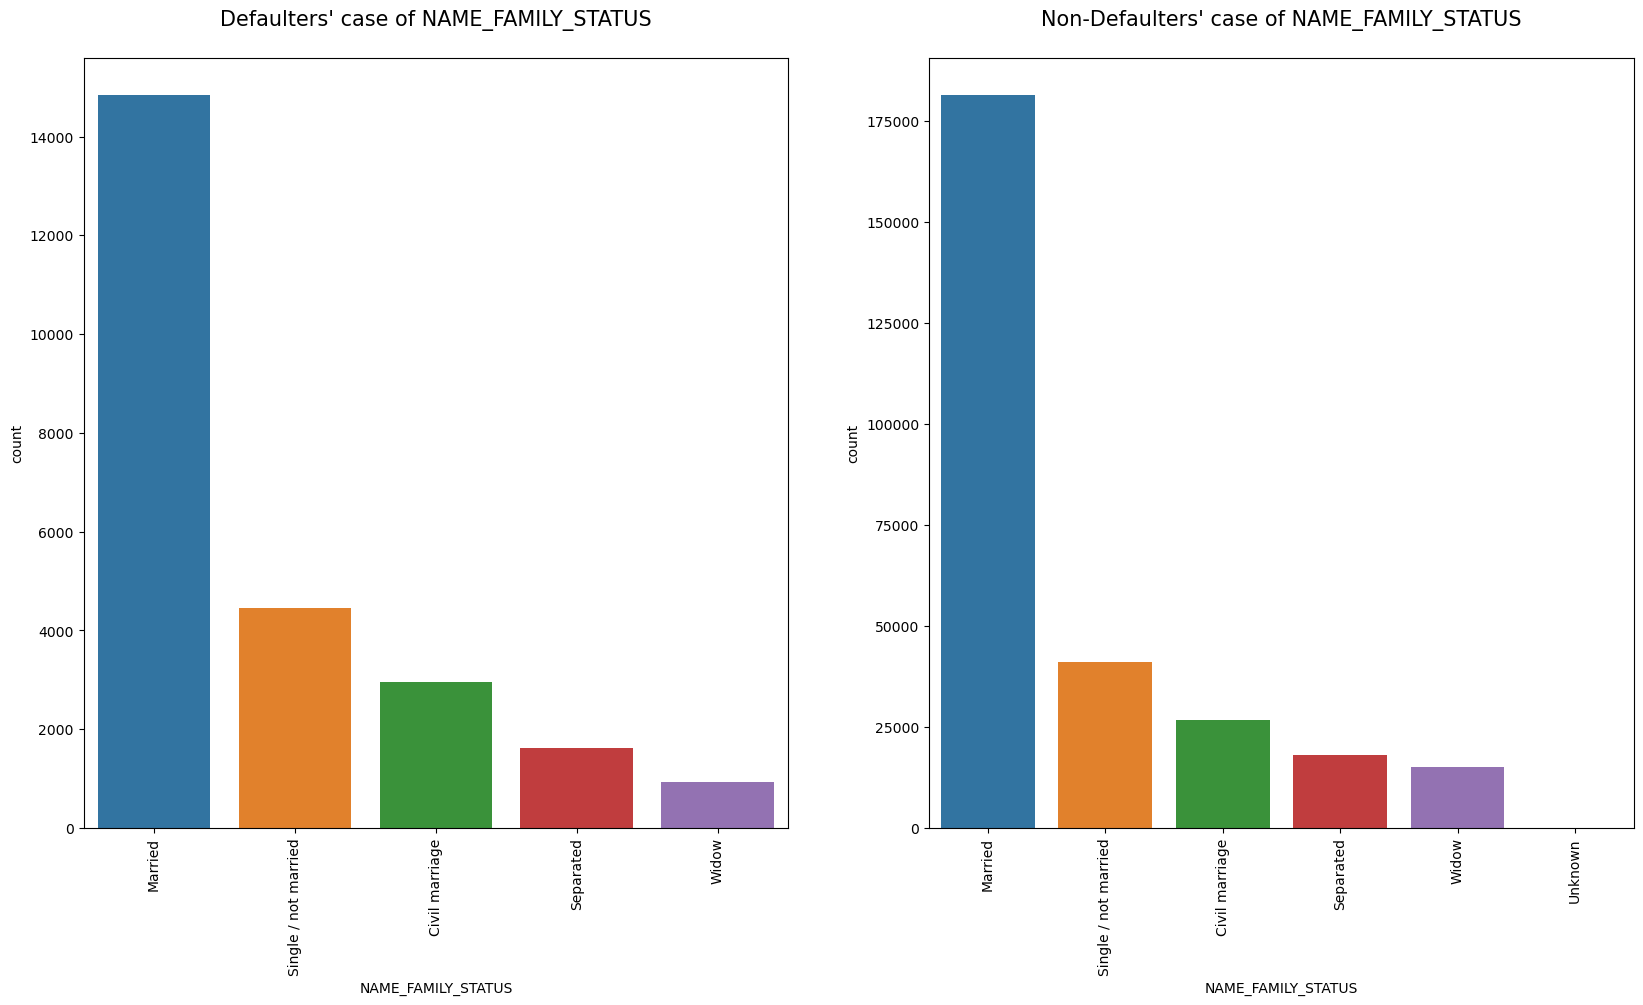

In [75]:
cat_cols("NAME_FAMILY_STATUS")

### OBSERVATION:

The above set of graphs show that:

- Maximum Defaulters belong to married category.
- Maximum no of Non-defaulters also belong to married category.

In [76]:
plt.style.use("dark_background")
def num_cols(i):
    plt.figure(figsize = [20,10])
    plt.subplot(1,2,1)
    sns.distplot(TARGET_DEFAULTER[i])
    plt.title("Defaulters' case of "+ i +"\n",color ='white', fontsize = 15)
    plt.xlabel(i)
    plt.xticks(rotation=90)
    plt.subplot(1,2,2)
    sns.distplot(TARGET_NON_DEFAULTER[i])
    plt.title("Non-Defaulters' case of "+ i +"\n",color ='white', fontsize = 15)
    plt.xlabel(i)
    plt.xticks(rotation=90)
    plt.show()

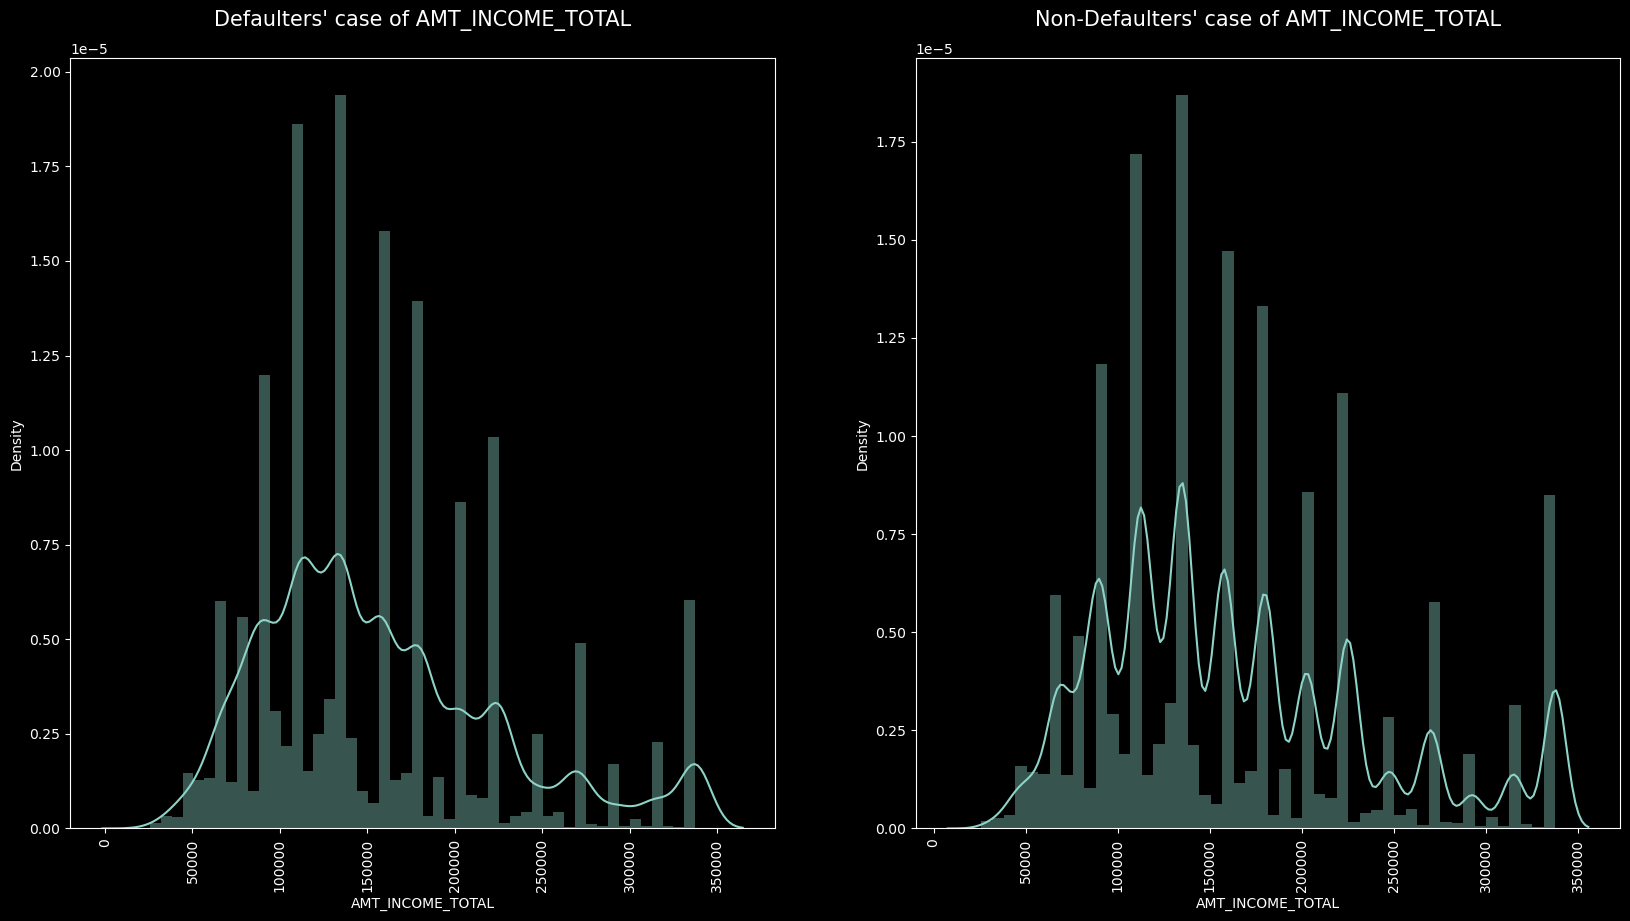

In [77]:
num_cols("AMT_INCOME_TOTAL")

### OBSERVATION:

The above set of graphs show that:

- Most of the Defaulters are earning between 1lakhs to 1.7lakhs annually.
- Most of the Non-Defaulters are earning between 1lakhs to 1.7lakhs annually.

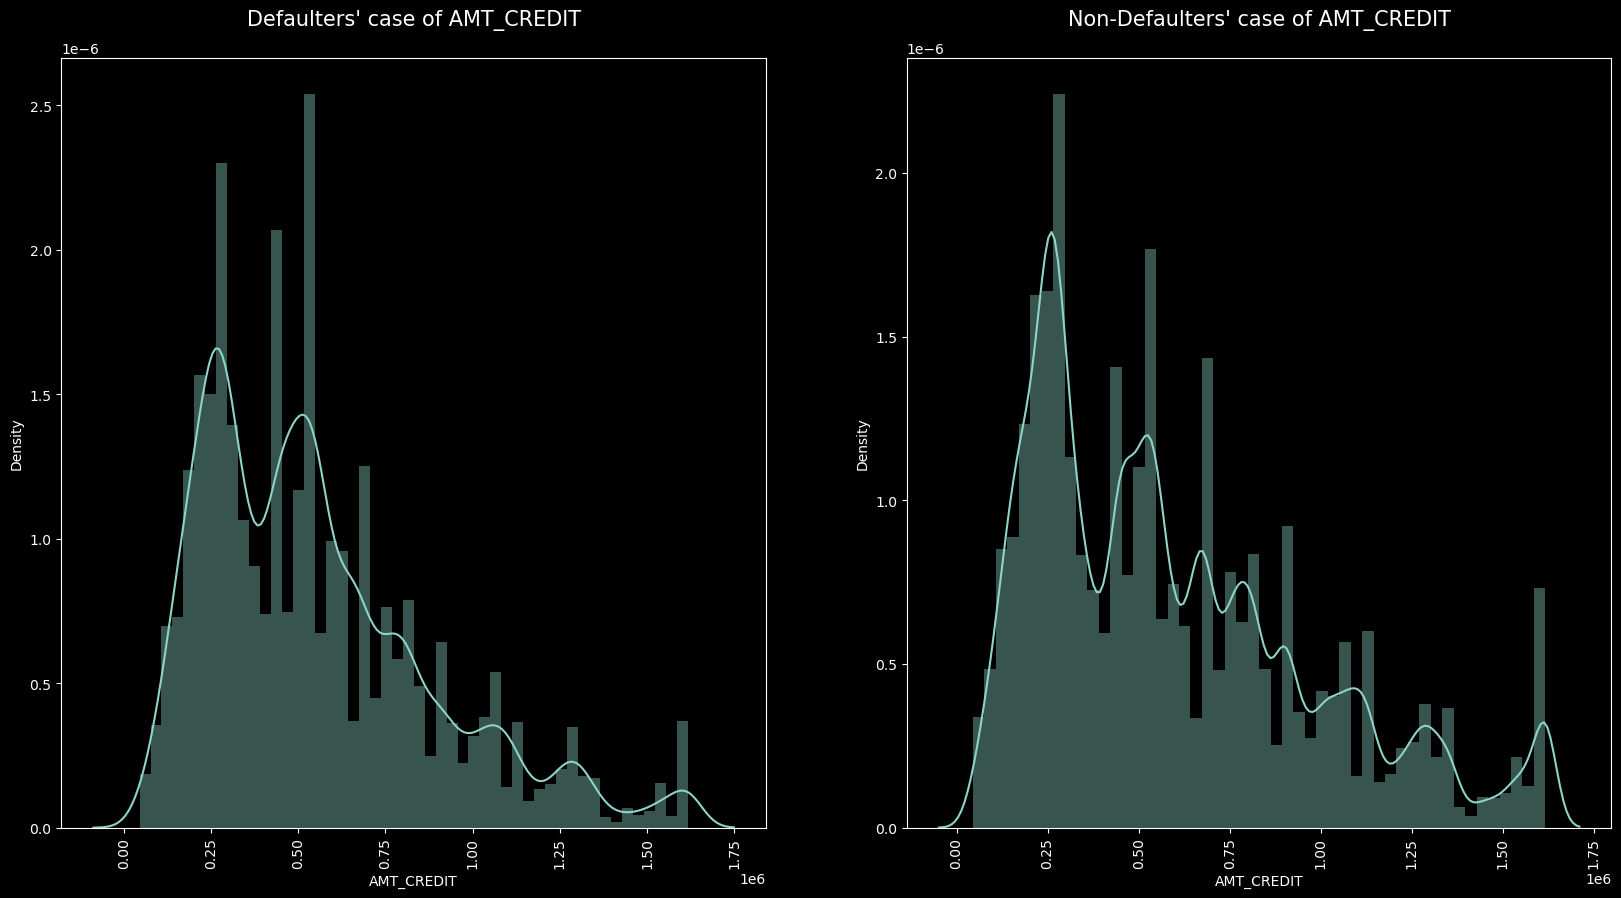

In [78]:
num_cols("AMT_CREDIT")

### OBSERVATION:

The above set of graphs show that:

- Most of the Defaulters are borrowing between 0.1 lakhs to 0.75 lakhs annually.
- Most of the Non-Defaulters are earning between 0.2 lakhs to 0.6 lakhs annually.

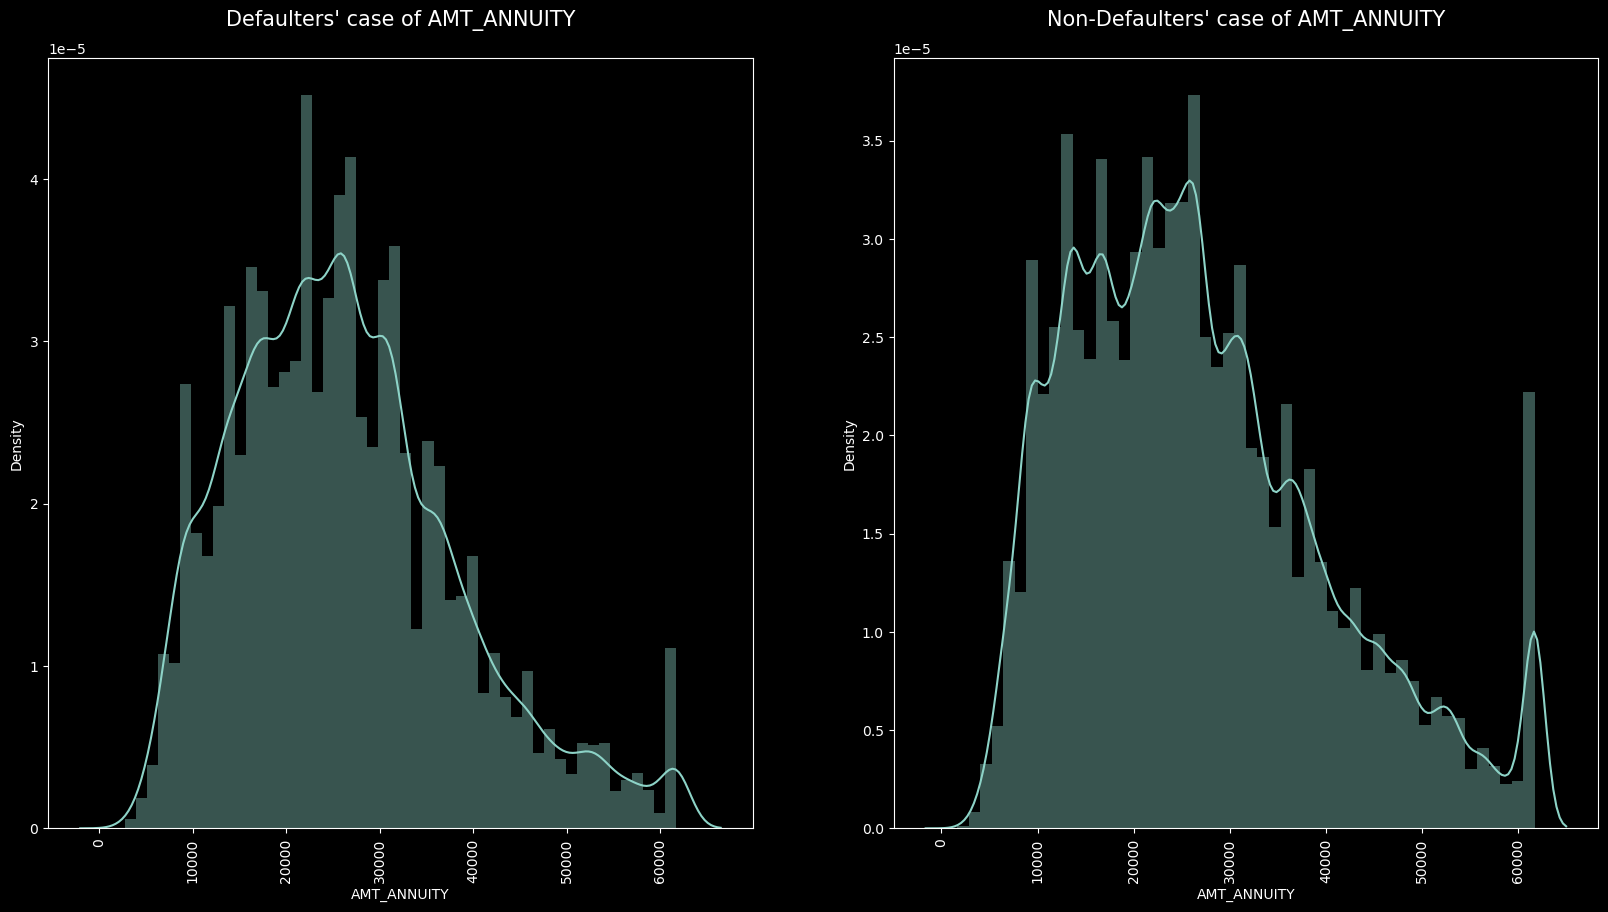

In [79]:
num_cols("AMT_ANNUITY")

### OBSERVATION:

The above set of graphs show that:

- Most of the Defaulters are paying an annuity between 20 thousand to 40 thousand annually.
- Most of the Non-Defaulters are paying an annuity between 10 thousand to 30 thousand annually.

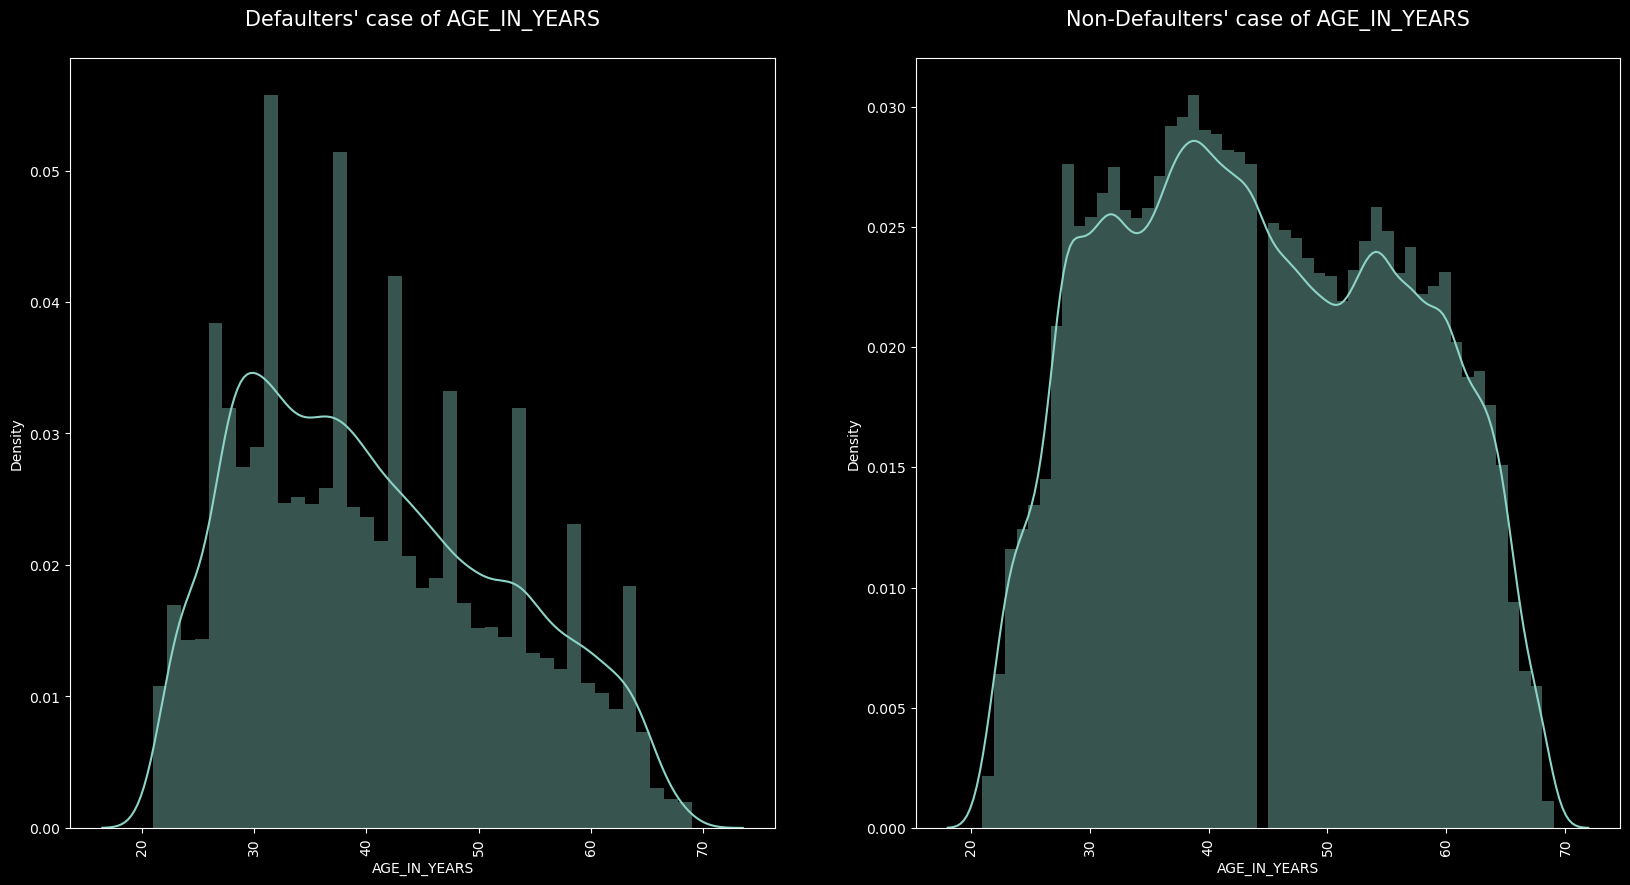

In [80]:
num_cols("AGE_IN_YEARS")

### OBSERVATION:

The above set of graphs show that:

- Most of the Defaulters belong to the age-group of 25 to 40 years.
- Most of the Non-Defaulters belong to the age-group of 25 to 45 years.

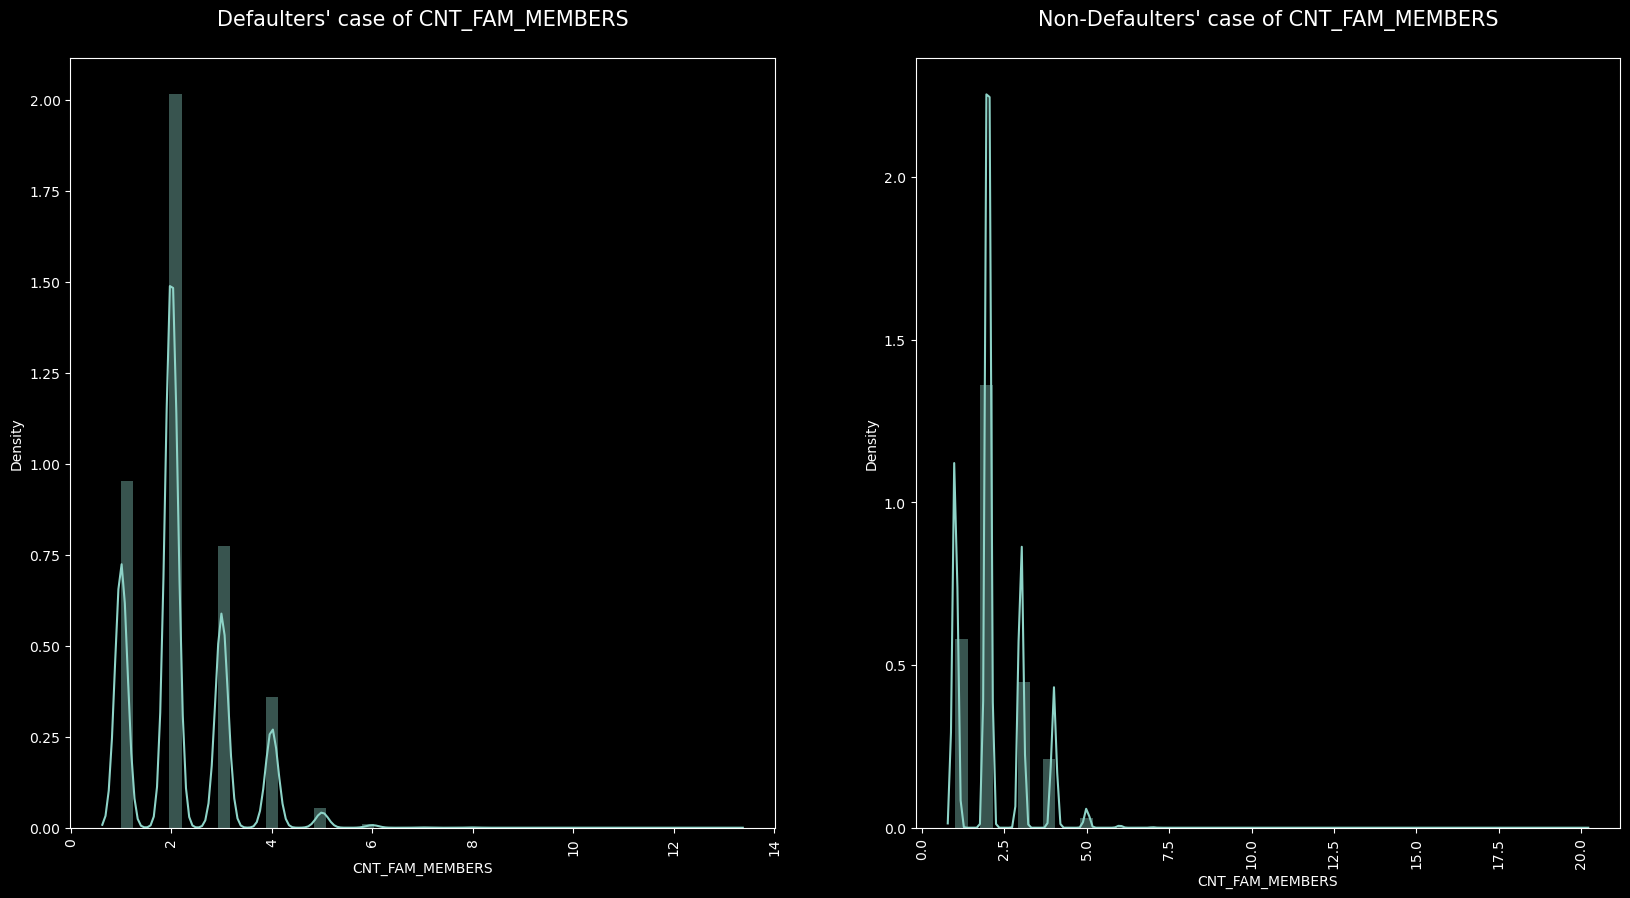

In [81]:
num_cols("CNT_FAM_MEMBERS")

### OBSERVATION:

The above set of graphs show that:

- Most of the Defaulters have family members between 2-3.
- Most of the Non-Defaulters have family members between 1-2.

## BIVARIATE ANALYSIS

### NUMERIC - CATEGORICAL ANALYSIS

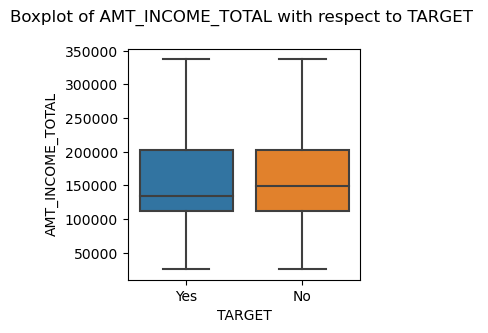

In [82]:
plt.style.use("default")
application_data["TARGET"].replace((0, 1), ('No', 'Yes'), inplace= True)
plt.figure(figsize = [3,3])
sns.boxplot(data=application_data, x="TARGET", y ="AMT_INCOME_TOTAL")
plt.title("Boxplot of AMT_INCOME_TOTAL with respect to TARGET \n")
plt.xlabel("TARGET")
plt.show()

### OBSERVATION:

The above graphs shows that:

- Most of the Defaulters are earning between 1.2 lakhs to 2 lakhs annually and median income is about 1.3 lakhs.
- Most of the Non-Defaulters are earning between 1.2 lakhs to 2 lakhs annually and median income is about 1.5 lakhs.

<Figure size 300x300 with 0 Axes>

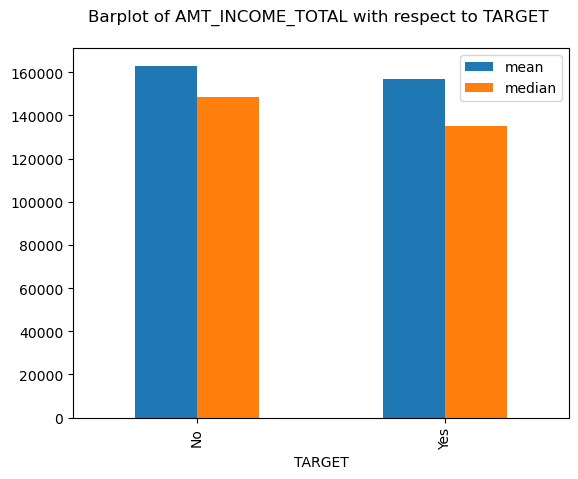

In [83]:
plt.figure(figsize = [3,3])
application_data.groupby("TARGET")["AMT_INCOME_TOTAL"].aggregate(["mean","median"]).plot.bar()
plt.title("Barplot of AMT_INCOME_TOTAL with respect to TARGET \n")
plt.xlabel("TARGET")
plt.show()

### OBSERVATION:

The above graphs shows that:

- Most of the Non-Defaulters have mean and median income of about 1.6 and 1.5 lakhs respectively annually.
- Most of the Defaulters have mean and median income of about 1.5 and 1.4 lakhs respectively annually.

<Figure size 300x300 with 0 Axes>

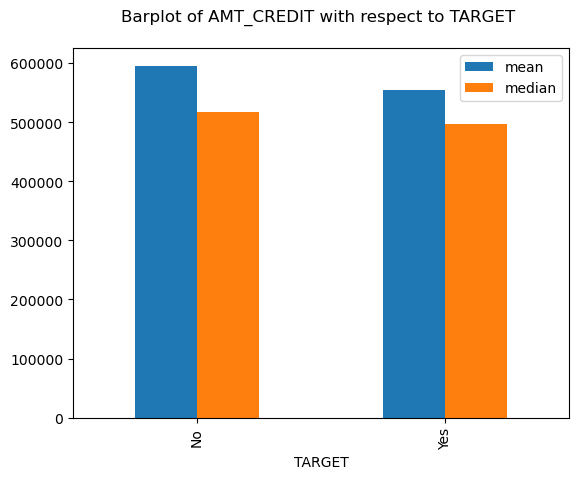

In [84]:
plt.figure(figsize = [3,3])
application_data.groupby("TARGET")["AMT_CREDIT"].aggregate(["mean","median"]).plot.bar()
plt.title("Barplot of AMT_CREDIT with respect to TARGET \n")
plt.xlabel("TARGET")
plt.show()

### OBSERVATION:

The above graphs shows that:

- Most of the Non-Defaulters have mean and median credit of about 6 and 5 lakhs respectively annually.
- Most of the Defaulters have mean and median credit of about 5.5 and 4.5 lakhs respectively annually.

<Figure size 300x300 with 0 Axes>

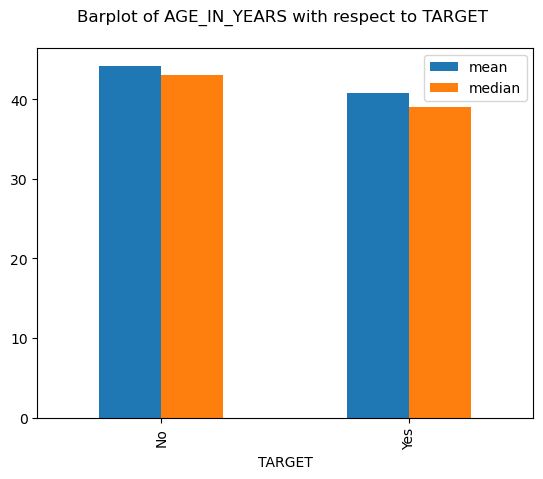

In [85]:
plt.figure(figsize = [3,3])
application_data.groupby("TARGET")["AGE_IN_YEARS"].aggregate(["mean","median"]).plot.bar()
plt.title("Barplot of AGE_IN_YEARS with respect to TARGET \n")
plt.xlabel("TARGET")
plt.show()

### OBSERVATION:

The above graphs shows that:

- Most of the Non-Defaulters have mean and median age of about 40 years.
- Most of the Defaulters have mean and median age of about 40 years.

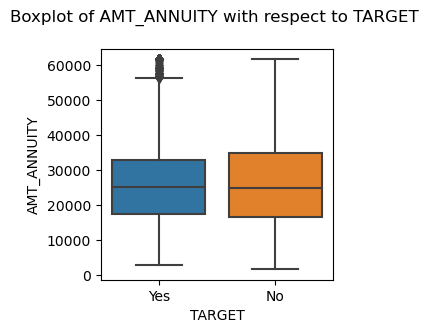

In [86]:
plt.figure(figsize = [3,3])
sns.boxplot(data=application_data, x="TARGET", y ="AMT_ANNUITY")
plt.title("Boxplot of AMT_ANNUITY with respect to TARGET \n")
plt.xlabel("TARGET")
plt.show()

### OBSERVATION:

The above graphs shows that:

- Most of the Defaulters are paying annuity between 18,000 to 32,000 annually and median annuity is about 25,000.
- Most of the Non-Defaulters are earning between 18,000 to 35,000 annually and median annuity is about 25,000.

<Figure size 300x300 with 0 Axes>

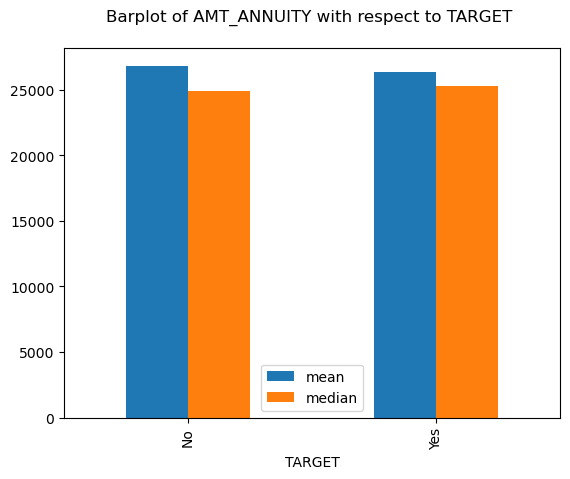

In [87]:
plt.figure(figsize = [3,3])
application_data.groupby("TARGET")["AMT_ANNUITY"].aggregate(["mean","median"]).plot.bar()
plt.title("Barplot of AMT_ANNUITY with respect to TARGET \n")
plt.xlabel("TARGET")
plt.show()

### OBSERVATION:

The above graphs shows that:

- Most of the Non-Defaulters have mean and median annuity of about 26,000 and 25,000 respectively annually.
- Most of the Defaulters have mean and median credit of about 26,000 and 25,000 respectively annually.

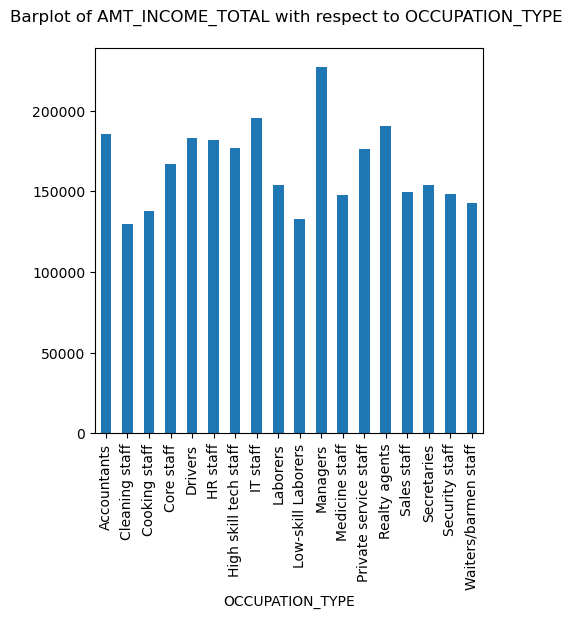

In [88]:
plt.figure(figsize = [5,5])
application_data.groupby("OCCUPATION_TYPE")["AMT_INCOME_TOTAL"].aggregate("mean").plot.bar()
plt.title("Barplot of AMT_INCOME_TOTAL with respect to OCCUPATION_TYPE \n")
plt.xlabel("OCCUPATION_TYPE")
plt.show()

### OBSERVATION:

The above graphs shows that:

- The clients with maximum income belong to MANAGERS occupation type.

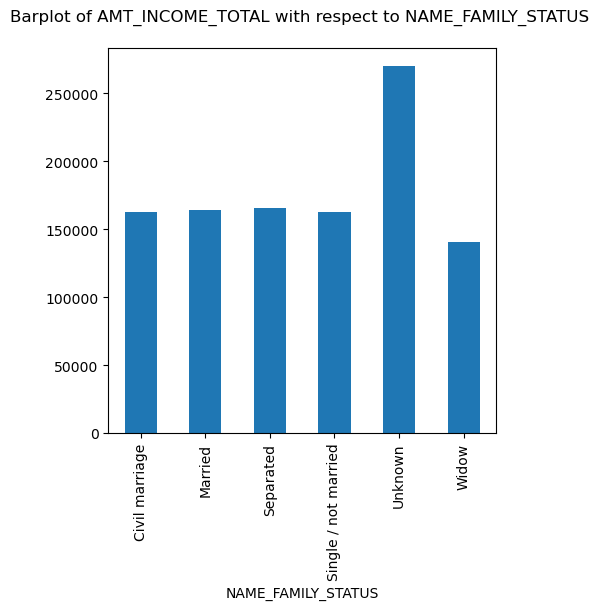

In [89]:
plt.figure(figsize = [5,5])
application_data.groupby("NAME_FAMILY_STATUS")["AMT_INCOME_TOTAL"].aggregate("mean").plot.bar()
plt.title("Barplot of AMT_INCOME_TOTAL with respect to NAME_FAMILY_STATUS \n")
plt.xlabel("NAME_FAMILY_STATUS")
plt.show()

### OBSERVATION:

The above graphs shows that:

- The clients with maximum income belong unknown family status type.

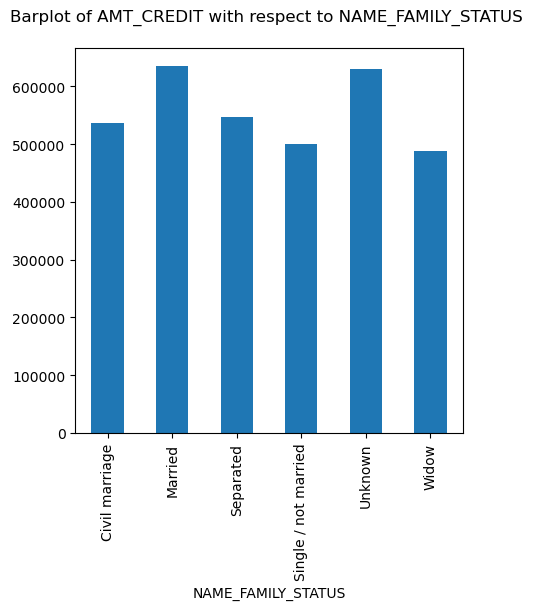

In [90]:
plt.figure(figsize = [5,5])
application_data.groupby("NAME_FAMILY_STATUS")["AMT_CREDIT"].aggregate("mean").plot.bar()
plt.title("Barplot of AMT_CREDIT with respect to NAME_FAMILY_STATUS \n")
plt.xlabel("NAME_FAMILY_STATUS")
plt.show()

### OBSERVATION:

The above graphs shows that:

- The clients with maximum credit belong to married family status type.

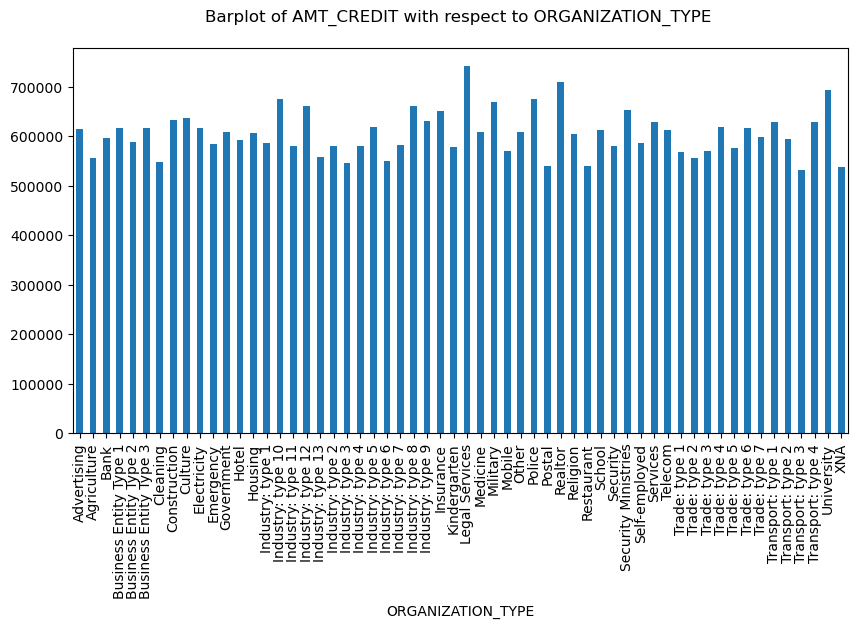

In [91]:
plt.figure(figsize = [10,5])
application_data.groupby("ORGANIZATION_TYPE")["AMT_CREDIT"].aggregate("mean").plot.bar()
plt.title("Barplot of AMT_CREDIT with respect to ORGANIZATION_TYPE \n")
plt.xlabel("ORGANIZATION_TYPE")
plt.show()

### OBSERVATION:

The above graphs shows that:

- The clients with maximum credit belong to Legal Services organization type.

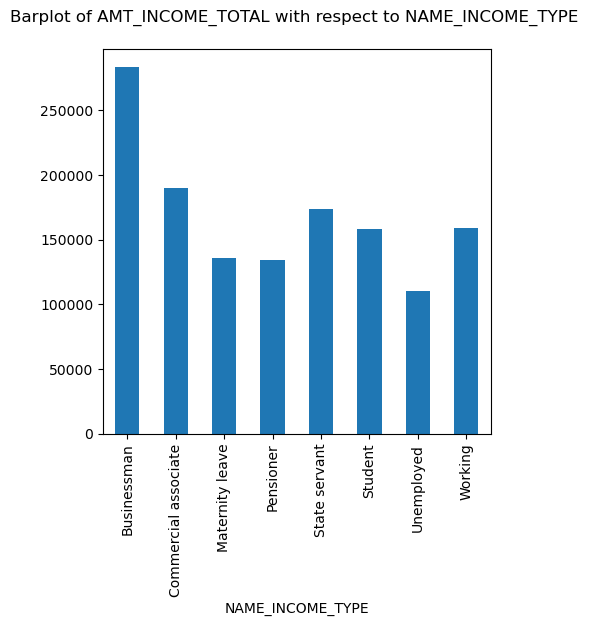

In [92]:
plt.figure(figsize = [5,5])
application_data.groupby("NAME_INCOME_TYPE")["AMT_INCOME_TOTAL"].aggregate("mean").plot.bar()
plt.title("Barplot of AMT_INCOME_TOTAL with respect to NAME_INCOME_TYPE \n")
plt.xlabel("NAME_INCOME_TYPE")
plt.show()

### OBSERVATION:

The above graphs shows that:

- The clients with maximum income belong to Businessman Income type.

### CATEGORICAL- CATEGORICAL ANALYSIS

In [93]:
application_data["TARGET"].replace(('No', 'Yes'), (0, 1), inplace = True)
print(application_data["TARGET"].value_counts())
print(application_data["TARGET"].mean())

0    282686
1     24825
Name: TARGET, dtype: int64
0.08072881945686496


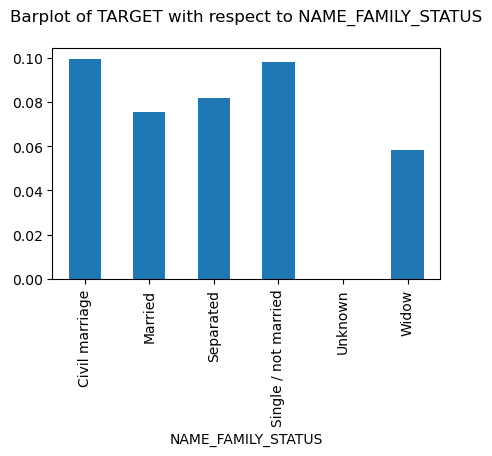

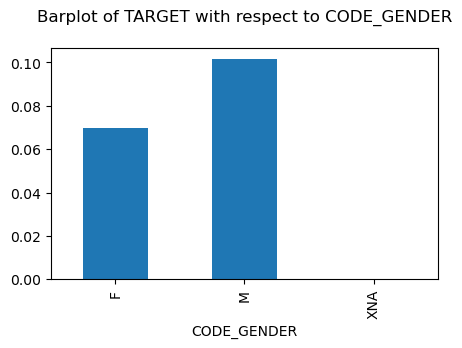

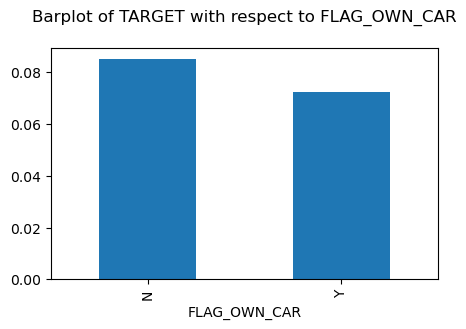

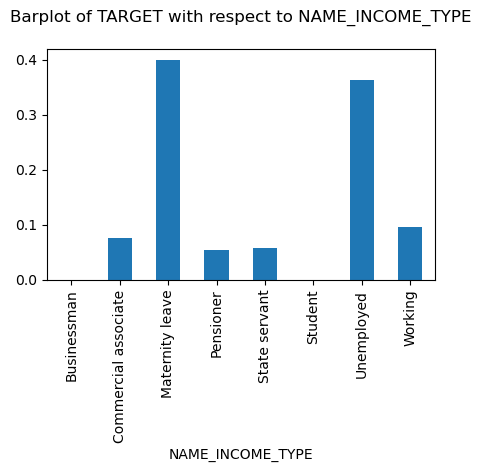

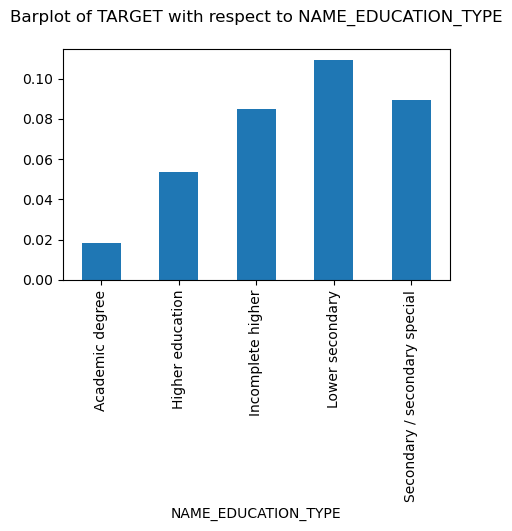

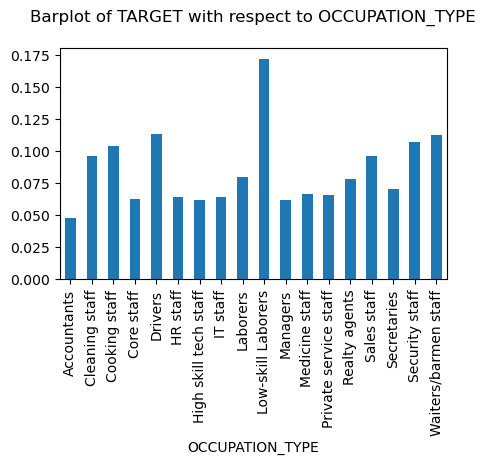

In [94]:
var_list_4 = ["NAME_FAMILY_STATUS", 'CODE_GENDER', "FLAG_OWN_CAR", 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'OCCUPATION_TYPE']
for i in var_list_4: 
    plt.figure(figsize = [5,3])
    application_data.groupby(i)["TARGET"].mean().plot.bar()
    plt.title("Barplot of TARGET with respect to "+ i + "\n")
    plt.xlabel(i)
    plt.show()

### OBSERVATION:

The above set of diagrams give the following results:

- Clients who have a family status of Civil Marriage are more likely to be defaulters.
- Clients who are male are more likely to be defaulters.
- Clients who do not have a car are more likely to be defaulters.
- Female Clients who are on a Maternity Leave are more likely to be defaulters.
- Clients who have a Lower Secondary type of education are more likely to be defaulters.
- Clients who are Low Skilled Labourers are more likely to be defaulters.

In [95]:
application_data["AGE_IN_YEARS"] = pd.cut(application_data["AGE_IN_YEARS"], [0,30,40,50,60,9999], labels = ["<30", "30-40", "40-50", "50-60", "60+"])

In [96]:
application_data["AGE_IN_YEARS"].value_counts()

30-40    82770
40-50    75509
50-60    67955
<30      48869
60+      32408
Name: AGE_IN_YEARS, dtype: int64

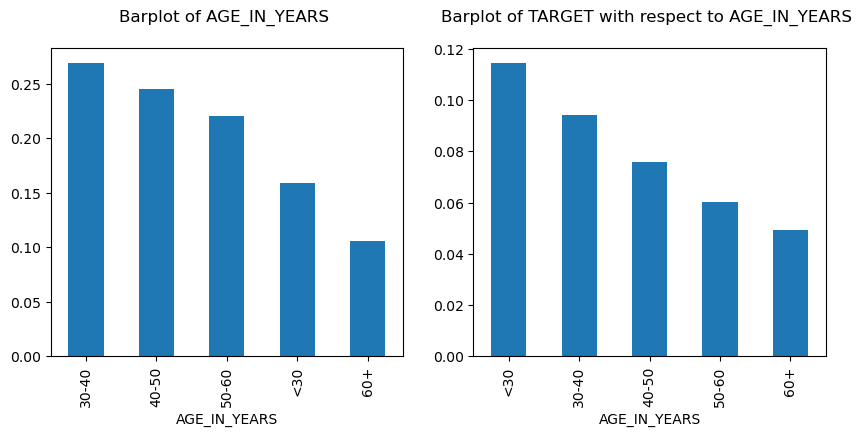

In [97]:
plt.figure(figsize=[10,4])
plt.subplot(1,2,1)
application_data["AGE_IN_YEARS"].value_counts(normalize=True).plot.bar()
plt.title("Barplot of AGE_IN_YEARS \n")
plt.xlabel("AGE_IN_YEARS")
plt.subplot(1,2,2)
application_data.groupby("AGE_IN_YEARS")["TARGET"].mean().plot.bar()
plt.title("Barplot of TARGET with respect to AGE_IN_YEARS \n")
plt.xlabel("AGE_IN_YEARS")
plt.show()

### OBSERVATION:

Clients who belong to the age group of less than 30 years are more likely to be defaulters.

### NUMERIC- NUMERIC ANALYSIS

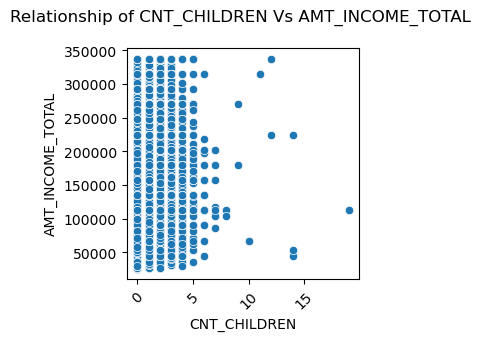

In [98]:
plt.figure(figsize=[3,3])
sns.scatterplot(application_data["CNT_CHILDREN"],application_data["AMT_INCOME_TOTAL"])
plt.xlabel("CNT_CHILDREN")
plt.ylabel("AMT_INCOME_TOTAL")
plt.title("Relationship of CNT_CHILDREN Vs AMT_INCOME_TOTAL \n")
plt.xticks(rotation=45)
plt.show()


### OBSERVATION:

It appears that the above two variables do not have any visible correlation.

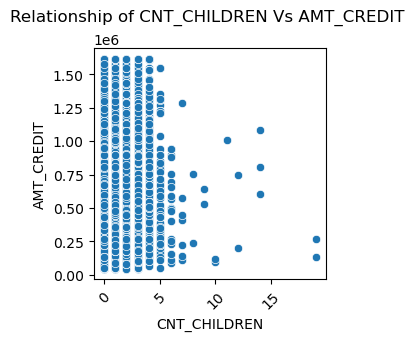

In [99]:
plt.figure(figsize=[3,3])
sns.scatterplot(application_data["CNT_CHILDREN"],application_data["AMT_CREDIT"])
plt.xlabel("CNT_CHILDREN")
plt.ylabel("AMT_CREDIT")
plt.title("Relationship of CNT_CHILDREN Vs AMT_CREDIT \n")
plt.xticks(rotation=45)
plt.show()

### OBSERVATION:

It appears that the above two variables do not have any visible correlation.

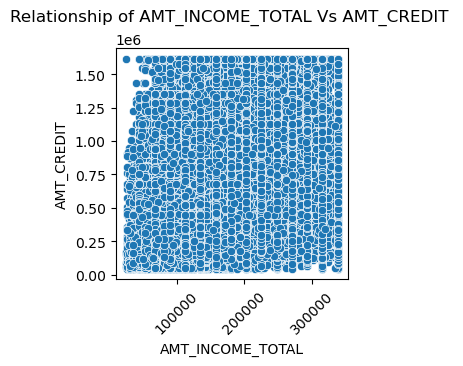

In [100]:
plt.figure(figsize=[3,3])
sns.scatterplot(application_data["AMT_INCOME_TOTAL"],application_data["AMT_CREDIT"])
plt.xlabel("AMT_INCOME_TOTAL")
plt.ylabel("AMT_CREDIT")
plt.title("Relationship of AMT_INCOME_TOTAL Vs AMT_CREDIT \n")
plt.xticks(rotation=45)
plt.show()

### OBSERVATION:

It appears that the above two variables do not have any visible correlation.

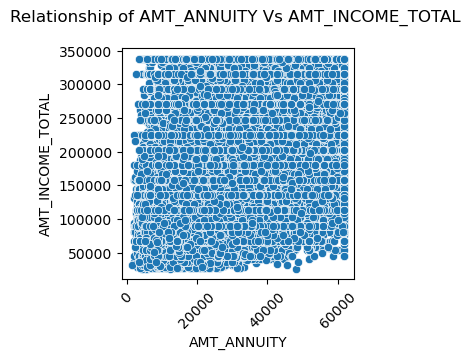

In [101]:
plt.figure(figsize=[3,3])
sns.scatterplot(application_data["AMT_ANNUITY"],application_data["AMT_INCOME_TOTAL"])
plt.xlabel("AMT_ANNUITY")
plt.ylabel("AMT_INCOME_TOTAL")
plt.title("Relationship of AMT_ANNUITY Vs AMT_INCOME_TOTAL \n")
plt.xticks(rotation=45)
plt.show()

### OBSERVATION:

It appears that the above two variables do not have any visible correlation.

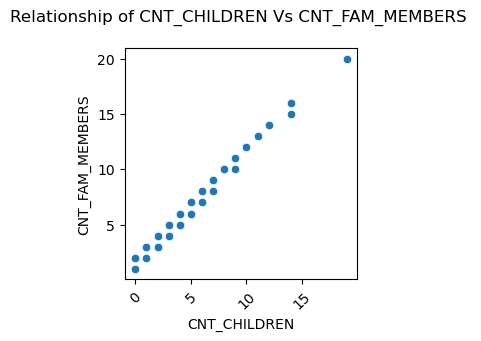

In [102]:
plt.figure(figsize=[3,3])
sns.scatterplot(application_data["CNT_CHILDREN"],application_data["CNT_FAM_MEMBERS"])
plt.xlabel("CNT_CHILDREN")
plt.ylabel("CNT_FAM_MEMBERS")
plt.title("Relationship of CNT_CHILDREN Vs CNT_FAM_MEMBERS \n")
plt.xticks(rotation=45)
plt.show()

### OBSERVATION:

It appears that the above two variables have positive correlation, as one variable increases the other increases too.

## MULTIVARIATE ANALYSIS

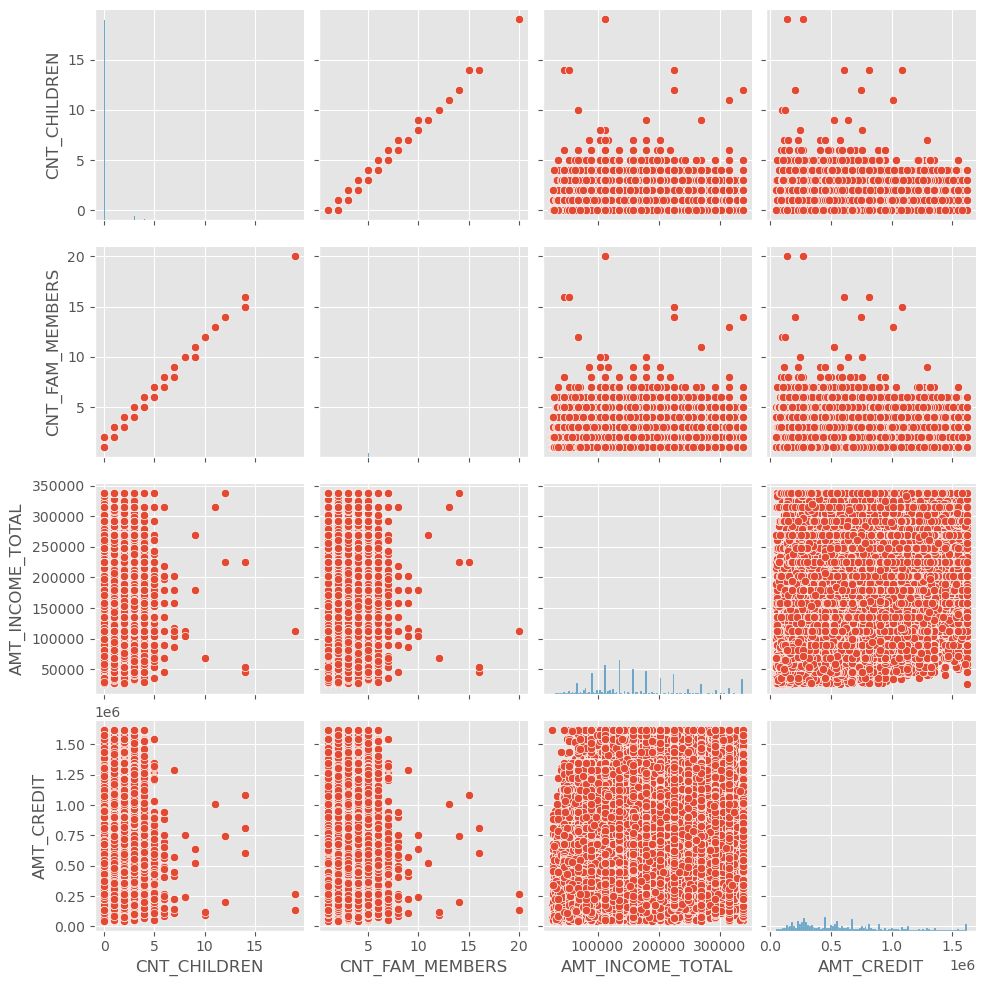

In [103]:
plt.style.use("ggplot")
sns.pairplot(application_data[['CNT_CHILDREN', 'CNT_FAM_MEMBERS','AMT_INCOME_TOTAL', 'AMT_CREDIT']])
plt.show()

In [104]:
plt.style.use("default")
TARGET_DEFAULTER_CORRELATION = TARGET_DEFAULTER[numerical_cols_1]
TARGET_DEFAULTER_CORRELATION.head(10)

CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0               0          202500.0    406597.5      24700.5         351000.0   
26              0          112500.0    979992.0      27076.5         702000.0   
40              0          202500.0   1193580.0      35028.0         855000.0   
42              0          135000.0    288873.0      16258.5         238500.0   
81              0           81000.0    252000.0      14593.5         252000.0   
94              0          315000.0    953460.0      61704.0         900000.0   
110             1          157500.0    723996.0      30802.5         585000.0   
138             0          292500.0    675000.0      36747.0         675000.0   
154             0          157500.0    245619.0      12667.5         166500.0   
163             0          111915.0    225000.0      21037.5         225000.0   

     REGION_POPULATION_RELATIVE  AGE_IN_YEARS  DAYS_EMPLOYED  \
0                      0.018801            26            637   
26                     0.018029            51           2628   
40                     0.025164            48           1262   
42                     0.007305            37           3597   
81                     0.028663            68         365243   
94                     0.030755            28           2015   
110                    0.007274            29            267   
138                    0.035792            46            200   
154                    0.022625            48           7676   
163                    0.018801            22            150   

     DAYS_REGISTRATION  DAYS_ID_PUBLISH  ...  DEF_30_CNT_SOCIAL_CIRCLE  \
0               3648.0             2120  ...                       2.0   
26              6573.0             1827  ...                       1.0   
40              1182.0             1029  ...                       0.0   
42                45.0             4409  ...                       0.0   
81              5391.0             4199  ...                       1.0   
94              4802.0             1038  ...                       0.0   
110              387.0             3190  ...                       0.0   
138             5239.0              114  ...                       0.0   
154              774.0             1082  ...                       0.0   
163             2570.0              646  ...                       0.0   

     OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  \
0                         2.0                       2.0   
26                       10.0                       0.0   
40                        0.0                       0.0   
42                        1.0                       0.0   
81                        1.0                       1.0   
94                        0.0                       0.0   
110                       0.0                       0.0   
138                       0.0                       0.0   
154                       0.0                       0.0   
163                       0.0                       0.0   

     DAYS_LAST_PHONE_CHANGE  AMT_REQ_CREDIT_BUREAU_HOUR  \
0                   -1134.0                         0.0   
26                   -161.0                         0.0   
40                  -1075.0                         0.0   
42                  -1480.0                         0.0   
81                      0.0                         0.0   
94                   -591.0                         0.0   
110                   -56.0                         0.0   
138                  -106.0                         0.0   
154                  -216.0                         0.0   
163                  -122.0                         0.0   

     AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
0                          0.0                         0.0   
26                         0.0                         0.0   
40                         0.0                         0.0   
42                         0.0               

In [105]:
TARGET_DEFAULTER_CORRELATION.corr()

CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
CNT_CHILDREN                    1.000000         -0.002545   -0.001046   
AMT_INCOME_TOTAL               -0.002545          1.000000    0.356199   
AMT_CREDIT                     -0.001046          0.356199    1.000000   
AMT_ANNUITY                     0.032047          0.436918    0.760123   
AMT_GOODS_PRICE                -0.007211          0.357696    0.981837   
REGION_POPULATION_RELATIVE     -0.031975          0.118155    0.070276   
AGE_IN_YEARS                   -0.258910         -0.002713    0.137770   
DAYS_EMPLOYED                  -0.192864         -0.125440    0.003344   
DAYS_REGISTRATION              -0.149154         -0.040130    0.027284   
DAYS_ID_PUBLISH                 0.032299          0.003970    0.052290   
CNT_FAM_MEMBERS                 0.885484          0.005361    0.052845   
EXT_SOURCE_2                   -0.012090          0.144566    0.119974   
EXT_SOURCE_3                   -0.023625         -0.086995    0.052783   
OBS_30_CNT_SOCIAL_CIRCLE        0.025909         -0.004652    0.021229   
DEF_30_CNT_SOCIAL_CIRCLE        0.001520         -0.023630   -0.025738   
OBS_60_CNT_SOCIAL_CIRCLE        0.025285         -0.004004    0.021627   
DEF_60_CNT_SOCIAL_CIRCLE       -0.005039         -0.024554   -0.030818   
DAYS_LAST_PHONE_CHANGE          0.011547         -0.086211   -0.113303   
AMT_REQ_CREDIT_BUREAU_HOUR      0.000316          0.012328   -0.003214   
AMT_REQ_CREDIT_BUREAU_DAY      -0.011255          0.004198    0.004825   
AMT_REQ_CREDIT_BUREAU_WEEK     -0.009316          0.019050    0.010457   
AMT_REQ_CREDIT_BUREAU_MON      -0.008852          0.075892    0.055351   
AMT_REQ_CREDIT_BUREAU_QRT      -0.013029          0.034445   -0.006577   
AMT_REQ_CREDIT_BUREAU_YEAR     -0.027253          0.084539   -0.017903   

                            AMT_ANNUITY  AMT_GOODS_PRICE  \
CNT_CHILDREN                   0.032047        -0.007211   
AMT_INCOME_TOTAL               0.436918         0.357696   
AMT_CREDIT                     0.760123         0.981837   
AMT_ANNUITY                    1.000000         0.760287   
AMT_GOODS_PRICE                0.760287         1.000000   
REGION_POPULATION_RELATIVE     0.071045         0.077871   
AGE_IN_YEARS                   0.013313         0.139076   
DAYS_EMPLOYED                 -0.084538         0.008154   
DAYS_REGISTRATION             -0.036474         0.027977   
DAYS_ID_PUBLISH                0.015483         0.056544   
CNT_FAM_MEMBERS                0.077476         0.049814   
EXT_SOURCE_2                   0.114987         0.130209   
EXT_SOURCE_3                   0.030047         0.054199   
OBS_30_CNT_SOCIAL_CIRCLE       0.006894         0.021325   
DEF_30_CNT_SOCIAL_CIRCLE      -0.021869        -0.022191   
OBS_60_CNT_SOCIAL_CIRCLE       0.008032         0.021832   
DEF_60_CNT_SOCIAL_CIRCLE      -0.027019        -0.026698   
DAYS_LAST_PHONE_CHANGE        -0.080913        -0.121937   
AMT_REQ_CREDIT_BUREAU_HOUR     0.012186        -0.001465   
AMT_REQ_CREDIT_BUREAU_DAY     -0.000768         0.005752   
AMT_REQ_CREDIT_BUREAU_WEEK     0.029573         0.010627   
AMT_REQ_CREDIT_BUREAU_MON      0.050126         0.058297   
AMT_REQ_CREDIT_BUREAU_QRT     -0.007099        -0.005290   
AMT_REQ_CREDIT_BUREAU_YEAR    -0.008637        -0.018813   

                            REGION_POPULATION_RELATIVE  AGE_IN_YEARS  \
CNT_CHILDREN                                 -0.031975     -0.258910   
AMT_INCOME_TOTAL                              0.118155     -0.002713   
AMT_CREDIT                                    0.070276      0.137770   
AMT_ANNUITY                                   0.071045      0.013313   
AMT_GOODS_PRICE                               0.077871      0.139076   
REGION_POPULATION_RELATIVE                    1.000000      0.048294   
AGE_IN_YEARS                                  0.048294      1.000000   
DAYS_EMPLOYED                                 0.015532      0.581769   
DAYS_REGISTRATION           

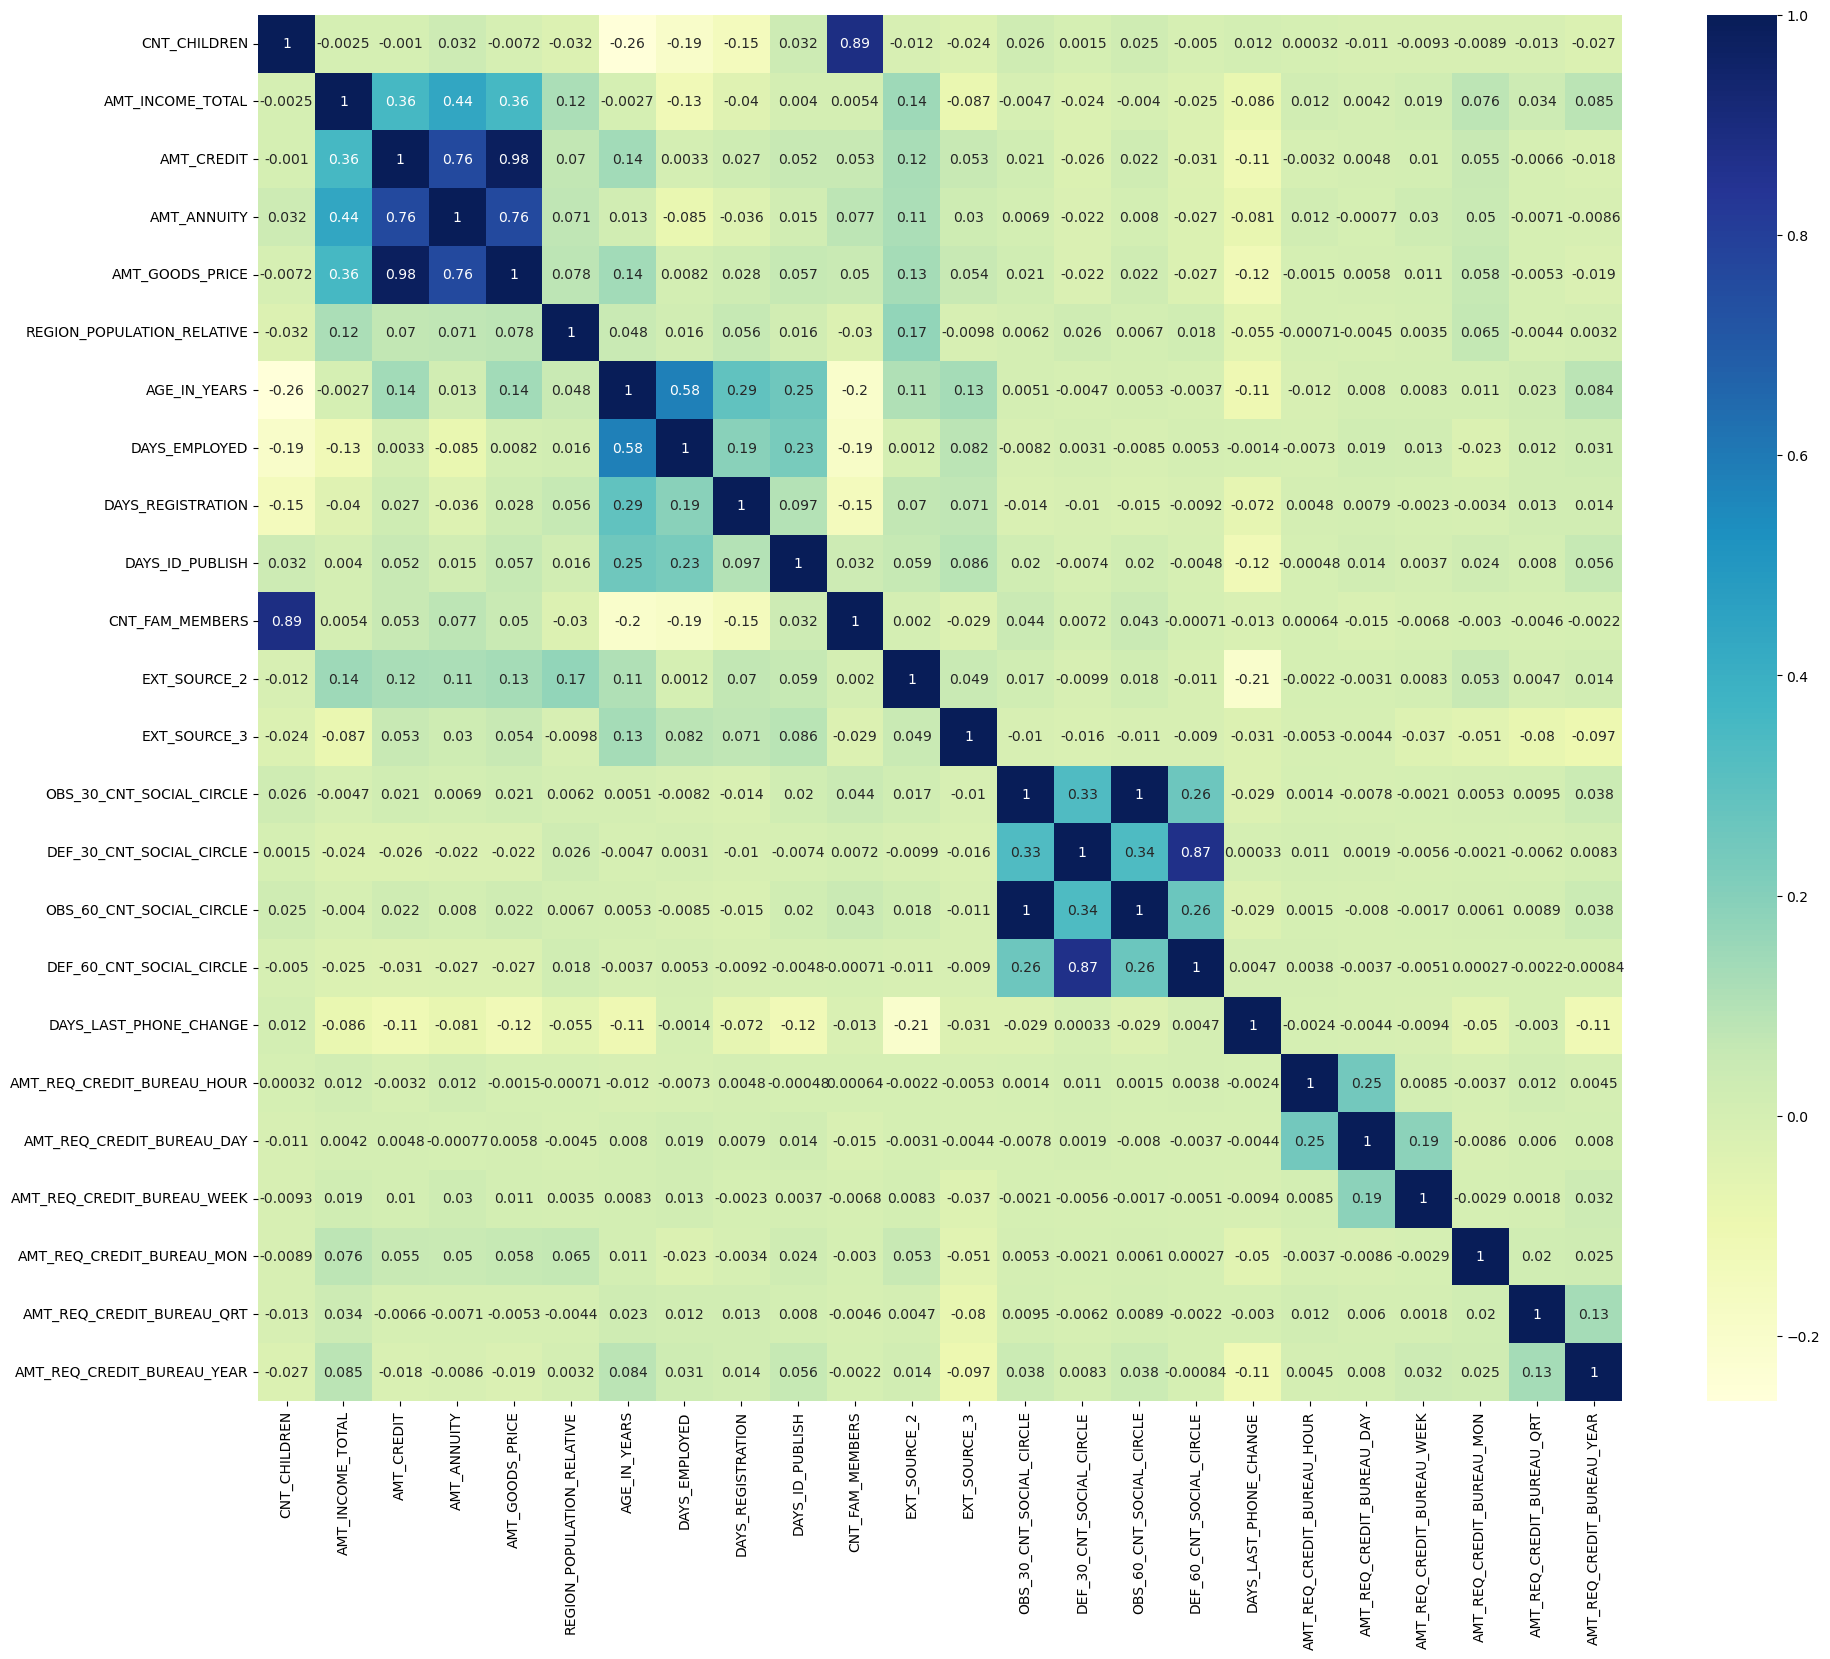

In [106]:
plt.figure(figsize= [22,18])
sns.heatmap(TARGET_DEFAULTER_CORRELATION.corr(), cmap="YlGnBu", annot=True)
plt.show()

#### OBSERVATION:

- The above graph shows a heatmap that depicts the correlation among the various variables present in this dataset with respect to defaulters. In simple words, the diagram indicates which variables tend to have a higher relationship when it comes to the loan defaulters.

The top 10 correlations as can be observed from the above heatmap are as follows:

1. Correlation between AMT_GOODS_PRICE and AMT_CREDIT : 0.98
2. Correlation between CNT_FAM_MEMBERS and CNT_CHILDREN : 0.89
3. Correlation between DEF_60_CNT_SOCIAL_CIRCLE and DEF_30_CNT_SOCIAL_CIRCLE : 0.87
4. Correlation between AMT_GOODS_PRICE and AMT_ANNUITY : 0.76
5. Correlation between AMT_CREDIT and AMT_ANNUITY : 0.76
6. Correlation between AGE_IN_YEARS and DAYS_EMPLOYED : 0.58
7. Correlation between AMT_INCOME_TOTAL and AMT_ANNUITY : 0.44
8. Correlation between AMT_INCOME_TOTAL and AMT_GOODS_PRICE : 0.36
9. Correlation between AMT_INCOME_TOTAL and AMT_CREDIT : 0.36
10. Correlation between DEF_30_CNT_SOCIAL_CIRCLE and OBS_60_CNT_SOCIAL_CIRCLE : 0.34


- The lowest correlation value -0.26 between the variables AGE_IN_YEARS and CNT_CHILDREN.

In [107]:
TARGET_NON_DEFAULTER_CORRELATION = TARGET_NON_DEFAULTER[numerical_cols_1]
TARGET_NON_DEFAULTER_CORRELATION.corr()

CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
CNT_CHILDREN                    1.000000          0.031759    0.003130   
AMT_INCOME_TOTAL                0.031759          1.000000    0.414309   
AMT_CREDIT                      0.003130          0.414309    1.000000   
AMT_ANNUITY                     0.022049          0.492921    0.794808   
AMT_GOODS_PRICE                -0.000496          0.417592    0.985582   
REGION_POPULATION_RELATIVE     -0.024363          0.190425    0.096309   
AGE_IN_YEARS                   -0.336847         -0.086253    0.049419   
DAYS_EMPLOYED                  -0.245174         -0.185389   -0.071044   
DAYS_REGISTRATION              -0.185792         -0.080047   -0.012365   
DAYS_ID_PUBLISH                 0.028751         -0.032013    0.001190   
CNT_FAM_MEMBERS                 0.878571          0.040494    0.066159   
EXT_SOURCE_2                   -0.015438          0.172153    0.128205   
EXT_SOURCE_3                   -0.037168         -0.078611    0.032666   
OBS_30_CNT_SOCIAL_CIRCLE        0.014532         -0.028596    0.000901   
DEF_30_CNT_SOCIAL_CIRCLE       -0.002193         -0.032136   -0.018906   
OBS_60_CNT_SOCIAL_CIRCLE        0.014199         -0.028418    0.000934   
DEF_60_CNT_SOCIAL_CIRCLE       -0.002125         -0.032560   -0.021451   
DAYS_LAST_PHONE_CHANGE         -0.008501         -0.061600   -0.074804   
AMT_REQ_CREDIT_BUREAU_HOUR      0.000147          0.004192   -0.002215   
AMT_REQ_CREDIT_BUREAU_DAY       0.001057          0.007105    0.004874   
AMT_REQ_CREDIT_BUREAU_WEEK     -0.000315          0.011853    0.001174   
AMT_REQ_CREDIT_BUREAU_MON      -0.007640          0.075720    0.055452   
AMT_REQ_CREDIT_BUREAU_QRT      -0.004218          0.027708    0.023338   
AMT_REQ_CREDIT_BUREAU_YEAR     -0.035861          0.061683   -0.033782   

                            AMT_ANNUITY  AMT_GOODS_PRICE  \
CNT_CHILDREN                   0.022049        -0.000496   
AMT_INCOME_TOTAL               0.492921         0.417592   
AMT_CREDIT                     0.794808         0.985582   
AMT_ANNUITY                    1.000000         0.797315   
AMT_GOODS_PRICE                0.797315         1.000000   
REGION_POPULATION_RELATIVE     0.117727         0.099137   
AGE_IN_YEARS                  -0.014658         0.047713   
DAYS_EMPLOYED                 -0.111188        -0.069833   
DAYS_REGISTRATION             -0.041188        -0.014129   
DAYS_ID_PUBLISH               -0.016554         0.003016   
CNT_FAM_MEMBERS                0.079968         0.064966   
EXT_SOURCE_2                   0.127622         0.134824   
EXT_SOURCE_3                   0.021125         0.034689   
OBS_30_CNT_SOCIAL_CIRCLE      -0.010420         0.001103   
DEF_30_CNT_SOCIAL_CIRCLE      -0.021324        -0.020040   
OBS_60_CNT_SOCIAL_CIRCLE      -0.010191         0.001105   
DEF_60_CNT_SOCIAL_CIRCLE      -0.022602        -0.022307   
DAYS_LAST_PHONE_CHANGE        -0.066665        -0.078237   
AMT_REQ_CREDIT_BUREAU_HOUR     0.003752        -0.001646   
AMT_REQ_CREDIT_BUREAU_DAY      0.002752         0.005030   
AMT_REQ_CREDIT_BUREAU_WEEK     0.013459         0.001218   
AMT_REQ_CREDIT_BUREAU_MON      0.038285         0.056992   
AMT_REQ_CREDIT_BUREAU_QRT      0.013115         0.024009   
AMT_REQ_CREDIT_BUREAU_YEAR    -0.005357        -0.034977   

                            REGION_POPULATION_RELATIVE  AGE_IN_YEARS  \
CNT_CHILDREN                                 -0.024363     -0.336847   
AMT_INCOME_TOTAL                              0.190425     -0.086253   
AMT_CREDIT                                    0.096309      0.049419   
AMT_ANNUITY                                   0.117727     -0.014658   
AMT_GOODS_PRICE                               0.099137      0.047713   
REGION_POPULATION_RELATIVE                    1.000000      0.025168   
AGE_IN_YEARS                                  0.025168      1.000000   
DAYS_EMPLOYED                                -0.007198      0.625826   
DAYS_REGISTRATION           

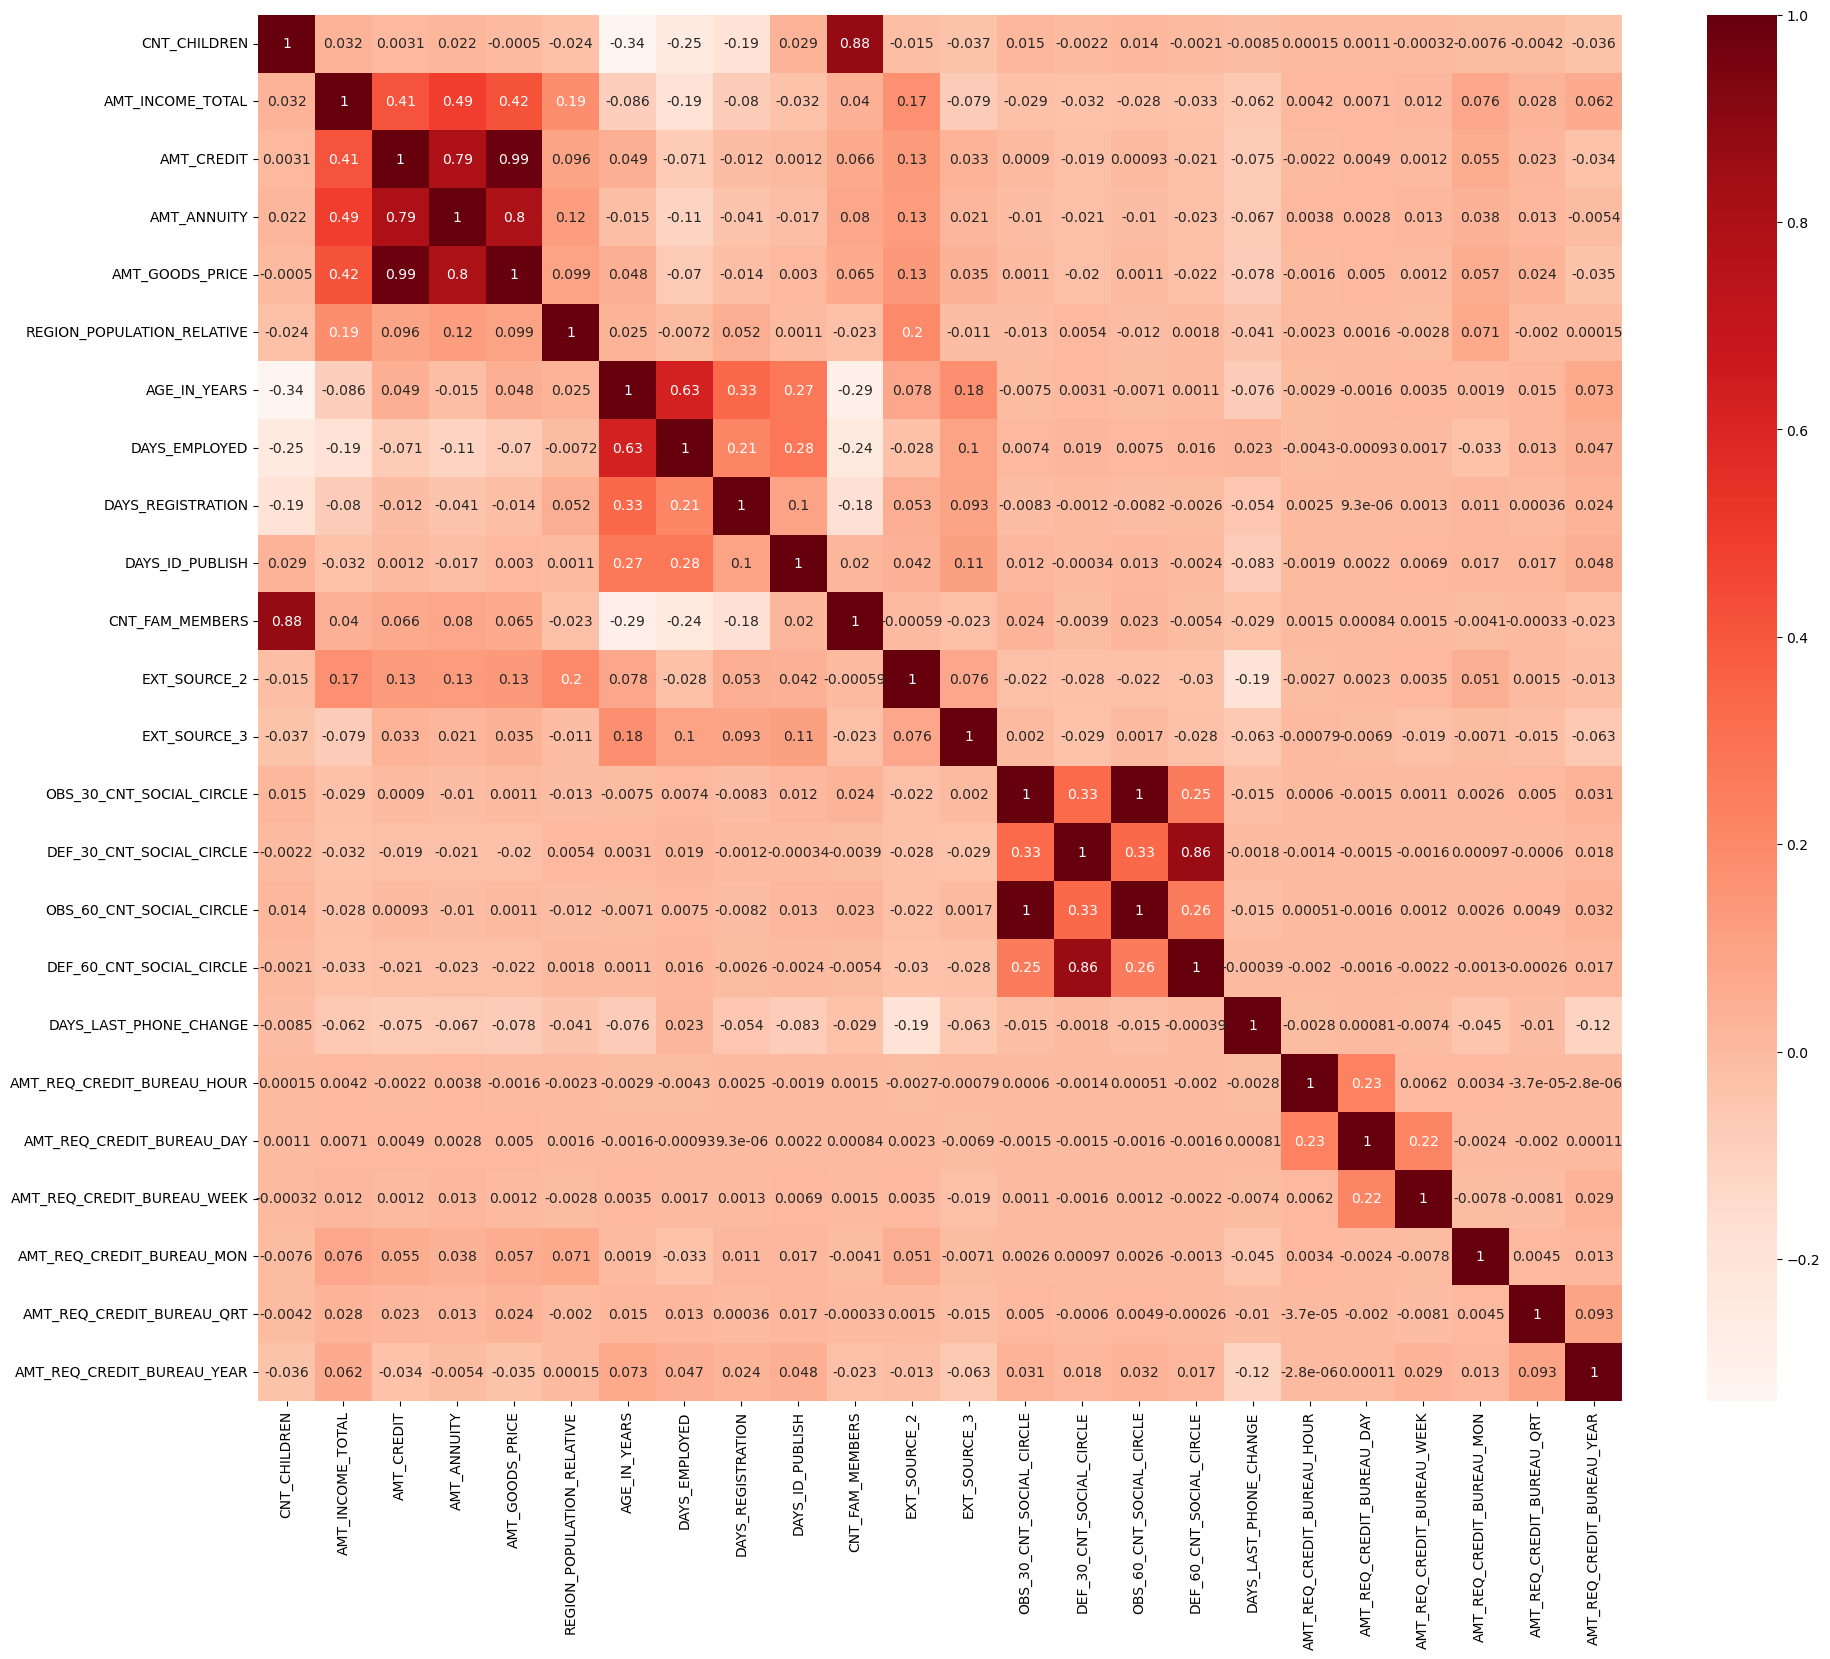

In [108]:
plt.figure(figsize= [22,18])
sns.heatmap(TARGET_NON_DEFAULTER_CORRELATION.corr(), cmap="Reds", annot=True)
plt.show()

#### OBSERVATION:

- The above graph shows a heatmap that depicts the correlation among the various variables present in this dataset with respect to Non-Defaulters. In simple words, the diagram indicates which variables tend to have a higher relationship when it comes to the loan non-defaulters.

The top 10 correlations as can be observed from the above heatmap are as follows:

1. Correlation between AMT_GOODS_PRICE and AMT_CREDIT : 0.99
2. Correlation between CNT_FAM_MEMBERS and CNT_CHILDREN : 0.88
3. Correlation between DEF_60_CNT_SOCIAL_CIRCLE and DEF_30_CNT_SOCIAL_CIRCLE : 0.86
4. Correlation between AMT_GOODS_PRICE and AMT_ANNUITY : 0.8
5. Correlation between AMT_CREDIT and AMT_ANNUITY : 0.79
6. Correlation between AGE_IN_YEARS and DAYS_EMPLOYED : 0.63
7. Correlation between AMT_INCOME_TOTAL and AMT_ANNUITY : 0.49
8. Correlation between AMT_INCOME_TOTAL and AMT_GOODS_PRICE : 0.42
9. Correlation between AMT_INCOME_TOTAL and AMT_CREDIT : 0.41
10. Correlation between DEF_30_CNT_SOCIAL_CIRCLE and OBS_60_CNT_SOCIAL_CIRCLE : 0.33


- The lowest correlation value -0.34 between the variables AGE_IN_YEARS and CNT_CHILDREN.

# PREVIOUS_APPLICATION DATASET ANALYSIS

In [109]:
# Now we import the second dataset.

previous_application = pd.read_csv("previous_application.csv")
previous_application.head(10)

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   
5     1383531      199383         Cash loans    23703.930         315000.0   
6     2315218      175704         Cash loans          NaN              0.0   
7     1656711      296299         Cash loans          NaN              0.0   
8     2367563      342292         Cash loans          NaN              0.0   
9     2579447      334349         Cash loans          NaN              0.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   
5    340573.5               NaN         315000.0                   SATURDAY   
6         0.0               NaN              NaN                    TUESDAY   
7         0.0               NaN              NaN                     MONDAY   
8         0.0               NaN              NaN                     MONDAY   
9         0.0               NaN              NaN                   SATURDAY   

   HOUR_APPR_PROCESS_START  ... NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
0                       15  ...         Connectivity         12.0   
1                       11  ...                  XNA         36.0   
2                       11  ...                  XNA         12.0   
3                        7  ...                  XNA         12.0   
4                        9  ...                  XNA         24.0   
5                        8  ...                  XNA         18.0   
6                       11  ...                  XNA          NaN   
7                        7  ...                  XNA          NaN   
8                       15  ...                  XNA          NaN   
9                       15  ...                  XNA          NaN   

   NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0            middle  POS mobile with interest            365243.0   
1        low_action          Cash X-Sell: low            365243.0   
2              high         Cash X-Sell: high            365243.0   
3            middle       Cash X-Sell: middle            365243.0   
4              high         Cash Street: high                 NaN   
5        low_normal          Cash X-Sell: low            365243.0   
6               XNA                      Cash                 NaN   
7               XNA                      Cash                 NaN   
8               XNA                      Cash                 NaN   
9               XNA                      Cash                 NaN   

  DAYS_FIRST_DUE DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE DAYS_TERMINATION  \
0          -42.0                     300.0          -42.0            -37.0   
1         -134.0                     916.0       365243.0         365243.0   
2         -271.0                      59.0       365243.0         365243.0   
3         -482.0                    -152.0         -182.0           -177.0   
4            NaN                       NaN            NaN              NaN   
5         -654.0                    -144.0         -144.0           -137.0   
6            NaN                       NaN            NaN              NaN   
7            NaN                       NaN            NaN              NaN   
8            NaN                       NaN          

In [110]:
#Now we analyse the shape of the second dataset.

previous_application.shape

(1670214, 37)

The second dataset named "previous_application" has the following shape:

- 1670214 rows
- 37 columns

In [111]:
# Analysing the datatypes of the dataset.

previous_application.dtypes.value_counts()

object     16
float64    15
int64       6
dtype: int64

As it can be observed from the above analysis that the dataset has columns of the following datatypes:

- float64 : 15
- int64 : 6
- object : 16

In [112]:
#Applying the "describe" function enables us to get a brief overview of the entire dataset.

previous_application.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.670214e+06  1.670214e+06  1.297979e+06     1.670214e+06   
mean   1.923089e+06  2.783572e+05  1.595512e+04     1.752339e+05   
std    5.325980e+05  1.028148e+05  1.478214e+04     2.927798e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.461857e+06  1.893290e+05  6.321780e+03     1.872000e+04   
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04   
75%    2.384280e+06  3.675140e+05  2.065842e+04     1.803600e+05   
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06   

         AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
count  1.670213e+06      7.743700e+05     1.284699e+06   
mean   1.961140e+05      6.697402e+03     2.278473e+05   
std    3.185746e+05      2.092150e+04     3.153966e+05   
min    0.000000e+00     -9.000000e-01     0.000000e+00   
25%    2.416050e+04      0.000000e+00     5.084100e+04   
50%    8.054100e+04      1.638000e+03     1.123200e+05   
75%    2.164185e+05      7.740000e+03     2.340000e+05   
max    6.905160e+06      3.060045e+06     6.905160e+06   

       HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  \
count             1.670214e+06            1.670214e+06      774370.000000   
mean              1.248418e+01            9.964675e-01           0.079637   
std               3.334028e+00            5.932963e-02           0.107823   
min               0.000000e+00            0.000000e+00          -0.000015   
25%               1.000000e+01            1.000000e+00           0.000000   
50%               1.200000e+01            1.000000e+00           0.051605   
75%               1.500000e+01            1.000000e+00           0.108909   
max               2.300000e+01            1.000000e+00           1.000000   

       ...  RATE_INTEREST_PRIVILEGED  DAYS_DECISION  SELLERPLACE_AREA  \
count  ...               5951.000000   1.670214e+06      1.670214e+06   
mean   ...                  0.773503  -8.806797e+02      3.139511e+02   
std    ...                  0.100879   7.790997e+02      7.127443e+03   
min    ...                  0.373150  -2.922000e+03     -1.000000e+00   
25%    ...                  0.715645  -1.300000e+03     -1.000000e+00   
50%    ...                  0.835095  -5.810000e+02      3.000000e+00   
75%    ...                  0.852537  -2.800000e+02      8.200000e+01   
max    ...                  1.000000  -1.000000e+00      4.000000e+06   

        CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
count  1.297984e+06       997149.000000   997149.000000   
mean   1.605408e+01       342209.855039    13826.269337   
std    1.456729e+01        88916.115834    72444.869708   
min    0.000000e+00        -2922.000000    -2892.000000   
25%    6.000000e+00       365243.000000    -1628.000000   
50%    1.200000e+01       365243.000000     -831.000000   
75%    2.400000e+01       365243.000000     -411.000000   
max    8.400000e+01       365243.000000   365243.000000   

       DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
count              997149.000000  997149.000000     997149.000000   
mean                33767.774054   76582.403064      81992.343838   
std                106857.034789  149647.415123     153303.516729   
min                 -2801.000000   -2889.000000      -2874.000000   
25%                 -1242.000000   -1314.000000      -1270.000000   
50%                  -361.000000    -537.000000       -499.000000   
75%                   129.000000     -74.000000        -44.000000   
max                365243.000000  365243.000000     365243.000000   

       NFLAG_INSURED_ON_APPROVAL  
count              997149.000000  
mean                    0.332570  
std                     0.471134  
min                     0.000000  
25%                     0.000000  
50%                     0.000000  
75%                     1.000000  
max                     1.000000  

[8 rows x 21 columns]

## MISSING VALUE ANALYSIS

- Here, we analyse the missing values in the dataset "application_data". The columns that have missing values greater than 40% are dropped. The remaining columns with lessser percentage of missing values are dealt by imputing the null values according to the nature of the variable and column.
- First, we calculate the percentage of missing values in each column.
- Secondly, we drop the columns with missing values greater than or equal to 40%.

In [113]:
# The code below helps us understand the number os unique values contained in each column.

previous_application.nunique()

SK_ID_PREV                     1670214
SK_ID_CURR                      338857
NAME_CONTRACT_TYPE                   4
AMT_ANNUITY                     357959
AMT_APPLICATION                  93885
AMT_CREDIT                       86803
AMT_DOWN_PAYMENT                 29278
AMT_GOODS_PRICE                  93885
WEEKDAY_APPR_PROCESS_START           7
HOUR_APPR_PROCESS_START             24
FLAG_LAST_APPL_PER_CONTRACT          2
NFLAG_LAST_APPL_IN_DAY               2
RATE_DOWN_PAYMENT               207033
RATE_INTEREST_PRIMARY              148
RATE_INTEREST_PRIVILEGED            25
NAME_CASH_LOAN_PURPOSE              25
NAME_CONTRACT_STATUS                 4
DAYS_DECISION                     2922
NAME_PAYMENT_TYPE                    4
CODE_REJECT_REASON                   9
NAME_TYPE_SUITE                      7
NAME_CLIENT_TYPE                     4
NAME_GOODS_CATEGORY                 28
NAME_PORTFOLIO                       5
NAME_PRODUCT_TYPE                    3
CHANNEL_TYPE             

In [114]:
# Percentage of missing values in each column.

null_values_1 = previous_application.isnull().mean()*100
null_values_1.sort_values(ascending = False).head(20)

RATE_INTEREST_PRIVILEGED     99.643698
RATE_INTEREST_PRIMARY        99.643698
AMT_DOWN_PAYMENT             53.636480
RATE_DOWN_PAYMENT            53.636480
NAME_TYPE_SUITE              49.119754
NFLAG_INSURED_ON_APPROVAL    40.298129
DAYS_TERMINATION             40.298129
DAYS_LAST_DUE                40.298129
DAYS_LAST_DUE_1ST_VERSION    40.298129
DAYS_FIRST_DUE               40.298129
DAYS_FIRST_DRAWING           40.298129
AMT_GOODS_PRICE              23.081773
AMT_ANNUITY                  22.286665
CNT_PAYMENT                  22.286366
PRODUCT_COMBINATION           0.020716
AMT_CREDIT                    0.000060
NAME_YIELD_GROUP              0.000000
NAME_PORTFOLIO                0.000000
NAME_SELLER_INDUSTRY          0.000000
SELLERPLACE_AREA              0.000000
dtype: float64

In [115]:
# We create a list with all the columns with missing values greater than or equal to 40%.

drop_columns_2 = null_values_1[null_values_1.values >=40.00].index.tolist()

In [116]:
# Number of columns with missing values greater than or equal to 40%.

len(drop_columns_2)

11

In [117]:
# We drop columns with missing values greater than or equal to 40%.

previous_application.drop(drop_columns_2, axis =1, inplace = True)

In [118]:
# The shape of the dataset after dropping the high missing value columns.

previous_application.shape

(1670214, 26)

After dropping the columns with huge amount of missing values that shape of the dataset is as follows:

- 1670214 rows
- 26 columns

In [119]:
# The code below gives us an idea about the rest of the columns in the dataset.

previous_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 26 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_GOODS_PRICE              1284699 non-null  float64
 7   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 8   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 9   FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 10  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 11  NAME_CASH_LOAN_PURPOSE       1670214 non-null  object 
 12  NAME_CONTRACT_STATUS         1670214 non-n

### CATEGORISATION OF VARIABLES

Before, we deal with rest of the missing values, let us categorise the variables and then conduct the further analysis based on the datatypes.

We categorise the variables in the following types:

- Categorical columns : Based on the columns that are flag columns and columns with "object" datatype.
- Numerical columns : Includes columns that have "int64" and "float64" datatype.

In [120]:
# This gives information about the columns of the dataset.

previous_application.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION'],
      dtype='object')

In [121]:
previous_application.select_dtypes(include = "object")

NAME_CONTRACT_TYPE WEEKDAY_APPR_PROCESS_START  \
0           Consumer loans                   SATURDAY   
1               Cash loans                   THURSDAY   
2               Cash loans                    TUESDAY   
3               Cash loans                     MONDAY   
4               Cash loans                   THURSDAY   
...                    ...                        ...   
1670209     Consumer loans                  WEDNESDAY   
1670210     Consumer loans                    TUESDAY   
1670211     Consumer loans                     MONDAY   
1670212         Cash loans                  WEDNESDAY   
1670213         Cash loans                     SUNDAY   

        FLAG_LAST_APPL_PER_CONTRACT NAME_CASH_LOAN_PURPOSE  \
0                                 Y                    XAP   
1                                 Y                    XNA   
2                                 Y                    XNA   
3                                 Y                    XNA   
4                                 Y                Repairs   
...                             ...                    ...   
1670209                           Y                    XAP   
1670210                           Y                    XAP   
1670211                           Y                    XAP   
1670212                           Y                    XNA   
1670213                           Y                    XNA   

        NAME_CONTRACT_STATUS      NAME_PAYMENT_TYPE CODE_REJECT_REASON  \
0                   Approved  Cash through the bank                XAP   
1                   Approved                    XNA                XAP   
2                   Approved  Cash through the bank                XAP   
3                   Approved  Cash through the bank                XAP   
4                    Refused  Cash through the bank                 HC   
...                      ...                    ...                ...   
1670209             Approved  Cash through the bank                XAP   
1670210             Approved  Cash through the bank                XAP   
1670211             Approved  Cash through the bank                XAP   
1670212             Approved  Cash through the bank                XAP   
1670213             Approved  Cash through the bank                XAP   

        NAME_CLIENT_TYPE   NAME_GOODS_CATEGORY NAME_PORTFOLIO  \
0               Repeater                Mobile            POS   
1               Repeater                   XNA           Cash   
2               Repeater                   XNA           Cash   
3               Repeater                   XNA           Cash   
4               Repeater                   XNA           Cash   
...                  ...                   ...            ...   
1670209        Refreshed             Furniture            POS   
1670210              New             Furniture            POS   
1670211         Repeater  Consumer Electronics            POS   
1670212         Repeater                   XNA           Cash   
1670213         Repeater                   XNA           Cash   

        NAME_PRODUCT_TYPE             CHANNEL_TYPE  NAME_SELLER_INDUSTRY  \
0                     XNA             Country-wide          Connectivity   
1                  x-sell           Contact center                   XNA   
2                  x-sell  Credit and cash offices                   XNA   
3                  x-sell  Credit and cash offices                   XNA   
4                 walk-in  Credit and cash offices                   XNA   
...                   ...                      ...                   ...   
1670209               XNA                    Stone             Furniture   
1670210               XNA                    Stone             Furniture   
1670211               XNA             Country-wide  Consumer electronics   
1670212            x-sell          AP+ (Cash loan)                   XNA   
1670213            x-sell          AP+ (Cash loan)                   XNA

In [122]:
previous_application.select_dtypes(include = "int").nunique()

SK_ID_PREV                 1670214
SK_ID_CURR                  338857
HOUR_APPR_PROCESS_START         24
NFLAG_LAST_APPL_IN_DAY           2
DAYS_DECISION                 2922
SELLERPLACE_AREA              2097
dtype: int64

In [123]:
# The categorical columns in this dataset are as follows:

cat_cols_2 = ["NAME_CONTRACT_TYPE", "WEEKDAY_APPR_PROCESS_START", "FLAG_LAST_APPL_PER_CONTRACT", "NAME_CASH_LOAN_PURPOSE", "NAME_CONTRACT_STATUS", "NAME_PAYMENT_TYPE", "CODE_REJECT_REASON", "NAME_CLIENT_TYPE", "NFLAG_LAST_APPL_IN_DAY", "NAME_GOODS_CATEGORY", "NAME_PORTFOLIO", "HOUR_APPR_PROCESS_START", "NAME_PRODUCT_TYPE", "CHANNEL_TYPE", "NAME_SELLER_INDUSTRY", "NAME_YIELD_GROUP","PRODUCT_COMBINATION"]

In [124]:
# The following code will help us get insight on the categorical columns.

for c in cat_cols_2:
    print(previous_application[c].value_counts())
    print("-"*60)
    print(previous_application[c].value_counts(normalize= True))
    print("*"*60)
    print("Null Values: ", previous_application[c].isnull().sum())
    print(previous_application[c].mode()[0])
    print("="*60)

Cash loans         747553
Consumer loans     729151
Revolving loans    193164
XNA                   346
Name: NAME_CONTRACT_TYPE, dtype: int64
------------------------------------------------------------
Cash loans         0.447579
Consumer loans     0.436561
Revolving loans    0.115652
XNA                0.000207
Name: NAME_CONTRACT_TYPE, dtype: float64
************************************************************
Null Values:  0
Cash loans
TUESDAY      255118
WEDNESDAY    255010
MONDAY       253557
FRIDAY       252048
THURSDAY     249099
SATURDAY     240631
SUNDAY       164751
Name: WEEKDAY_APPR_PROCESS_START, dtype: int64
------------------------------------------------------------
TUESDAY      0.152746
WEDNESDAY    0.152681
MONDAY       0.151811
FRIDAY       0.150908
THURSDAY     0.149142
SATURDAY     0.144072
SUNDAY       0.098641
Name: WEEKDAY_APPR_PROCESS_START, dtype: float64
************************************************************
Null Values:  0
TUESDAY
Y    1661739
N     

In [125]:
previous_application.select_dtypes(include = ["int64","float64"]).columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'AMT_ANNUITY', 'AMT_APPLICATION',
       'AMT_CREDIT', 'AMT_GOODS_PRICE', 'HOUR_APPR_PROCESS_START',
       'NFLAG_LAST_APPL_IN_DAY', 'DAYS_DECISION', 'SELLERPLACE_AREA',
       'CNT_PAYMENT'],
      dtype='object')

In [126]:
# The following lists consist of the numerical and id columns from this dataset.

numerical_cols_2 = ['AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'DAYS_DECISION', 'SELLERPLACE_AREA','CNT_PAYMENT']
id_cols_2 = ['SK_ID_PREV', 'SK_ID_CURR']

In [127]:
# The following code will help us get insight on the numerical columns.
for i in numerical_cols_2:
    print("Null Values: ", previous_application[i].isnull().sum())
    print(previous_application[i].skew())
    print("="*60)

Null Values:  372235
2.6925715126729455
Null Values:  0
3.391442176069141
Null Values:  1
3.2458146495467357
Null Values:  385515
3.0736896781923937
Null Values:  0
-1.0530796747910551
Null Values:  0
529.6202788095459
Null Values:  372230
1.5314029823509057


In [128]:
# Now, in order to check whether the segmentation of columns have included all the columns of the dataset that we obtained after dropping the high missing value columns, we check the following:

len(cat_cols_2) + len(numerical_cols_2) + len(id_cols_2)

26

### TREATMENT OF NULL VALUES IN THE CATEGORICAL COLUMNS

Now, as we have checked the rest of the columns for missing values, we will fill the null values as follows:

- In case of categorical columns we fill the missing values with the mode of the column.

In [129]:
# Now to check if null values are present in the categorical columns.

for c in cat_cols_2:
    a = previous_application[c].isnull().sum()
    print(c + " : " , a)

NAME_CONTRACT_TYPE :  0
WEEKDAY_APPR_PROCESS_START :  0
FLAG_LAST_APPL_PER_CONTRACT :  0
NAME_CASH_LOAN_PURPOSE :  0
NAME_CONTRACT_STATUS :  0
NAME_PAYMENT_TYPE :  0
CODE_REJECT_REASON :  0
NAME_CLIENT_TYPE :  0
NFLAG_LAST_APPL_IN_DAY :  0
NAME_GOODS_CATEGORY :  0
NAME_PORTFOLIO :  0
HOUR_APPR_PROCESS_START :  0
NAME_PRODUCT_TYPE :  0
CHANNEL_TYPE :  0
NAME_SELLER_INDUSTRY :  0
NAME_YIELD_GROUP :  0
PRODUCT_COMBINATION :  346


In [130]:
# We will use the mode of the variable to fill the null values in these columns.

previous_application["PRODUCT_COMBINATION"].fillna(previous_application["PRODUCT_COMBINATION"].mode()[0], inplace = True)

In [131]:
# Lets check if anymore null values are present after using the previous code in the these columns.

for c in cat_cols_2:
    a = previous_application[c].isnull().sum()
    print(c + " : " , a)

NAME_CONTRACT_TYPE :  0
WEEKDAY_APPR_PROCESS_START :  0
FLAG_LAST_APPL_PER_CONTRACT :  0
NAME_CASH_LOAN_PURPOSE :  0
NAME_CONTRACT_STATUS :  0
NAME_PAYMENT_TYPE :  0
CODE_REJECT_REASON :  0
NAME_CLIENT_TYPE :  0
NFLAG_LAST_APPL_IN_DAY :  0
NAME_GOODS_CATEGORY :  0
NAME_PORTFOLIO :  0
HOUR_APPR_PROCESS_START :  0
NAME_PRODUCT_TYPE :  0
CHANNEL_TYPE :  0
NAME_SELLER_INDUSTRY :  0
NAME_YIELD_GROUP :  0
PRODUCT_COMBINATION :  0


#### TREATMENT OF NULL VALUES IN THE NUMERICAL COLUMNS

- If the data is normally distributed we fill the missing values with mean of the values.
- If the data is not normally distributed we fill the missing values with median of the values.
- We will be using the concept of skewness of distribution for the treatment of missing values here.
   1. A skewness value which is greater than 1 or less than -1 indicates a highly skewed distribution. 
   2. A value between o.5 and 1 or -0.5 and -1 shows that the distribution is moderately skewed.
   3. A value between -0.5 and 0.5 shows a fairly symmetrical distribution. 

In [132]:
for i in numerical_cols_2:
    a = previous_application[i].isnull().sum()
    print(i + " : " , a)

AMT_ANNUITY :  372235
AMT_APPLICATION :  0
AMT_CREDIT :  1
AMT_GOODS_PRICE :  385515
DAYS_DECISION :  0
SELLERPLACE_AREA :  0
CNT_PAYMENT :  372230


In [133]:
# Lets check the nature of distribution for one of the columns to understand the process.

previous_application["CNT_PAYMENT"].describe()

count    1.297984e+06
mean     1.605408e+01
std      1.456729e+01
min      0.000000e+00
25%      6.000000e+00
50%      1.200000e+01
75%      2.400000e+01
max      8.400000e+01
Name: CNT_PAYMENT, dtype: float64

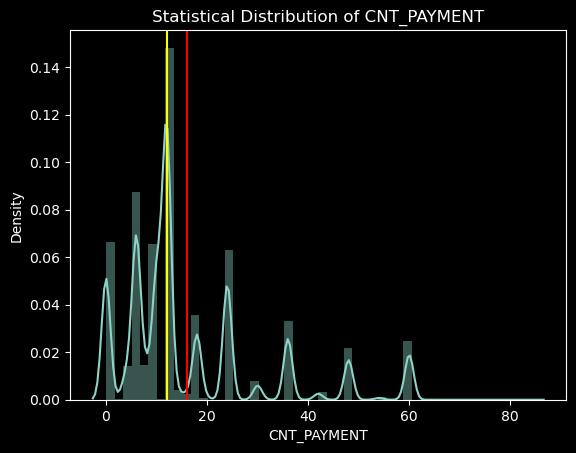

In [134]:
# We use a frequency distribution plot to understand the distribution of the data, it can be seen that the data is positively skewed.

plt.style.use("dark_background")
sns.distplot(previous_application["CNT_PAYMENT"])
plt.title("Statistical Distribution of CNT_PAYMENT")
plt.axvline(previous_application["CNT_PAYMENT"].mean(), color = "red")
plt.axvline(previous_application["CNT_PAYMENT"].median(), color = "yellow")
plt.show()

In [135]:
previous_application["CNT_PAYMENT"].skew()

1.5314029823509057

In [136]:
# Since the data is positively skewed we fill the null values using "median" of the column.

previous_application["CNT_PAYMENT"].fillna(previous_application["CNT_PAYMENT"].median(), inplace = True)

In [137]:
# Lets check if anymore null values are present after using the previous code in the these columns. 

previous_application["CNT_PAYMENT"].isnull().sum()

0

In [138]:
# Now let us fill the null values in each column using a for loop.

for i in numerical_cols_2:
    a = previous_application[i].isnull().sum()
    b = previous_application[i].skew()
    if a > 0:
        if -0.5 < b < 0.5:
            previous_application[i].fillna(previous_application[i].mean(), inplace= True)
        else:
            previous_application[i].fillna(previous_application[i].median(), inplace= True)            

In [139]:
# Lets check if anymore null values are present after using the previous code in the these columns.

for i in numerical_cols_2:
    a = previous_application[i].isnull().sum()
    print(i + " : " , a)

AMT_ANNUITY :  0
AMT_APPLICATION :  0
AMT_CREDIT :  0
AMT_GOODS_PRICE :  0
DAYS_DECISION :  0
SELLERPLACE_AREA :  0
CNT_PAYMENT :  0


### HANDLING OUTLIERS

The common approaches that are used to treat outliers in a dataset are as follows:

- Imputation of values
- Deletion of the outliers
- Binning of values
- Capping the outliers

In this dataset, in order to identify if the dataset has outliers we will be using boxplots.


Here, the following variables have been analysed using boxplots and subsequently, as it can be seen in the figures, there is pressence of outliers in all the four columns. Thus, the following approach has been adopted to treat the outliers:

- The 1st and 3rd Quartiles are calculated at 25% and 75% of the distribution respectively.
- Then, we calculate the Inter Quartile Range (IQR) by subtracting Q3 from Q1.
- Further, as we use the upper bound (Q3 + 1.5 * IQR) to remove the outliers from the dataset, since in all the columns upper bound outliers are detected.

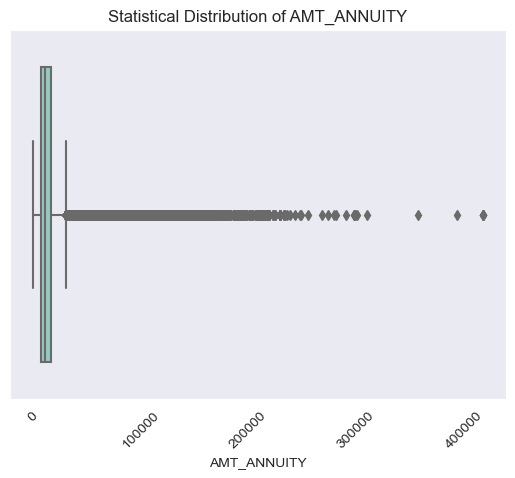

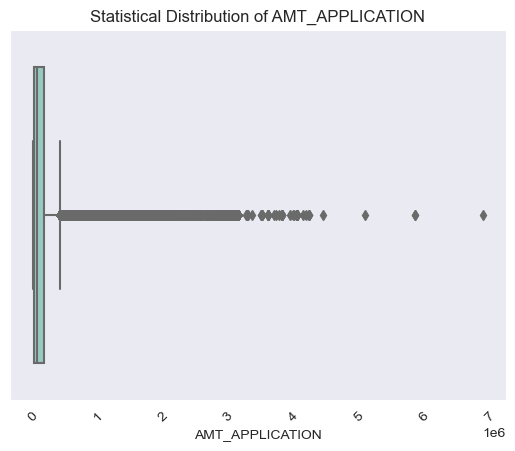

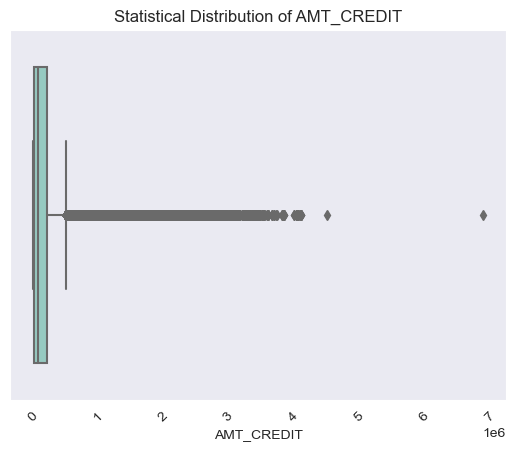

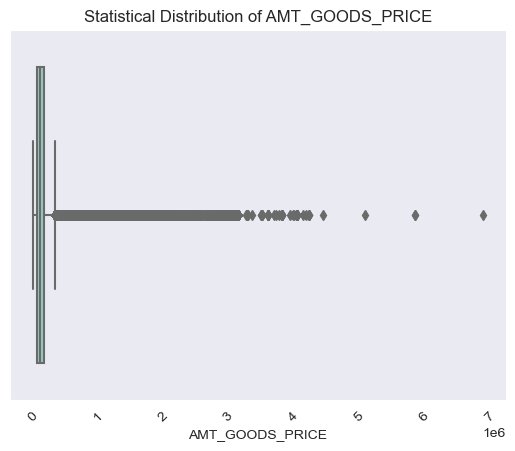

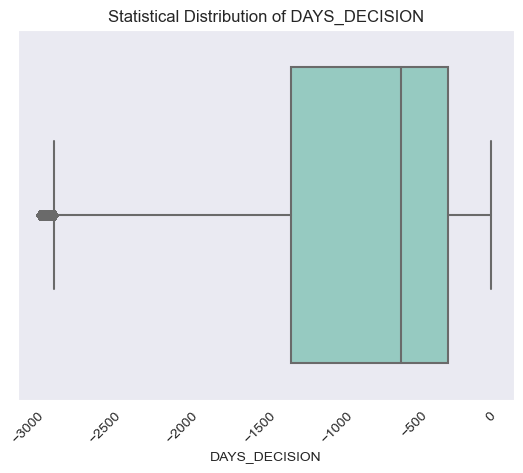

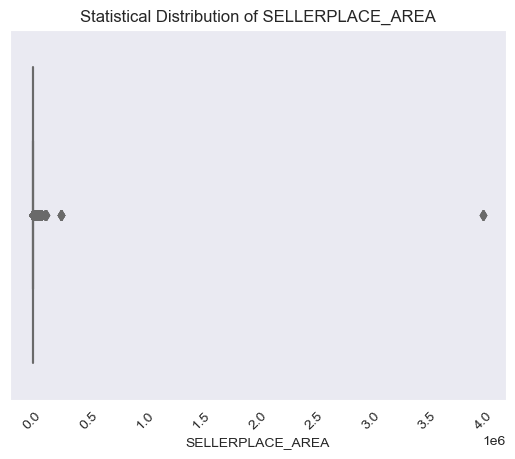

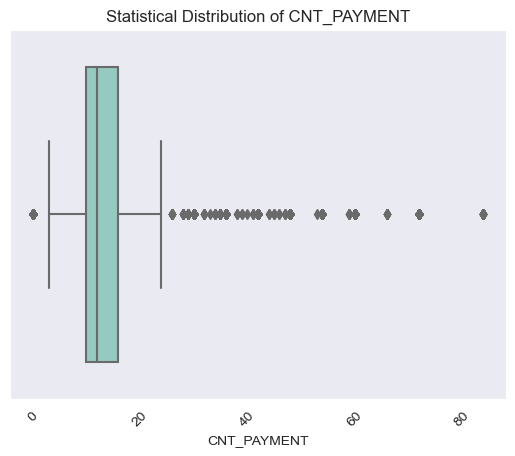

In [140]:
sns.set_style("dark")
for i in numerical_cols_2:
    sns.boxplot(previous_application[i])
    plt.xlabel(i)
    plt.title("Statistical Distribution of "+i)
    plt.xticks(rotation=45)
    plt.show()

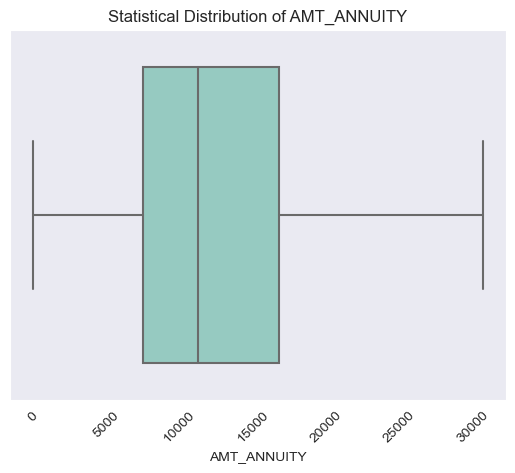

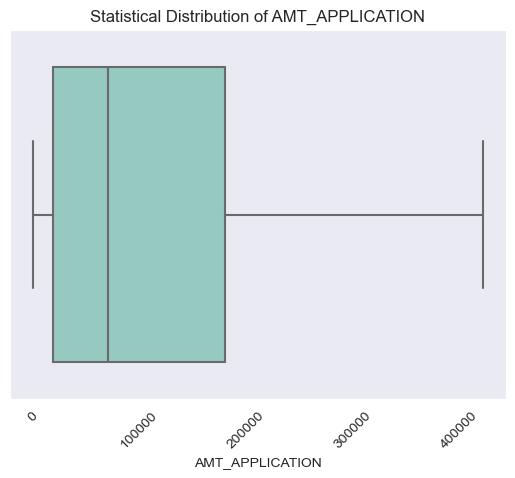

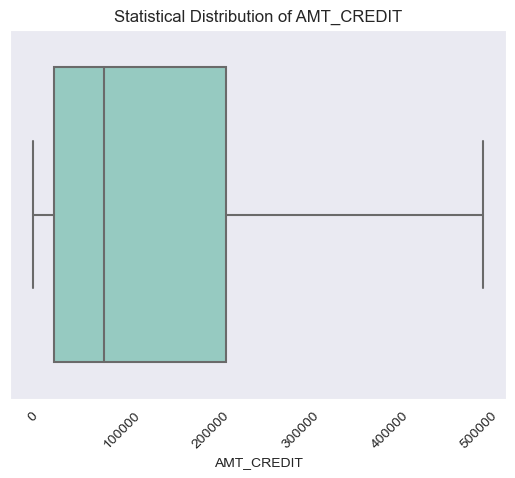

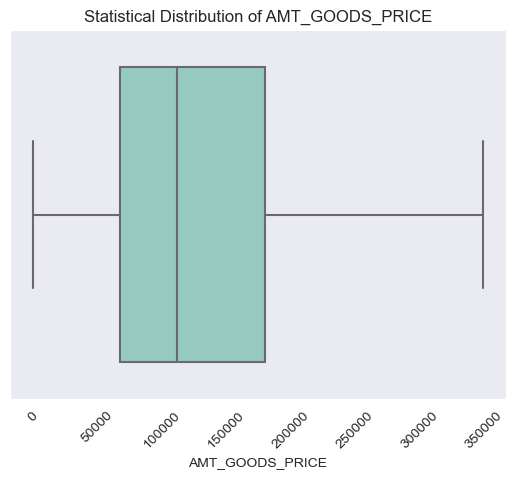

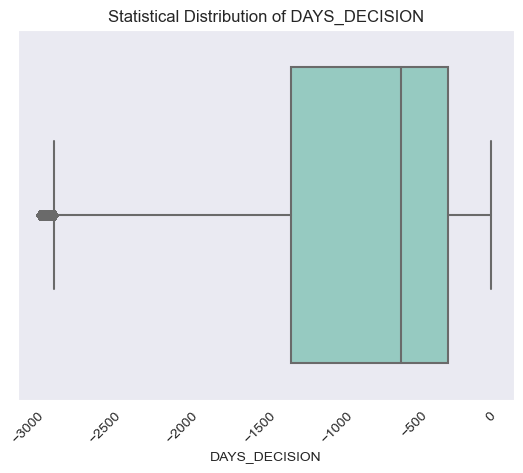

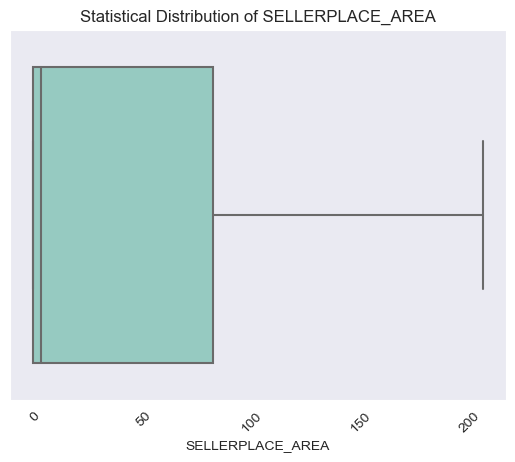

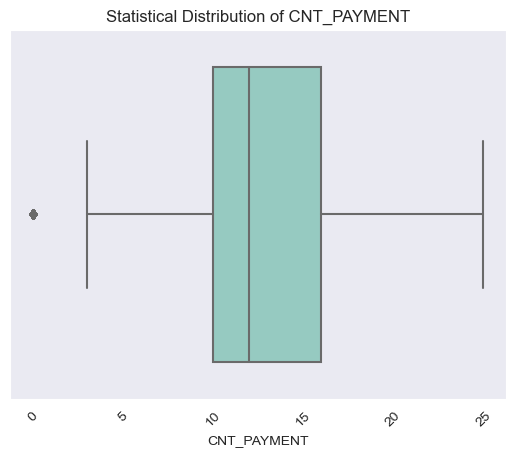

In [141]:
sns.set_style("dark")
for i in numerical_cols_2:
    Q1 = previous_application[i].quantile(0.25)
    Q3 = previous_application[i].quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5 * IQR
    previous_application[i]=np.where(previous_application[i]>upper_bound, upper_bound, previous_application[i])
    sns.boxplot(previous_application[i])
    plt.xlabel(i)
    plt.title("Statistical Distribution of "+i)
    plt.xticks(rotation=45)
    plt.show()

## UNIVARIATE ANALYSIS


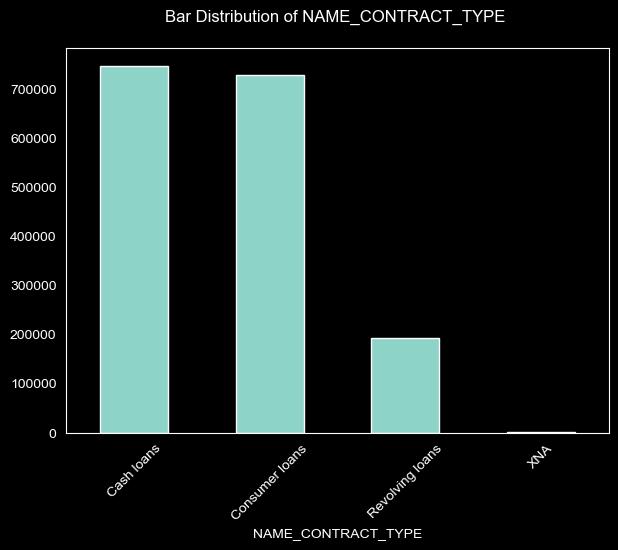

In [142]:
plt.style.use("dark_background")

# The following creates a bar diagram for the NAME_CONTRACT_TYPE column.

plt.figure(figsize = [7,5])
previous_application['NAME_CONTRACT_TYPE'].value_counts().plot.bar()
plt.xlabel("NAME_CONTRACT_TYPE")
plt.title("Bar Distribution of NAME_CONTRACT_TYPE \n")
plt.xticks(rotation=45)
plt.show()

#### OBSERVATION

- It can be observed from the above diagram that the number of cash loans is the highest compared to other categories in the dataset provided.

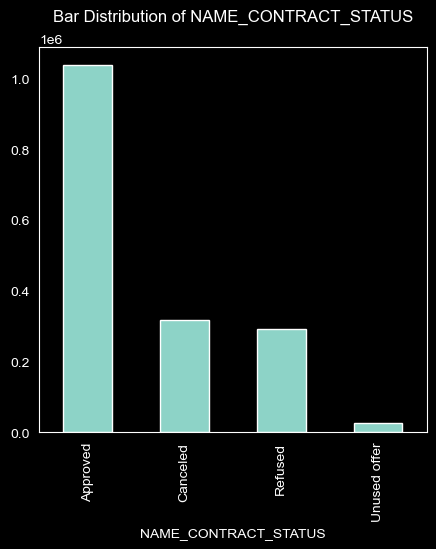

In [143]:
# The following creates a bar diagram for the NAME_CONTRACT_STATUS column.

plt.figure(figsize = [5,5])
previous_application['NAME_CONTRACT_STATUS'].value_counts().plot.bar()
plt.xlabel("NAME_CONTRACT_STATUS")
plt.title("Bar Distribution of NAME_CONTRACT_STATUS\n")
plt.xticks(rotation=90)
plt.show()

#### OBSERVATION

- It can be observed from the above diagram that the most number of loans were approved, followed by the canceled and refused category. The unused offer category has the lowest number.

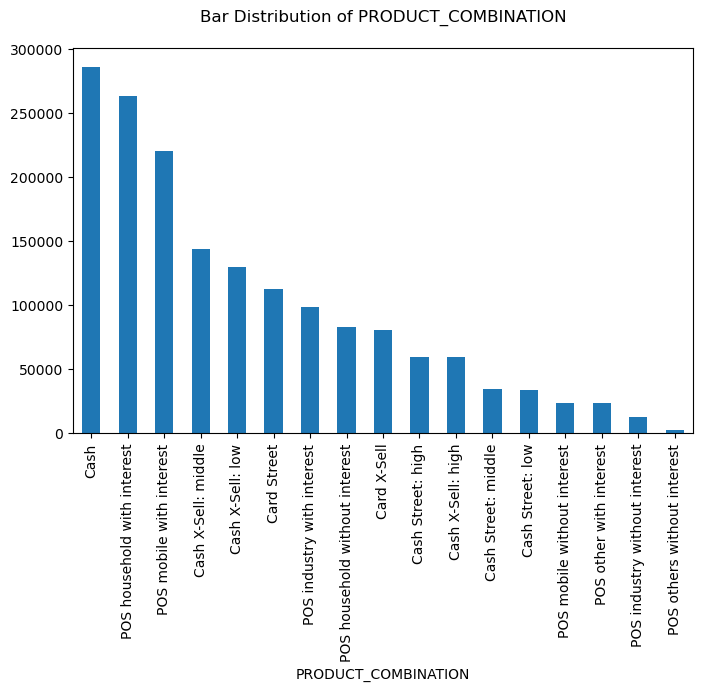

In [144]:
# The following creates a bar diagram for the PRODUCT_COMBINATION column.

plt.style.use("default")
plt.figure(figsize = [8,5])
previous_application['PRODUCT_COMBINATION'].value_counts().plot.bar()
plt.xlabel("PRODUCT_COMBINATION")
plt.title("Bar Distribution of PRODUCT_COMBINATION\n")
plt.xticks(rotation=90)
plt.show()

#### OBSERVATION

- It can be observed from the above diagram that the most number of loans were cash loans, followed by the POS household with interest category, POS mobile with interest category and so on. The POS others without interest category has the lowest number.

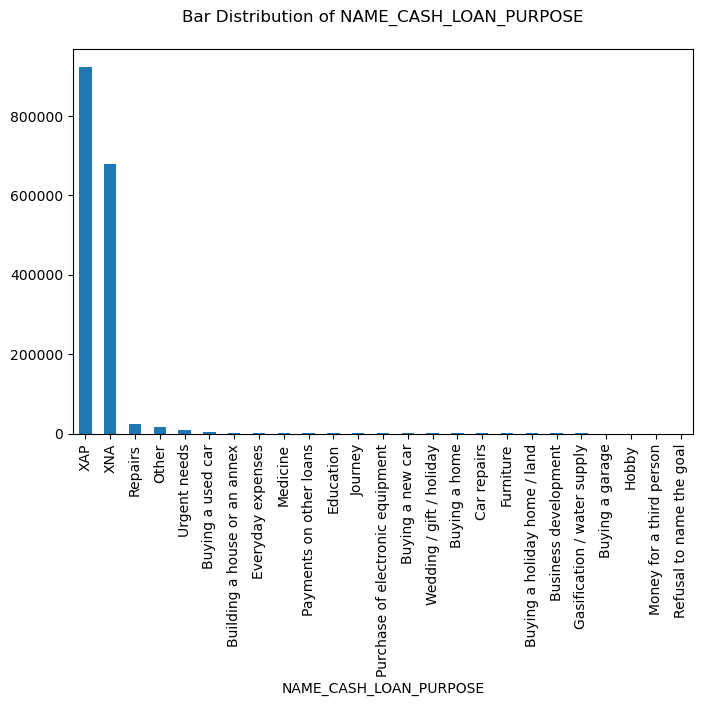

In [145]:
# The following creates a bar diagram for the NAME_CASH_LOAN_PURPOSE column.

plt.style.use("default")
plt.figure(figsize = [8,5])
previous_application['NAME_CASH_LOAN_PURPOSE'].value_counts().plot.bar()
plt.xlabel("NAME_CASH_LOAN_PURPOSE")
plt.title("Bar Distribution of NAME_CASH_LOAN_PURPOSE\n")
plt.xticks(rotation=90)
plt.show()

#### OBSERVATION

- It can be observed from the above diagram that the most number of cash loans were taken for the purpose of XAP, followed by the XNA, Repairs and so on.

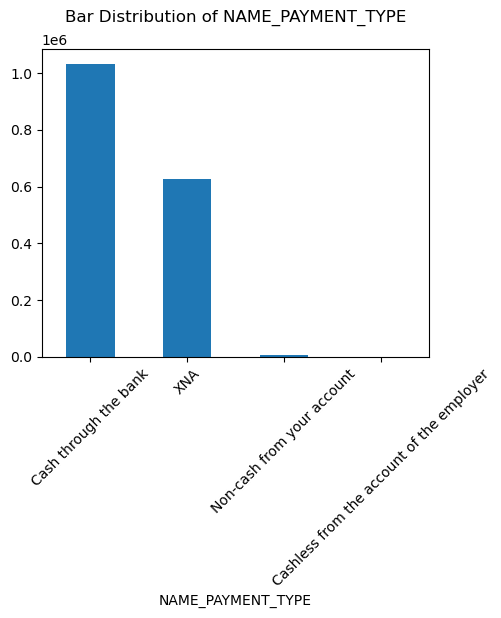

In [146]:
# The following creates a bar diagram for the NAME_PAYMENT_TYPE column.

plt.style.use("default")
plt.figure(figsize = [5,4])
previous_application['NAME_PAYMENT_TYPE'].value_counts().plot.bar()
plt.xlabel("NAME_PAYMENT_TYPE")
plt.title("Bar Distribution of NAME_PAYMENT_TYPE\n")
plt.xticks(rotation=45)
plt.show()

#### OBSERVATION

- It can be observed from the above diagram that the most number of loans were payed by Cash through the bank method, XNA, Non-cash from your account category and the POS Cashless from the account of the employer category has the lowest number.

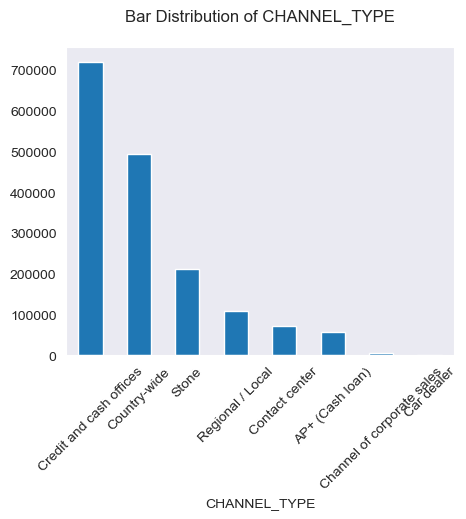

In [147]:
sns.set_style("dark")

# The following creates a bar diagram for the CHANNEL_TYPE column.


plt.figure(figsize = [5,4])
previous_application['CHANNEL_TYPE'].value_counts().plot.bar()
plt.xlabel("CHANNEL_TYPE")
plt.title("Bar Distribution of CHANNEL_TYPE\n")
plt.xticks(rotation=45)
plt.show()

#### OBSERVATION

- It can be observed from the above diagram that the most number of loans belonged to the channel type credit and cash offices, followed by country-wise, Stone etc,. The channel of corporate sales category has the lowest number.

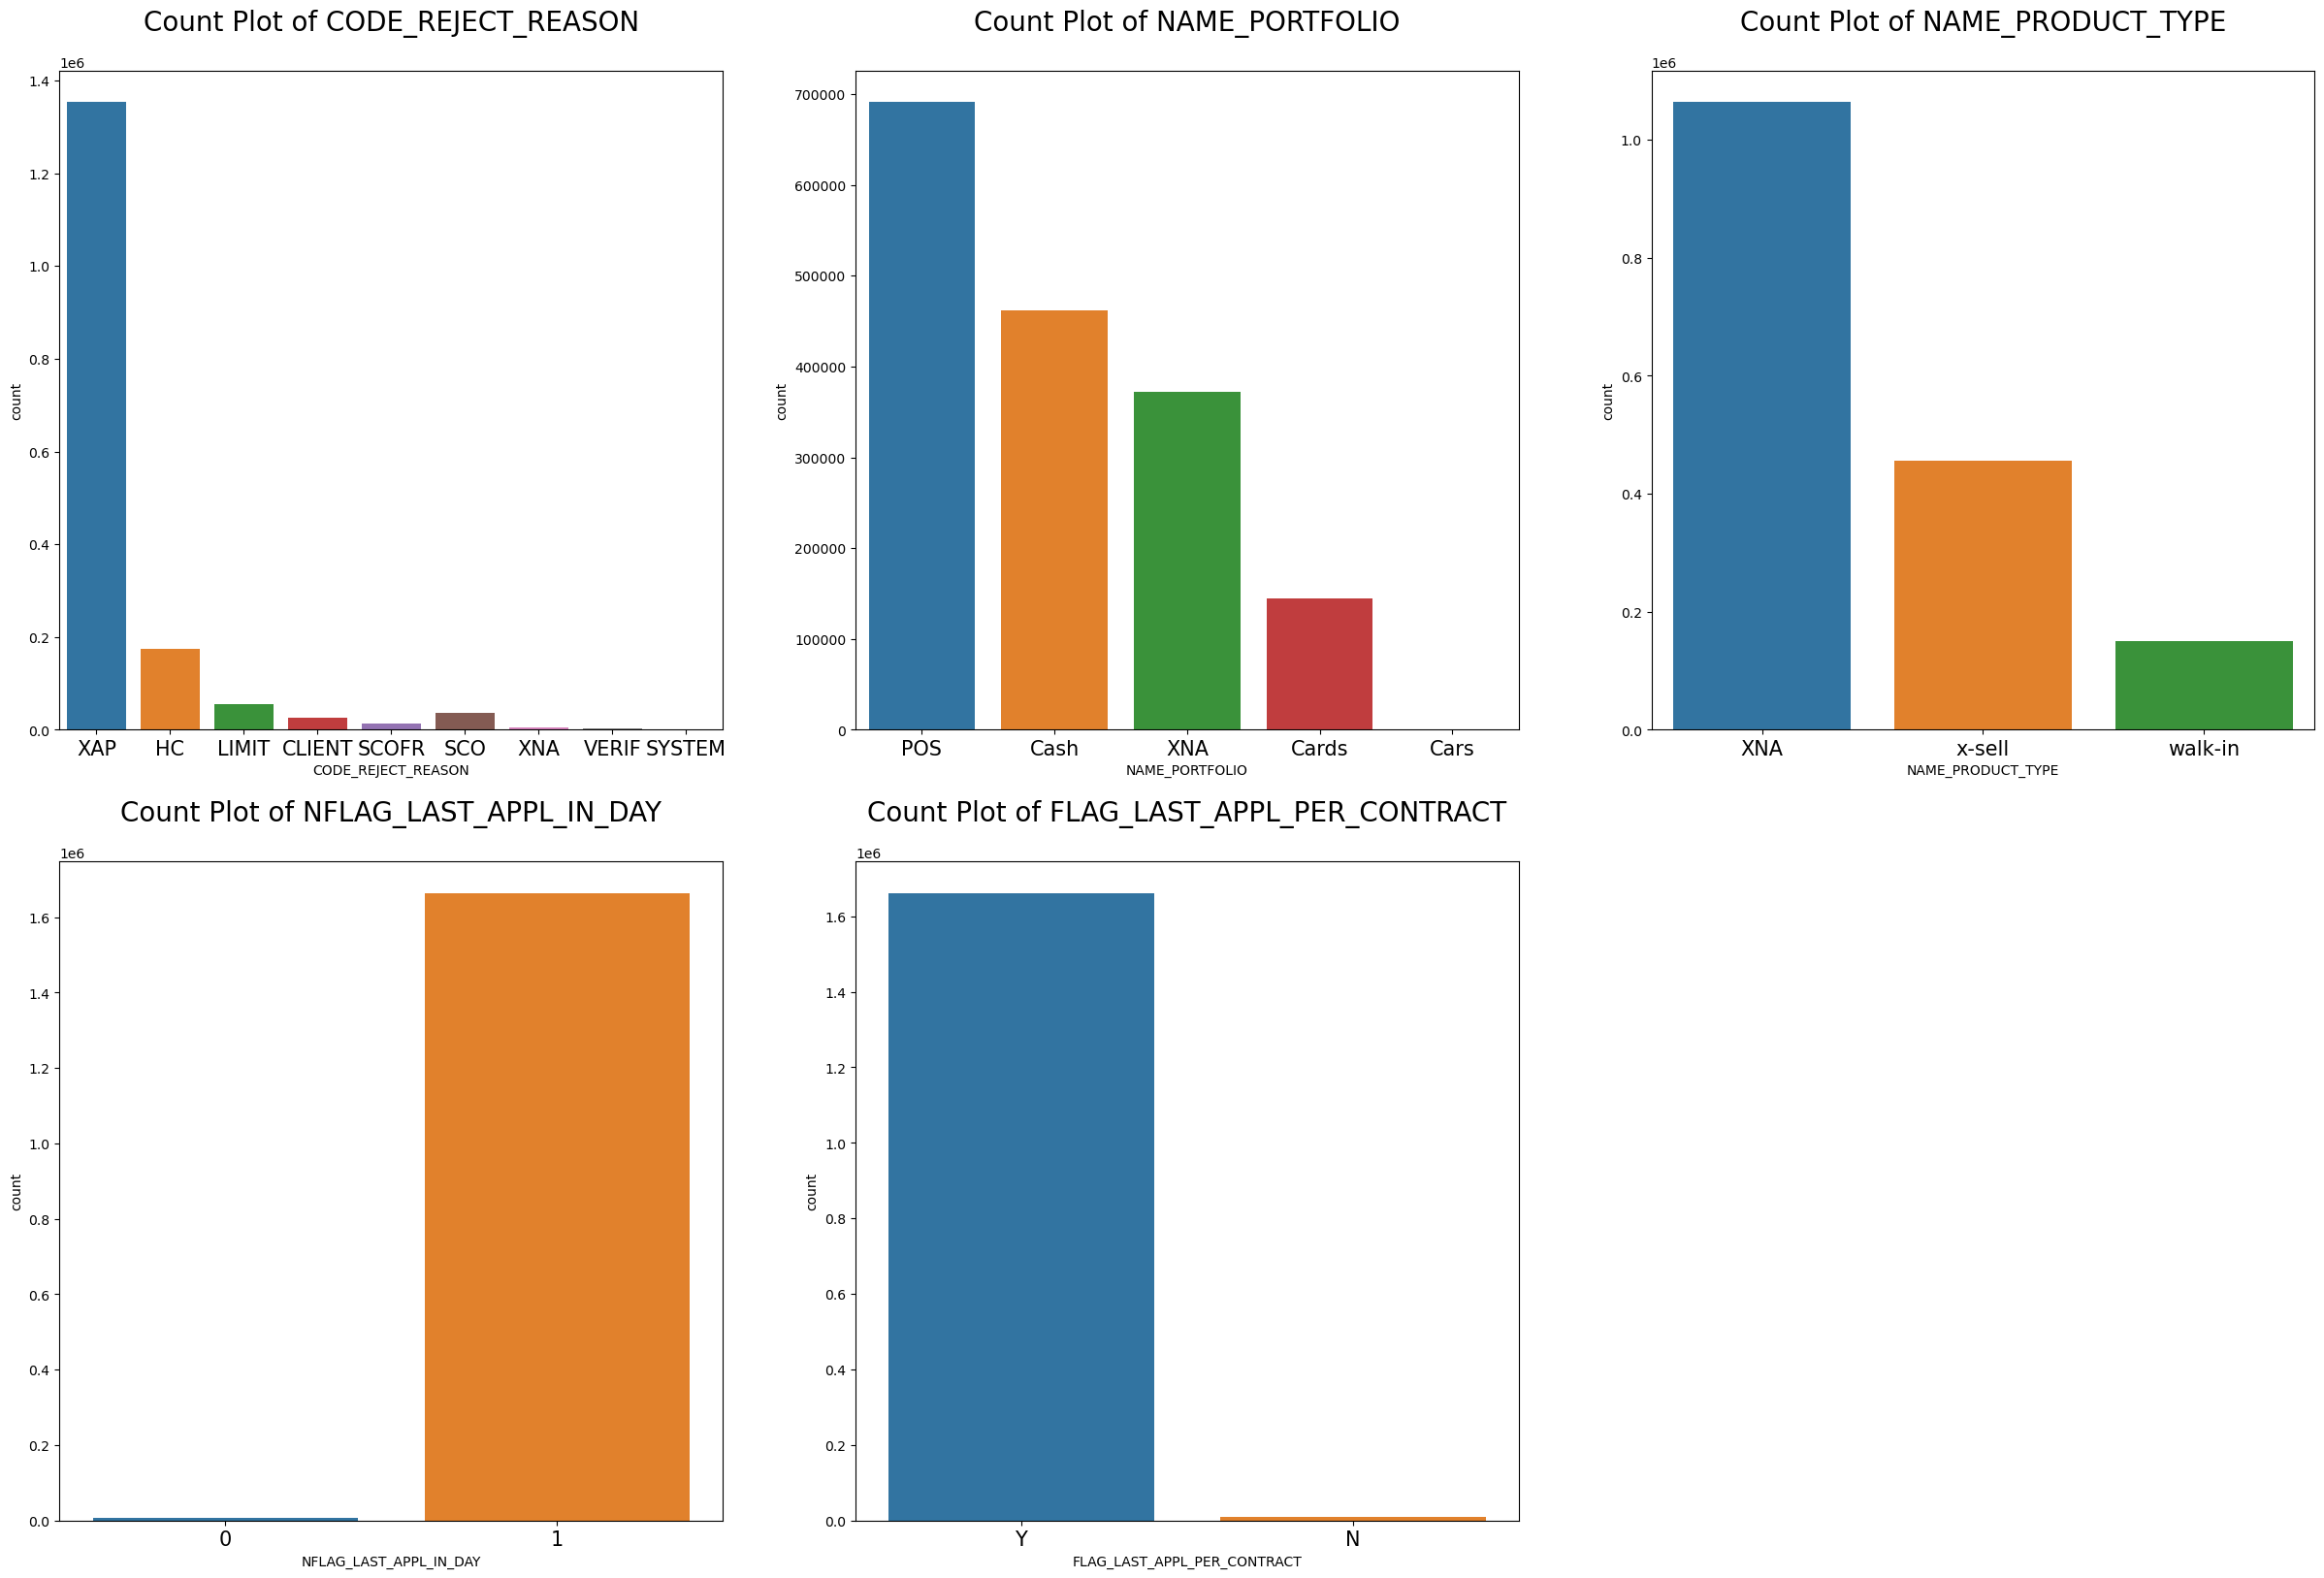

In [148]:
# Using for loop to visualise some of the columns.

plt.style.use("default")
vars_list_1 = ["CODE_REJECT_REASON", "NAME_PORTFOLIO", "NAME_PRODUCT_TYPE", 'NFLAG_LAST_APPL_IN_DAY', "FLAG_LAST_APPL_PER_CONTRACT"]

x = 0
plt.figure(figsize= [30,30])
for i in vars_list_1:
    x += 1
    plt.subplot(3,3,x)
    plt.title("Count Plot of "+i + "\n", fontsize = 20)
    sns.countplot(x = i, data= previous_application)
    plt.xticks(rotation=0, fontsize = 15)

#### OBSERVATION

- The first bar diagram of CODE_REJECT_REASON category shows that the highest number of loans were rejected due to the XAP reason. 
- The second bar diagram of NAME_PORTFOLIO category shows that the maximum number of loans are of the POS portfolio, followed by Cah, XNA, Cards and Cars.
- The third bar diagram of NAME_PRODUCT_TYPE category shows that the highest number of loans are of the product type XNA followed by, x-sell and walk-in.
- The fourth bar diagram of NFLAG_LAST_APPL_IN_DAY category shows that maximum loans fall in the "1" or "Yes" category and very minute number falls in "0" or "No" category.
- The fourth bar diagram of FLAG_LAST_APPL_PER_CONTRACT category shows that maximum loans fall in the "1" or "Yes" category and very minute number falls in "0" or "No" category.

### UNIVARIATE ANALYSIS OF NUMERICAL VARIABLES

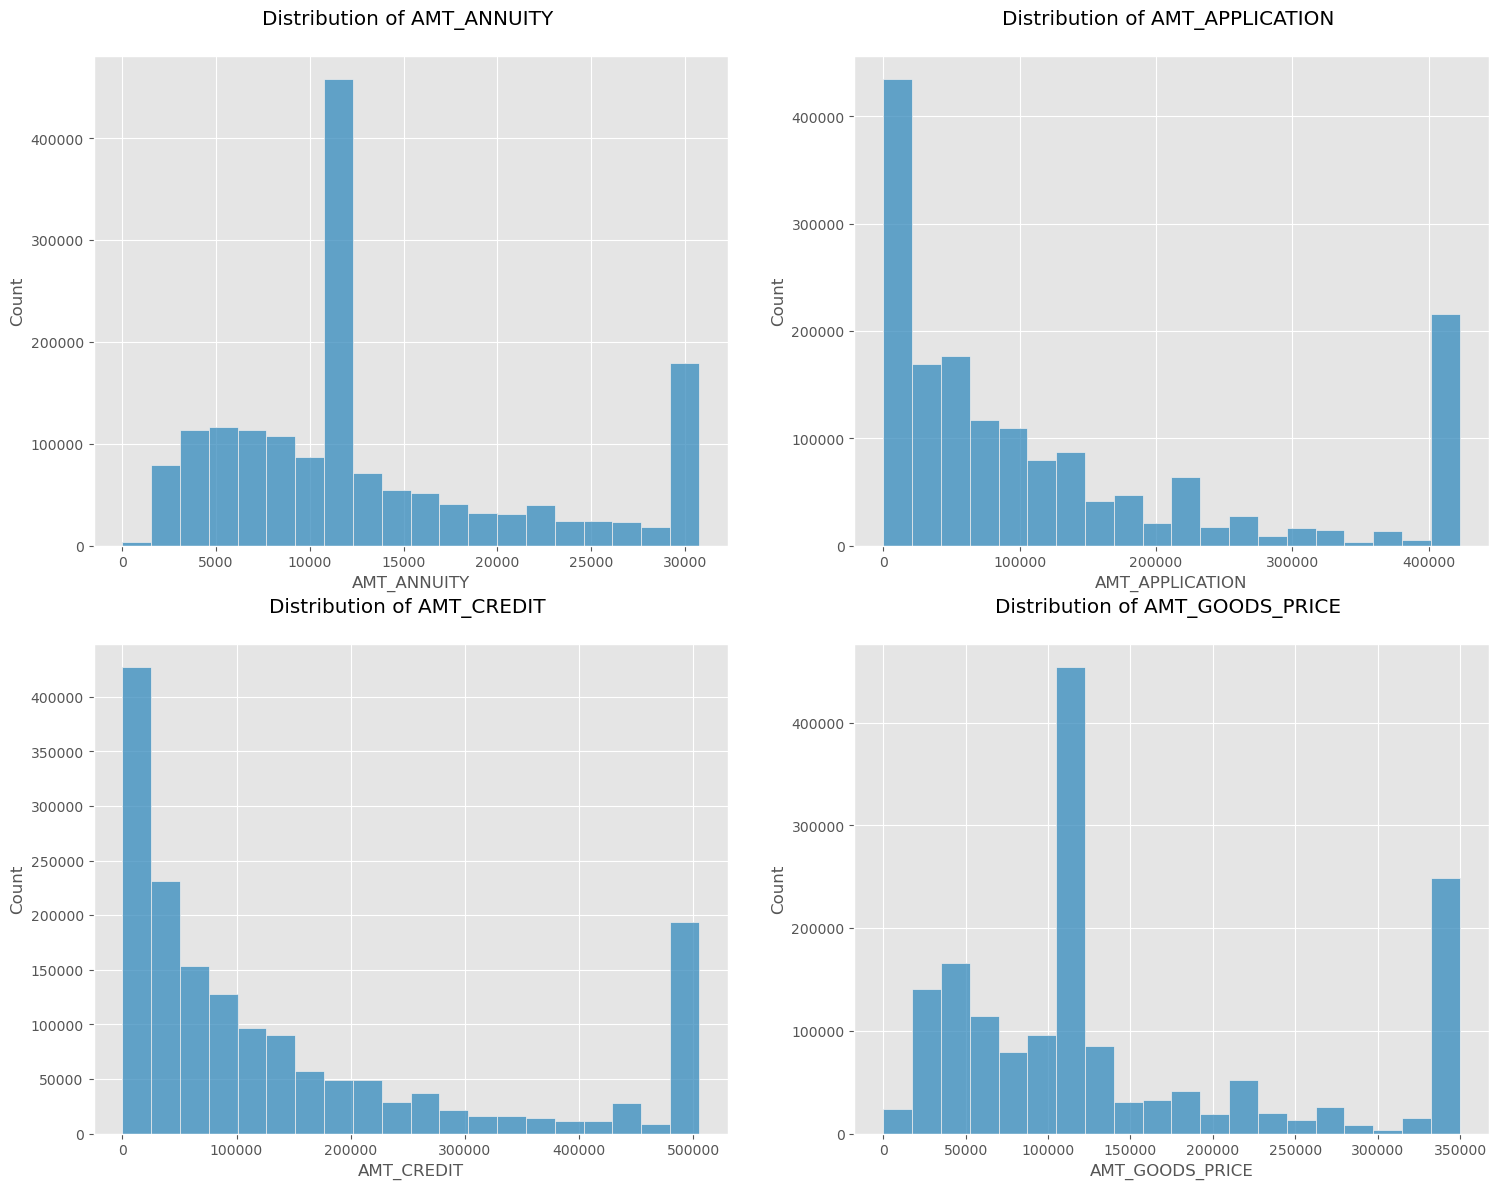

In [149]:
#Analysis of the "AMT_ANNUITY", "AMT_APPLICATION", "AMT_CREDIT", "AMT_GOODS_PRICE" column using HISTOGRAM.

plt.style.use("ggplot")

fig, axes = plt.subplots(2,2, figsize = (18,14))
axes[0,0].set_title("Distribution of AMT_ANNUITY \n")
axes[0,1].set_title("Distribution of AMT_APPLICATION \n")
axes[1,0].set_title("Distribution of AMT_CREDIT \n")
axes[1,1].set_title("Distribution of AMT_GOODS_PRICE \n")
sns.histplot(ax= axes[0,0], data= previous_application["AMT_ANNUITY"], bins= 20)
sns.histplot(ax= axes[0,1], data= previous_application["AMT_APPLICATION"], bins= 20)
sns.histplot(ax= axes[1,0], data= previous_application["AMT_CREDIT"], bins= 20)
sns.histplot(ax= axes[1,1], data= previous_application["AMT_GOODS_PRICE"], bins= 20)
plt.show()

#### OBSERVATION:

- The first histogram shows that the amount of annuity can be seen to be the highest in the bracket of 10,000 to 15,000 and there is further another peak in the data that occurs at 30,000.
- The second histogram shows that the amount of applications data has two peaks in the distribution, one occuring at 0 to 20,000 and the other at 4,00,000 and 4,20,000.
- The third histogram shows that the amount of credit can be seen to be the highest in the bracket of 0 to 20,000 and there is further another peak in the data that occurs at 4,80,000 to 5,00,000.
- The fourth histogram shows that the amount of goods price can be seen to be the highest in the bracket of 1,00,000 to 1,50,000 and there is further another peak in the data that occurs at 3,25,000 to 3,50,000.

## BIVARIATE ANALYSIS


<Figure size 500x500 with 0 Axes>

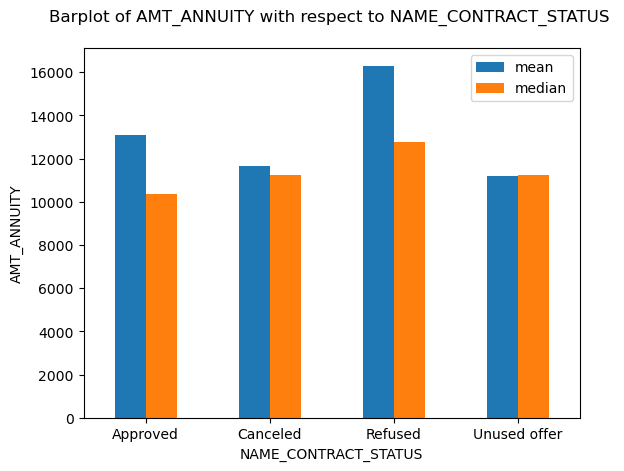

In [150]:
plt.style.use("default")
plt.figure(figsize = [5,5])
previous_application.groupby("NAME_CONTRACT_STATUS")["AMT_ANNUITY"].aggregate(["mean","median"]).plot.bar()
plt.title("Barplot of AMT_ANNUITY with respect to NAME_CONTRACT_STATUS \n")
plt.xlabel("NAME_CONTRACT_STATUS")
plt.ylabel("AMT_ANNUITY")
plt.xticks(rotation = 0)
plt.show()

#### OBSERVATION

- In the above diagram it can be observed that it is a grouped column chart that shows the mean and median for each category of the NAME_CONTRACT_STATUS with respect to the AMT_ANNUITY column. It can be observed that the Refused category has the highest mean and median annuity amount, followed by Approved, Canceled and Unused offer.

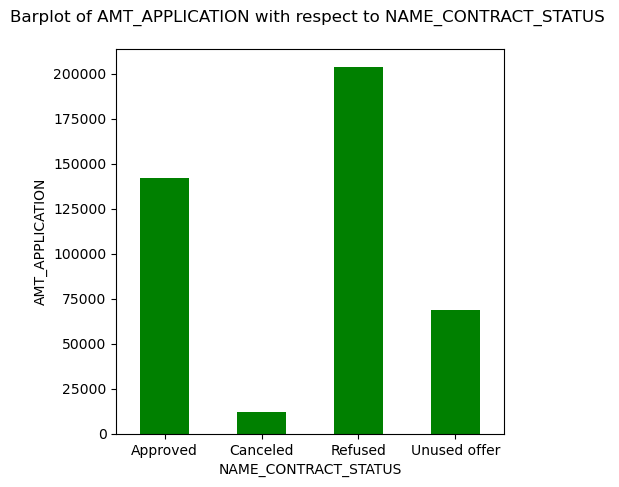

In [151]:
plt.figure(figsize = [5,5])
previous_application.groupby("NAME_CONTRACT_STATUS")["AMT_APPLICATION"].mean().plot.bar(color = 'green')
plt.title("Barplot of AMT_APPLICATION with respect to NAME_CONTRACT_STATUS \n")
plt.xlabel("NAME_CONTRACT_STATUS")
plt.ylabel("AMT_APPLICATION")
plt.xticks(rotation = 0)
plt.show()

#### OBSERVATION

- In the above diagram it can be observed that it is a bar chart that shows the mean for each category of the NAME_CONTRACT_STATUS with respect to the AMT_APPLICATION column. It can be observed that the Refused category has the highest mean application amount, followed by Approved, Unused offer and Canceled.

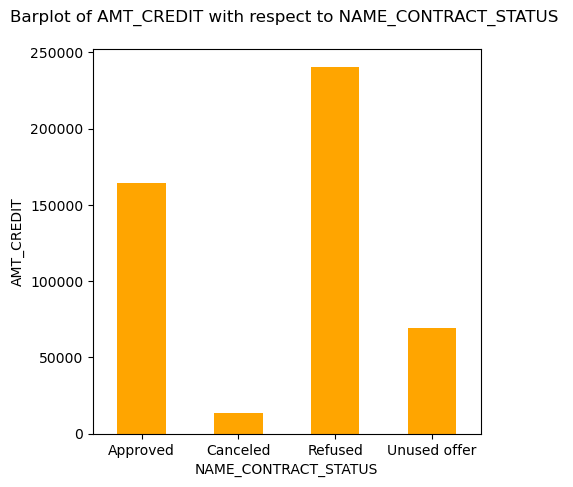

In [152]:
plt.figure(figsize = [5,5])
previous_application.groupby("NAME_CONTRACT_STATUS")["AMT_CREDIT"].mean().plot.bar(color = 'orange')
plt.title("Barplot of AMT_CREDIT with respect to NAME_CONTRACT_STATUS \n")
plt.xlabel("NAME_CONTRACT_STATUS")
plt.ylabel("AMT_CREDIT")
plt.xticks(rotation = 0)
plt.show()

#### OBSERVATION

- In the above diagram it can be observed that it is a bar chart that shows the mean for each category of the NAME_CONTRACT_STATUS with respect to the AMT_CREDIT column. It can be observed that the Refused category has the highest mean credit amount, followed by Approved, Unused offer and Canceled.

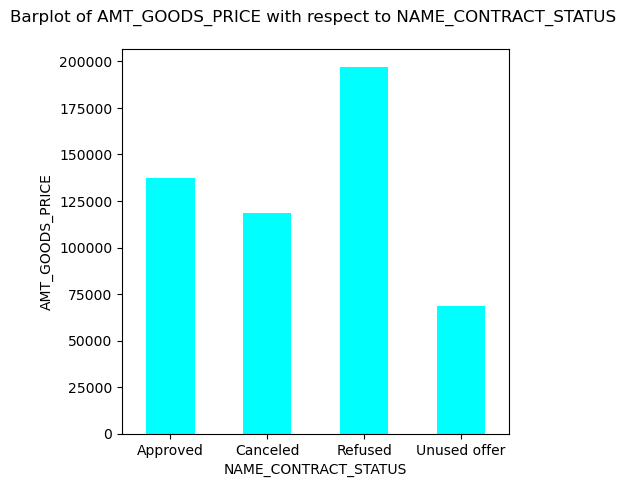

In [153]:
plt.figure(figsize = [5,5])
previous_application.groupby("NAME_CONTRACT_STATUS")["AMT_GOODS_PRICE"].mean().plot.bar(color = 'cyan')
plt.title("Barplot of AMT_GOODS_PRICE with respect to NAME_CONTRACT_STATUS \n")
plt.xlabel("NAME_CONTRACT_STATUS")
plt.ylabel("AMT_GOODS_PRICE")
plt.xticks(rotation = 0)
plt.show()

#### OBSERVATION

- In the above diagram it can be observed that it is a bar chart that shows the mean for each category of the NAME_CONTRACT_STATUS with respect to the AMT_GOODS_PRICE column. It can be observed that the Refused category has the highest mean goods price amount, followed by Approved, Canceled and Unused offer.

## MULTIVARIATE ANALYSIS

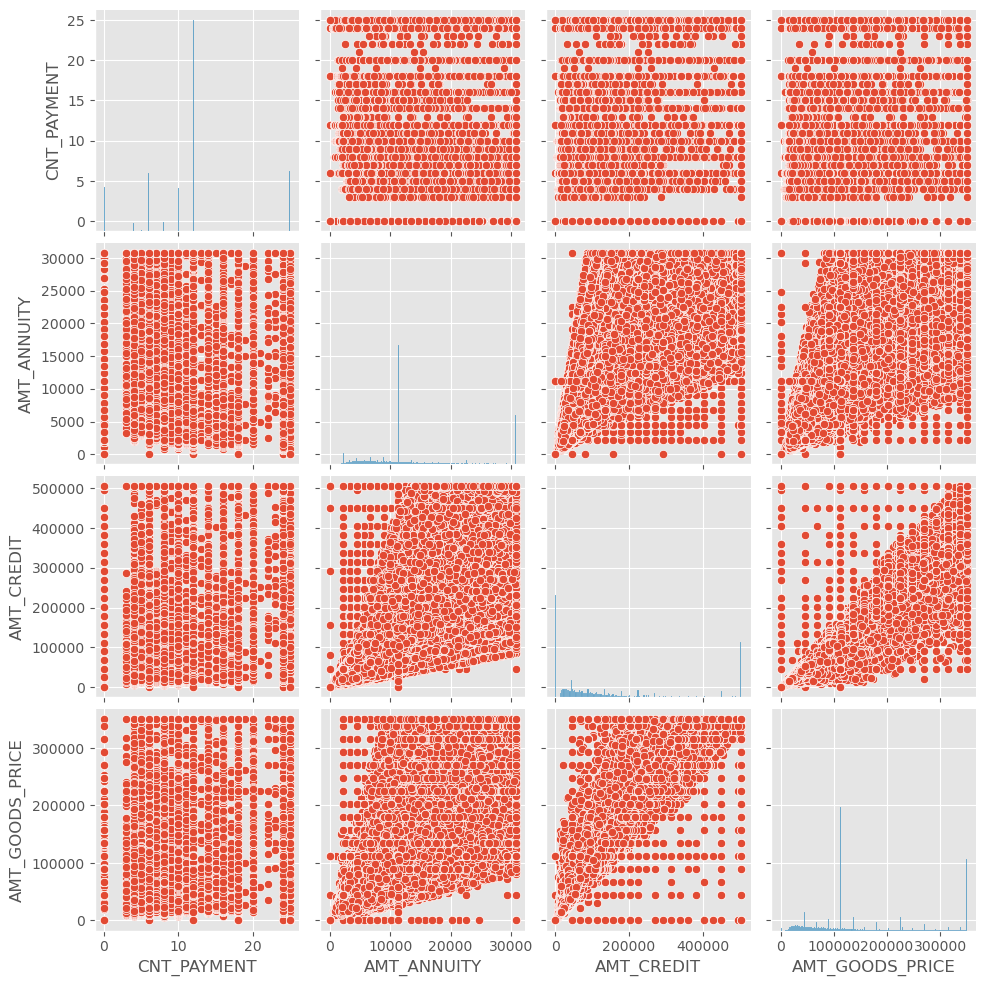

In [154]:
plt.style.use("ggplot")
sns.pairplot(previous_application[['CNT_PAYMENT', 'AMT_ANNUITY','AMT_CREDIT', 'AMT_GOODS_PRICE']])
plt.show()

In [155]:
previous_application[numerical_cols_2].corr()

AMT_ANNUITY  AMT_APPLICATION  AMT_CREDIT  AMT_GOODS_PRICE  \
AMT_ANNUITY          1.000000         0.798277    0.822025         0.856074   
AMT_APPLICATION      0.798277         1.000000    0.941220         0.931341   
AMT_CREDIT           0.822025         0.941220    1.000000         0.905632   
AMT_GOODS_PRICE      0.856074         0.931341    0.905632         1.000000   
DAYS_DECISION        0.236185         0.117099    0.116765         0.267402   
SELLERPLACE_AREA    -0.245850        -0.122082   -0.171521        -0.268264   
CNT_PAYMENT          0.399625         0.576056    0.514357         0.580989   

                  DAYS_DECISION  SELLERPLACE_AREA  CNT_PAYMENT  
AMT_ANNUITY            0.236185         -0.245850     0.399625  
AMT_APPLICATION        0.117099         -0.122082     0.576056  
AMT_CREDIT             0.116765         -0.171521     0.514357  
AMT_GOODS_PRICE        0.267402         -0.268264     0.580989  
DAYS_DECISION          1.000000         -0.295887     0.150466  
SELLERPLACE_AREA      -0.295887          1.000000    -0.129633  
CNT_PAYMENT            0.150466         -0.129633     1.000000

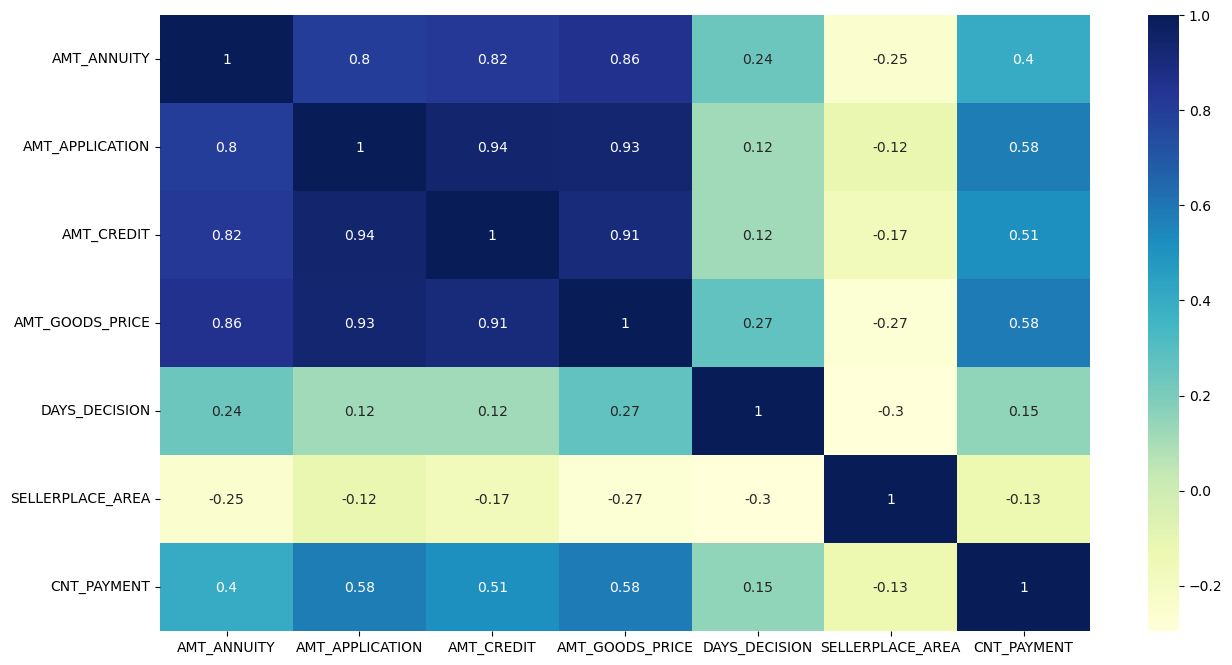

In [156]:
plt.style.use("default")
plt.figure(figsize= [15,8])
sns.heatmap(previous_application[numerical_cols_2].corr(), cmap="YlGnBu", annot=True)
plt.show()

#### OBSERVATION:

- The above graph shows a heatmap that depicts the correlation among the various numerical variables present in this dataset.
- It can be observed from the above heatmap that, AMT_CREDIT , AMT_ANNUITY, AMT_GOODS_PRICE, AMT_APPLICATION are highly correlated among each other.
- Whereas, variables like DAYS_DECISION and SELLERPLACE_AREA show very low correlation with the other variables.
- The highest correlation value 0.94 can be observed between, AMT_CREDIT and AMT_APPLICATION.
- The lowest correlation value -0.3 can be observed between DAYS_DECISION and SELLERPLACE_AREA.

# MERGED DATASETS

In [157]:
# We use the following code to merge the two datasets.

merged_dataset = pd.merge(application_data, previous_application, how = "inner", on = "SK_ID_CURR")

In [158]:
merged_dataset.head(10)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR  \
0      100002       1           Cash loans           M            N   
1      100003       0           Cash loans           F            N   
2      100003       0           Cash loans           F            N   
3      100003       0           Cash loans           F            N   
4      100004       0      Revolving loans           M            Y   
5      100006       0           Cash loans           F            N   
6      100006       0           Cash loans           F            N   
7      100006       0           Cash loans           F            N   
8      100006       0           Cash loans           F            N   
9      100006       0           Cash loans           F            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  \
0               Y             0          202500.0      406597.5   
1               N             0          270000.0     1293502.5   
2               N             0          270000.0     1293502.5   
3               N             0          270000.0     1293502.5   
4               Y             0           67500.0      135000.0   
5               Y             0          135000.0      312682.5   
6               Y             0          135000.0      312682.5   
7               Y             0          135000.0      312682.5   
8               Y             0          135000.0      312682.5   
9               Y             0          135000.0      312682.5   

   AMT_ANNUITY_x  ...  NAME_CLIENT_TYPE   NAME_GOODS_CATEGORY NAME_PORTFOLIO  \
0        24700.5  ...               New              Vehicles            POS   
1        35698.5  ...          Repeater                   XNA           Cash   
2        35698.5  ...         Refreshed             Furniture            POS   
3        35698.5  ...         Refreshed  Consumer Electronics            POS   
4         6750.0  ...               New                Mobile            POS   
5        29686.5  ...          Repeater                   XNA           Cash   
6        29686.5  ...          Repeater                   XNA            XNA   
7        29686.5  ...          Repeater           Audio/Video            POS   
8        29686.5  ...          Repeater                   XNA          Cards   
9        29686.5  ...          Repeater                   XNA           Cash   

  NAME_PRODUCT_TYPE             CHANNEL_TYPE SELLERPLACE_AREA  \
0               XNA                    Stone            206.5   
1            x-sell  Credit and cash offices             -1.0   
2               XNA                    Stone            206.5   
3               XNA             Country-wide            200.0   
4               XNA         Regional / Local             30.0   
5            x-sell  Credit and cash offices             -1.0   
6               XNA  Credit and cash offices             -1.0   
7               XNA             Country-wide            206.5   
8            x-sell  Credit and cash offices             -1.0   
9            x-sell  Credit and cash offices             -1.0   

   NAME_SELLER_INDUSTRY  CNT_PAYMENT  NAME_YIELD_GROUP  \
0       Auto technology         24.0        low_normal   
1                   XNA         12.0        low_normal   
2             Furniture          6.0            middle   
3  Consumer electronics         12.0            middle   
4          Connectivity          4.0            middle   
5                   XNA         25.0        low_normal   
6                   XNA         12.0               XNA   
7  Consumer electronics         12.0              high   
8                   XNA          0.0               XNA   
9                   XNA         18.0              high   

           PRODUCT_COMBINATION  
0      POS other with interest  
1             Cash X-Sell: low  
2   POS industry with interest  
3  POS household with interest  
4  POS mobile without interest  
5             Cash X-Sell: low  
6               

In [159]:
#Now we analyse the shape of the dataset.

merged_dataset.shape

(1413701, 98)

The second dataset named "previous_application" has the following shape:

- 1413701 rows
- 98 columns

In [160]:
# Analysing the datatypes of the dataset.

merged_dataset.dtypes.value_counts()

object      59
float64     27
int64       11
category     1
dtype: int64

As it can be observed from the above analysis that the dataset has columns of the following datatypes:

- float64 : 27
- int64 : 11
- object : 59
- category : 1

In [161]:
#Applying the "describe" function enables us to get a brief overview of the entire dataset.

merged_dataset.describe()

SK_ID_CURR        TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  1.413701e+06  1.413701e+06  1.413701e+06      1.413701e+06   
mean   2.784813e+05  8.655296e-02  4.048933e-01      1.680188e+05   
std    1.028118e+05  2.811789e-01  7.173454e-01      7.278981e+04   
min    1.000020e+05  0.000000e+00  0.000000e+00      2.565000e+04   
25%    1.893640e+05  0.000000e+00  0.000000e+00      1.125000e+05   
50%    2.789920e+05  0.000000e+00  0.000000e+00      1.575000e+05   
75%    3.675560e+05  0.000000e+00  1.000000e+00      2.070000e+05   
max    4.562550e+05  1.000000e+00  1.900000e+01      3.375000e+05   

       AMT_CREDIT_x  AMT_ANNUITY_x  AMT_GOODS_PRICE_x  \
count  1.413701e+06   1.413701e+06       1.413701e+06   
mean   5.832179e+05   2.676404e+04       5.201342e+05   
std    3.706251e+05   1.300470e+04       3.300483e+05   
min    4.500000e+04   1.615500e+03       4.050000e+04   
25%    2.700000e+05   1.682100e+04       2.385000e+05   
50%    5.084955e+05   2.492550e+04       4.500000e+05   
75%    8.079840e+05   3.454200e+04       6.795000e+05   
max    1.616625e+06   6.170400e+04       1.341000e+06   

       REGION_POPULATION_RELATIVE  DAYS_EMPLOYED  DAYS_REGISTRATION  ...  \
count                1.413701e+06   1.413701e+06       1.413701e+06  ...   
mean                 2.074985e-02   7.266347e+04       5.003233e+03  ...   
std                  1.334702e-02   1.433374e+05       3.551051e+03  ...   
min                  2.900000e-04   0.000000e+00       0.000000e+00  ...   
25%                  1.003200e-02   1.042000e+03       2.001000e+03  ...   
50%                  1.885000e-02   2.401000e+03       4.508000e+03  ...   
75%                  2.866300e-02   6.313000e+03       7.510000e+03  ...   
max                  7.250800e-02   3.652430e+05       2.467200e+04  ...   

         SK_ID_PREV  AMT_ANNUITY_y  AMT_APPLICATION  AMT_CREDIT_y  \
count  1.413701e+06   1.413701e+06     1.413701e+06  1.413701e+06   
mean   1.922744e+06   1.328121e+04     1.264962e+05  1.474591e+05   
std    5.327153e+05   8.245277e+03     1.403820e+05  1.656516e+05   
min    1.000001e+06   0.000000e+00     0.000000e+00  0.000000e+00   
25%    1.461346e+06   7.406055e+03     1.975050e+04  2.488050e+04   
50%    1.922698e+06   1.125000e+04     7.087050e+04  8.059500e+04   
75%    2.384012e+06   1.674797e+04     1.800000e+05  2.156400e+05   
max    2.845381e+06   3.073942e+04     4.228200e+05  5.048055e+05   

       AMT_GOODS_PRICE_y  HOUR_APPR_PROCESS_START_y  NFLAG_LAST_APPL_IN_DAY  \
count       1.413701e+06               1.413701e+06            1.413701e+06   
mean        1.423507e+05               1.247893e+01            9.964321e-01   
std         1.046077e+05               3.331474e+00            5.962560e-02   
min         0.000000e+00               0.000000e+00            0.000000e+00   
25%         6.637500e+04               1.000000e+01            1.000000e+00   
50%         1.123200e+05               1.200000e+01            1.000000e+00   
75%         1.800000e+05               1.500000e+01            1.000000e+00   
max         3.497625e+05               2.300000e+01            1.000000e+00   

       DAYS_DECISION  SELLERPLACE_AREA   CNT_PAYMENT  
count   1.413701e+06      1.413701e+06  1.413701e+06  
mean   -8.803670e+02      5.367690e+01  1.273312e+01  
std     7.835402e+02      7.825194e+01  7.211264e+00  
min    -2.922000e+03     -1.000000e+00  0.000000e+00  
25%    -1.313000e+03     -1.000000e+00  1.000000e+01  
50%    -5.820000e+02      4.000000e+00  1.200000e+01  
75%    -2.710000e+02      8.500000e+01  1.800000e+01  
max    -1.000000e+00      2.065000e+02  2.500000e+01  

[8 rows x 38 columns]

In [163]:
merged_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1413701 entries, 0 to 1413700
Data columns (total 98 columns):
 #   Column                        Non-Null Count    Dtype   
---  ------                        --------------    -----   
 0   SK_ID_CURR                    1413701 non-null  int64   
 1   TARGET                        1413701 non-null  int64   
 2   NAME_CONTRACT_TYPE_x          1413701 non-null  object  
 3   CODE_GENDER                   1413701 non-null  object  
 4   FLAG_OWN_CAR                  1413701 non-null  object  
 5   FLAG_OWN_REALTY               1413701 non-null  object  
 6   CNT_CHILDREN                  1413701 non-null  int64   
 7   AMT_INCOME_TOTAL              1413701 non-null  float64 
 8   AMT_CREDIT_x                  1413701 non-null  float64 
 9   AMT_ANNUITY_x                 1413701 non-null  float64 
 10  AMT_GOODS_PRICE_x             1413701 non-null  float64 
 11  NAME_TYPE_SUITE               1413701 non-null  object  
 12  NAME_INCOME_TY

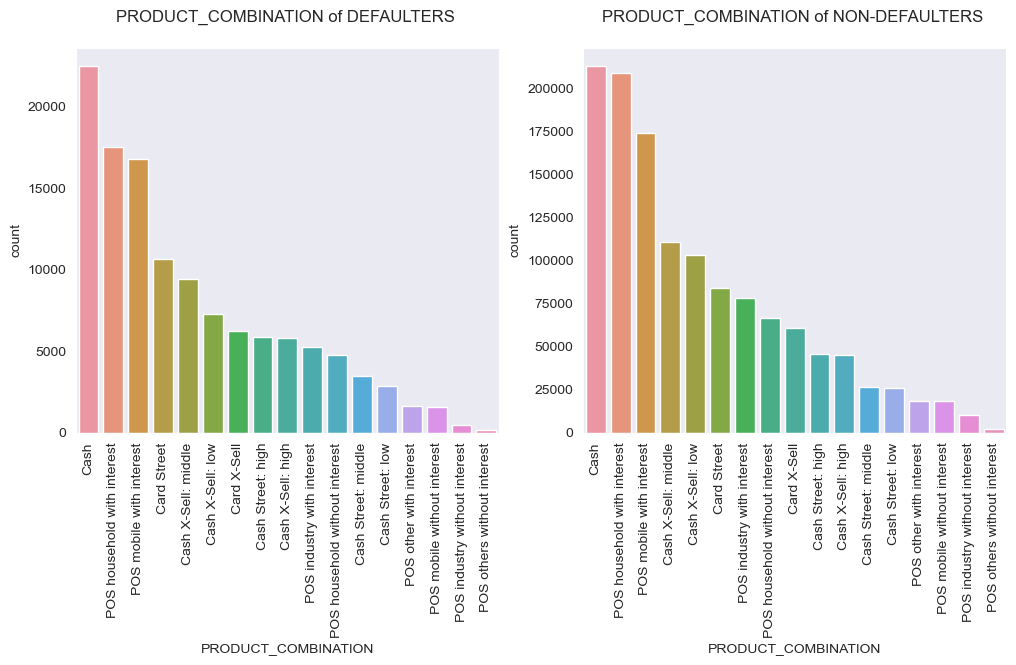

In [218]:
# Analysing NAME_CONTRACT_STATUS column with respect to TARGET column.
DEFAULTER = merged_dataset[merged_dataset.TARGET == 1]
NON_DEFAULTER = merged_dataset[merged_dataset.TARGET == 0]
plt.figure(figsize = [12,5])
plt.subplot(1,2,1)
sns.countplot(x = DEFAULTER["PRODUCT_COMBINATION"], order = DEFAULTER["PRODUCT_COMBINATION"].value_counts(normalize=True).index)
plt.title("PRODUCT_COMBINATION of DEFAULTERS \n")
plt.xlabel("PRODUCT_COMBINATION")
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.countplot(x = NON_DEFAULTER["PRODUCT_COMBINATION"], order = NON_DEFAULTER["PRODUCT_COMBINATION"].value_counts(normalize=True).index)
plt.title("PRODUCT_COMBINATION of NON-DEFAULTERS \n")
plt.xlabel("PRODUCT_COMBINATION")
plt.xticks(rotation=90)
plt.show()

### OBSERVATION:

The above set of graphs show that:

- Maximum Defaulters get their loans in the product type cash.
- Maximum no of Non-defaulters also get their loans in the product type cash.

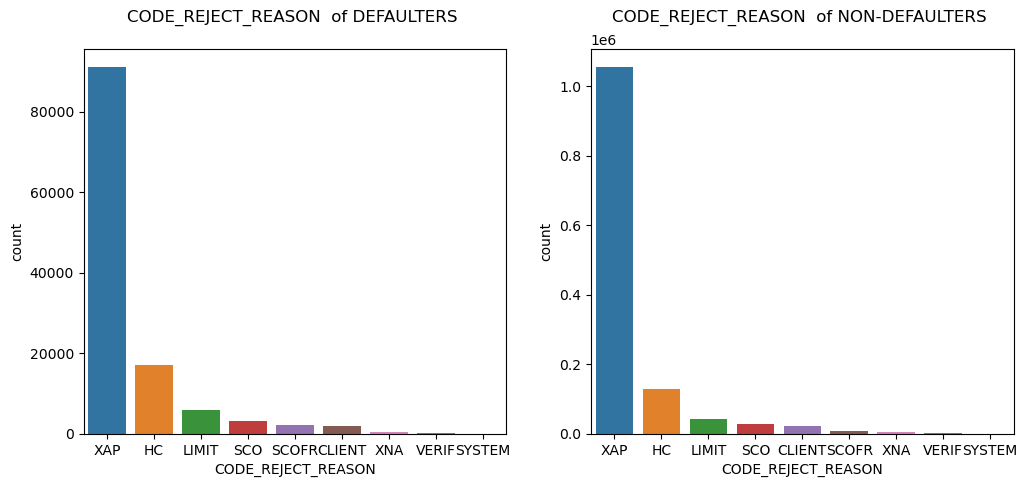

In [174]:
# Analysing CODE_REJECT_REASON  column with respect to TARGET column.
DEFAULTER = merged_dataset[merged_dataset.TARGET == 1]
NON_DEFAULTER = merged_dataset[merged_dataset.TARGET == 0]
plt.figure(figsize = [12,5])
plt.subplot(1,2,1)
sns.countplot(x = DEFAULTER["CODE_REJECT_REASON"], order = DEFAULTER["CODE_REJECT_REASON"].value_counts(normalize=True).index)
plt.title("CODE_REJECT_REASON  of DEFAULTERS \n")
plt.xlabel("CODE_REJECT_REASON")
plt.subplot(1,2,2)
sns.countplot(x = NON_DEFAULTER["CODE_REJECT_REASON"], order = NON_DEFAULTER["CODE_REJECT_REASON"].value_counts(normalize=True).index)
plt.title("CODE_REJECT_REASON  of NON-DEFAULTERS \n")
plt.xlabel("CODE_REJECT_REASON")
plt.show()

### OBSERVATION:

The above set of graphs show that:

- Maximum Defaulters get their loans rejected due to XAP.
- Maximum no of Non-defaulters get their loans rejected due to XAP.

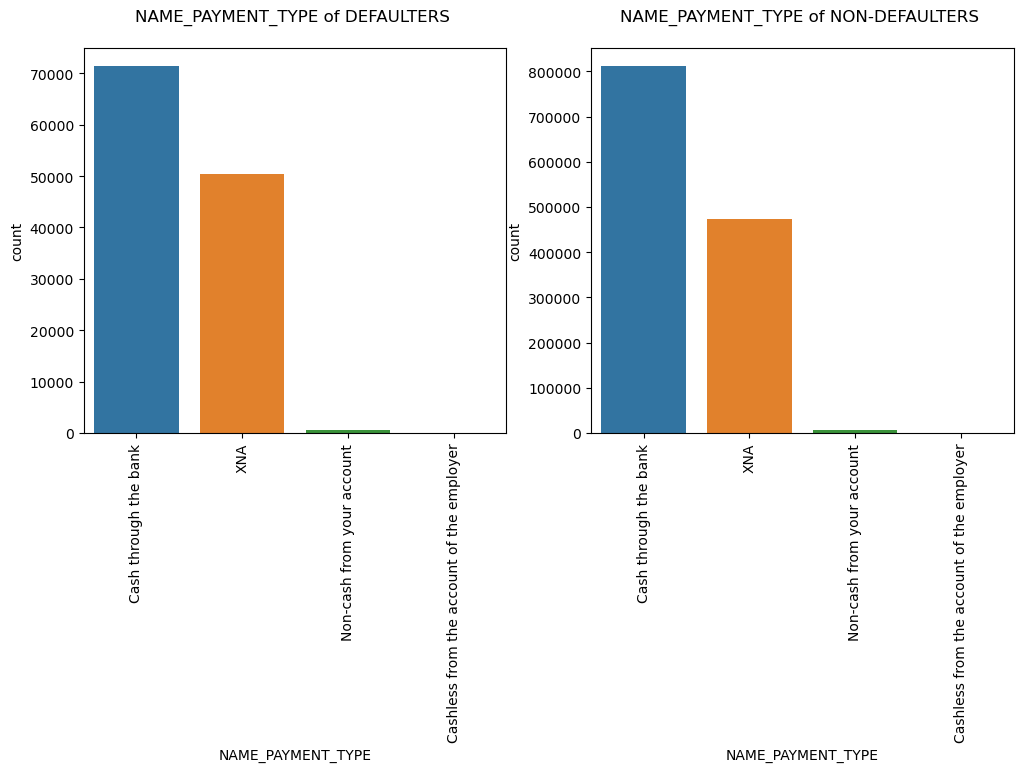

In [178]:
# Analysing NAME_PAYMENT_TYPE column with respect to TARGET column.
DEFAULTER = merged_dataset[merged_dataset.TARGET == 1]
NON_DEFAULTER = merged_dataset[merged_dataset.TARGET == 0]
plt.figure(figsize = [12,5])
plt.subplot(1,2,1)
sns.countplot(x = DEFAULTER["NAME_PAYMENT_TYPE"], order = DEFAULTER["NAME_PAYMENT_TYPE"].value_counts(normalize=True).index)
plt.title("NAME_PAYMENT_TYPE of DEFAULTERS \n")
plt.xlabel("NAME_PAYMENT_TYPE")
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.countplot(x = NON_DEFAULTER["NAME_PAYMENT_TYPE"], order = NON_DEFAULTER["NAME_PAYMENT_TYPE"].value_counts(normalize=True).index)
plt.title("NAME_PAYMENT_TYPE of NON-DEFAULTERS \n")
plt.xlabel("NAME_PAYMENT_TYPE")
plt.xticks(rotation=90)
plt.show()

### OBSERVATION:

The above set of graphs show that:

- Maximum Defaulters pay their loans by Cash through the bank.
- Maximum no of Non-defaulters pay their loans by Cash through the bank.

In [180]:
numerical_columns_all = merged_dataset.select_dtypes(include=["int","float"])

In [181]:
numerical_columns_all.corr()

SK_ID_CURR    TARGET  CNT_CHILDREN  \
SK_ID_CURR                     1.000000 -0.001246     -0.003099   
TARGET                        -0.001246  1.000000      0.020313   
CNT_CHILDREN                  -0.003099  0.020313      1.000000   
AMT_INCOME_TOTAL               0.002645 -0.012588      0.021115   
AMT_CREDIT_x                  -0.001379 -0.023033      0.003239   
AMT_ANNUITY_x                 -0.001707 -0.004671      0.030449   
AMT_GOODS_PRICE_x             -0.000742 -0.031907     -0.000159   
REGION_POPULATION_RELATIVE     0.000193 -0.035028     -0.022203   
DAYS_EMPLOYED                  0.000853 -0.049684     -0.249912   
DAYS_REGISTRATION              0.003167 -0.043123     -0.187145   
DAYS_ID_PUBLISH               -0.001686 -0.051037      0.012658   
CNT_FAM_MEMBERS               -0.004128  0.014847      0.879224   
REGION_RATING_CLIENT          -0.000981  0.056932      0.025645   
REGION_RATING_CLIENT_W_CITY   -0.001085  0.059700      0.024503   
HOUR_APPR_PROCESS_START_x      0.001048 -0.022448     -0.000040   
EXT_SOURCE_2                   0.000538 -0.154904     -0.022790   
EXT_SOURCE_3                  -0.001162 -0.168557     -0.042495   
OBS_30_CNT_SOCIAL_CIRCLE      -0.000850  0.014179      0.017473   
DEF_30_CNT_SOCIAL_CIRCLE       0.001451  0.031950      0.000176   
OBS_60_CNT_SOCIAL_CIRCLE      -0.000999  0.014055      0.016911   
DEF_60_CNT_SOCIAL_CIRCLE       0.000791  0.028596     -0.001507   
DAYS_LAST_PHONE_CHANGE        -0.001716  0.059721      0.009633   
AMT_REQ_CREDIT_BUREAU_HOUR    -0.002122  0.000224     -0.000109   
AMT_REQ_CREDIT_BUREAU_DAY     -0.001266  0.004027     -0.002042   
AMT_REQ_CREDIT_BUREAU_WEEK     0.001317 -0.000696      0.003214   
AMT_REQ_CREDIT_BUREAU_MON      0.001462 -0.014592     -0.010379   
AMT_REQ_CREDIT_BUREAU_QRT      0.000615 -0.005179     -0.012574   
AMT_REQ_CREDIT_BUREAU_YEAR     0.004309  0.006453     -0.061463   
SK_ID_PREV                     0.000147  0.002009     -0.002791   
AMT_ANNUITY_y                  0.000309 -0.012156     -0.044815   
AMT_APPLICATION                0.000343 -0.005477     -0.040487   
AMT_CREDIT_y                   0.000306 -0.001527     -0.041517   
AMT_GOODS_PRICE_y              0.000643  0.000604     -0.058807   
HOUR_APPR_PROCESS_START_y      0.001791 -0.027809      0.017132   
NFLAG_LAST_APPL_IN_DAY        -0.000634 -0.002887      0.000782   
DAYS_DECISION                 -0.000410  0.039901     -0.012805   
SELLERPLACE_AREA              -0.000012 -0.026412      0.051127   
CNT_PAYMENT                   -0.000626  0.016142     -0.046621   

                             AMT_INCOME_TOTAL  AMT_CREDIT_x  AMT_ANNUITY_x  \
SK_ID_CURR                           0.002645     -0.001379      -0.001707   
TARGET                              -0.012588     -0.023033      -0.004671   
CNT_CHILDREN                         0.021115      0.003239       0.030449   
AMT_INCOME_TOTAL                     1.000000      0.383757       0.467597   
AMT_CREDIT_x                         0.383757      1.000000       0.779970   
AMT_ANNUITY_x                        0.467597      0.779970       1.000000   
AMT_GOODS_PRICE_x                    0.385263      0.985068       0.781872   
REGION_POPULATION_RELATIVE           0.168490      0.083907       0.102680   
DAYS_EMPLOYED                       -0.160888     -0.060268      -0.114399   
DAYS_REGISTRATION                   -0.064370     -0.008977      -0.048305   
DAYS_ID_PUBLISH                     -0.034953     -0.009349      -0.032954   
CNT_FAM_MEMBERS                      0.027298      0.064386       0.087847   
REGION_RATING_CLIENT                -0.209702     -0.084280      -0.112530   
REGION_RATING_CLIENT_W_CITY         -0.227995     -0.093140      -0.126441   
HOUR_APPR_PROCESS_START_x            0.091612      0.047219       0.051476   
EXT_SOURCE_2                         0.155027      0.115629       0.108236   
EXT_SOURCE_3                        -0.087729      0.035215       0.008818   
OBS_30_CNT_

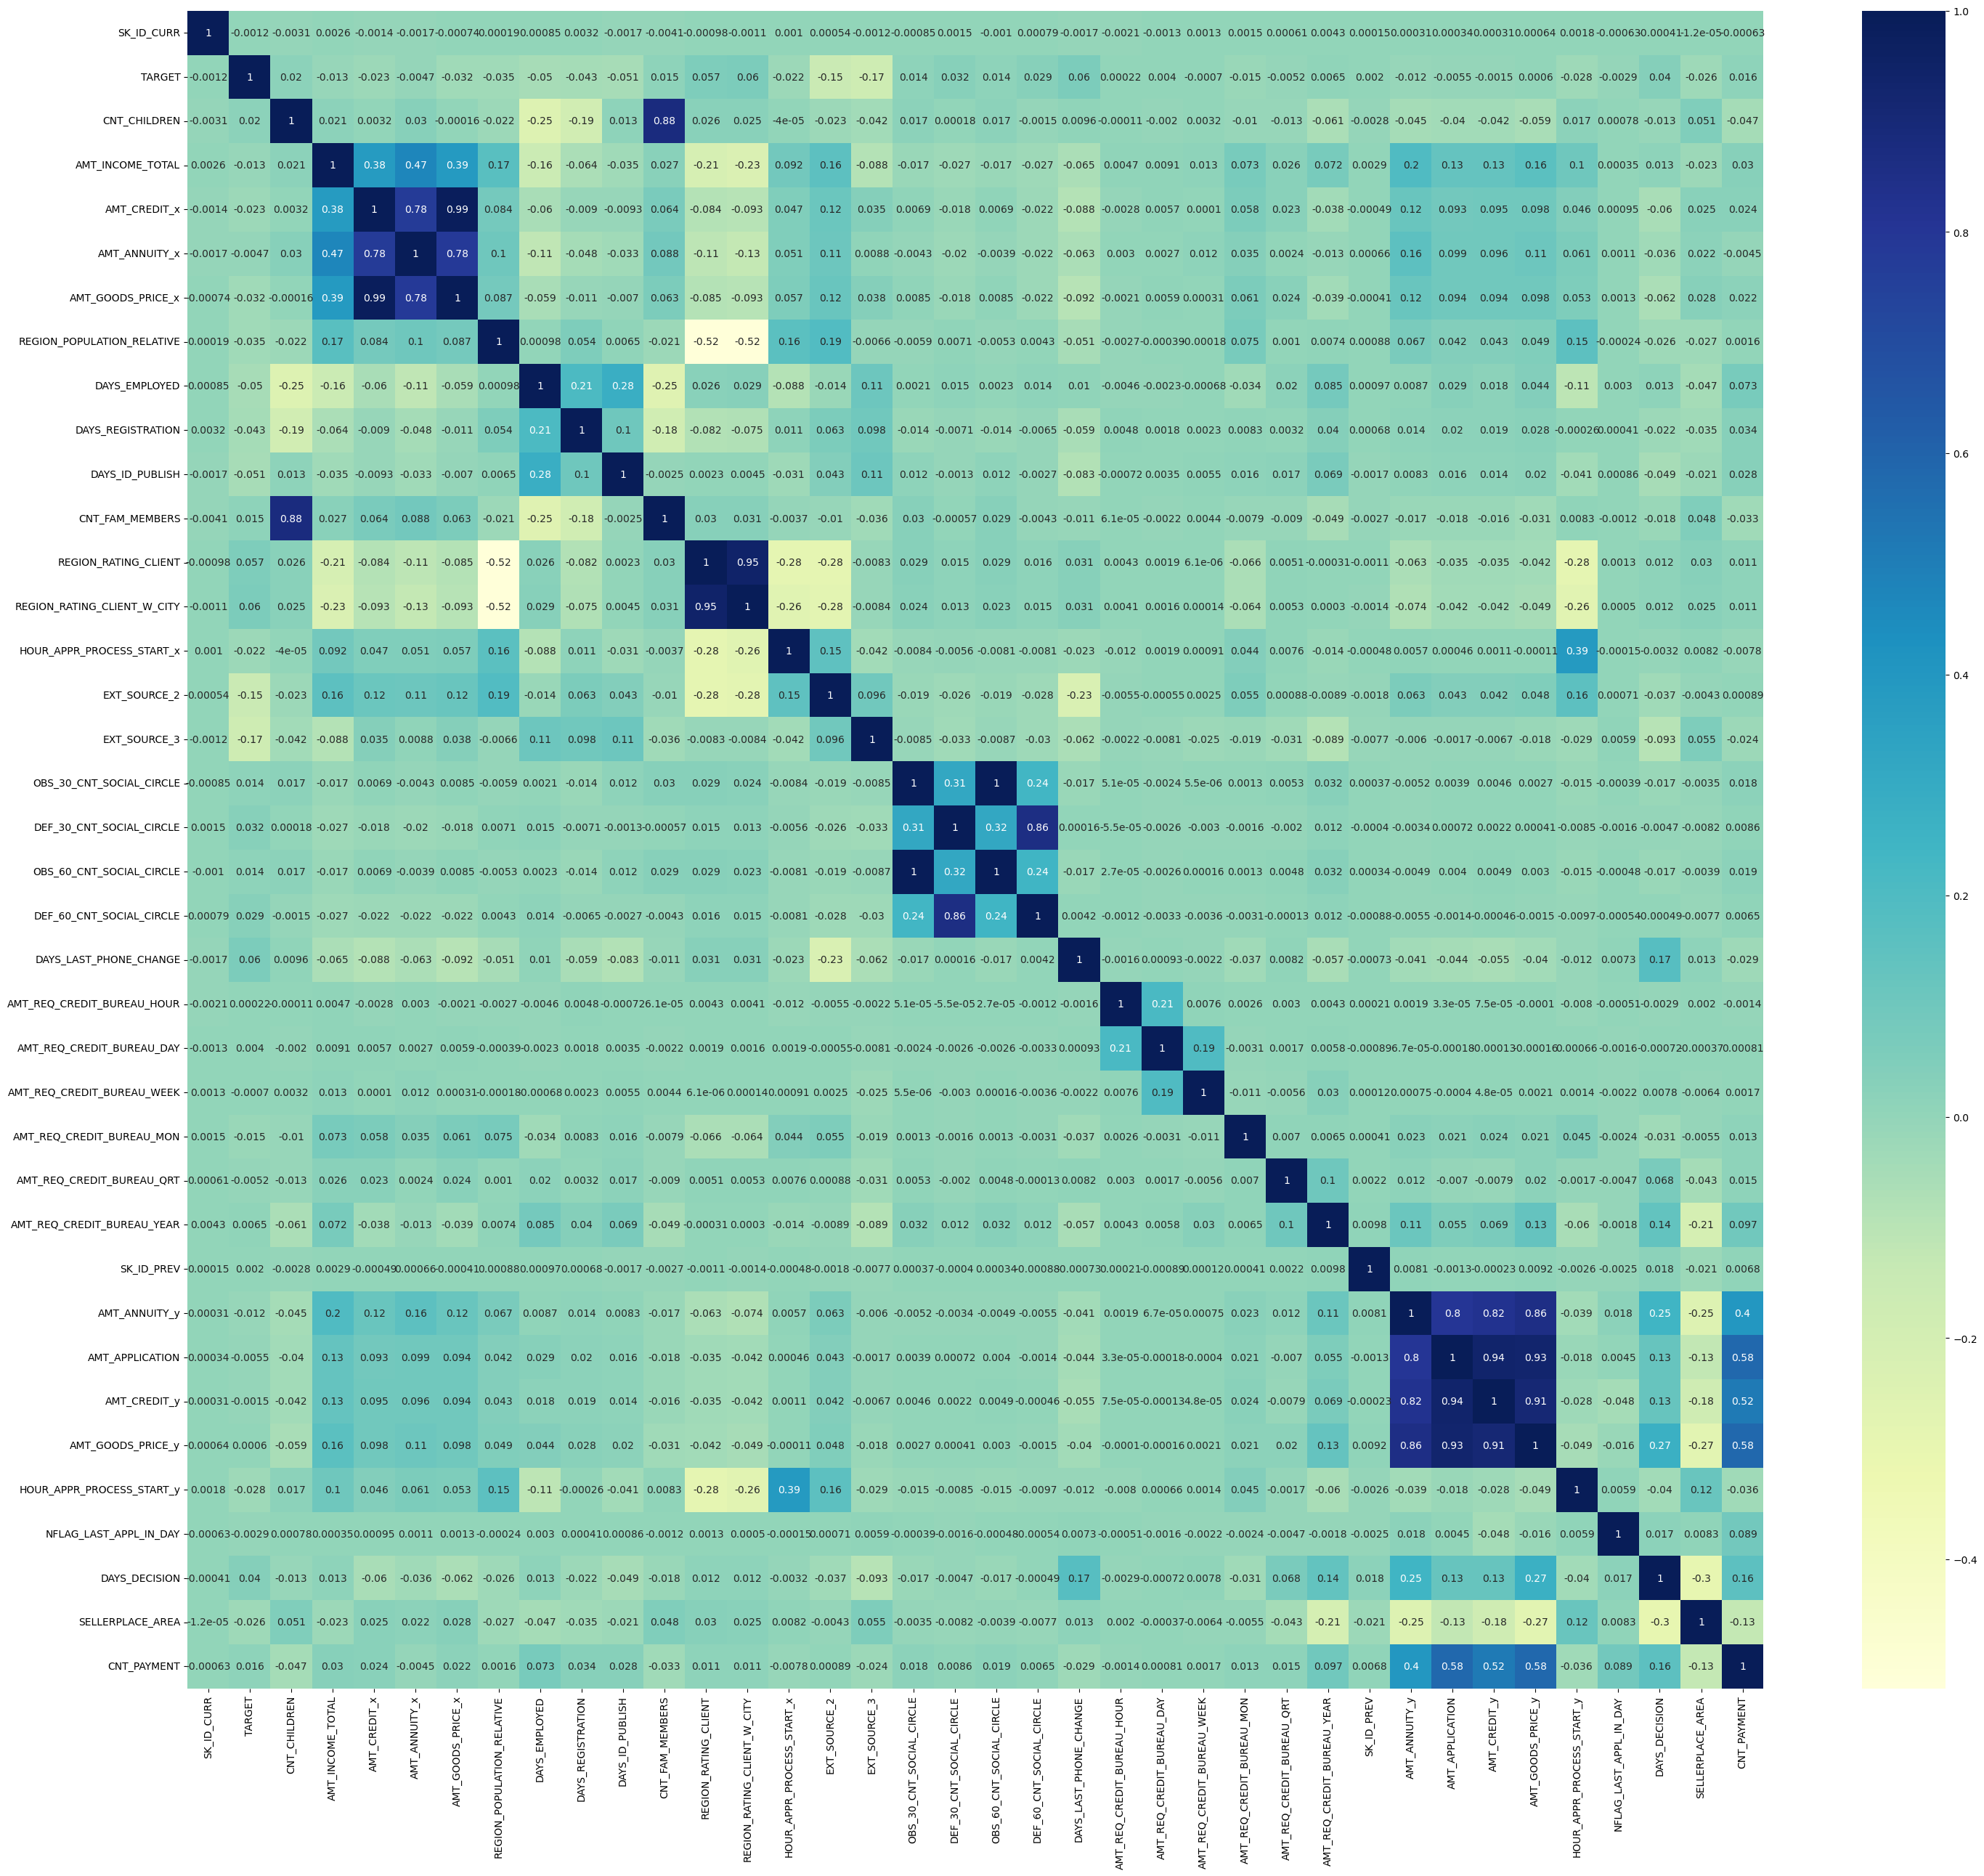

In [185]:
plt.figure(figsize = [35,30])
sns.heatmap(numerical_columns_all.corr(), cmap = 'YlGnBu', annot= True)
plt.show()

#### OBSERVATION:

- The above graph shows a heatmap that depicts the correlation among the various variables present in the merged dataset. In simple words, the diagram indicates which variables tend to have a higher relationship when it comes to the clients.

The top 10 correlations as can be observed from the above heatmap are as follows:

1. Correlation between AMT_GOODS_PRICE_x and AMT_CREDIT_x : 0.99
2. Correlation between REG_RATING_CLIENT_W_CITY and REGION_RATING_CLIENT : 0.95
3. Correlation between AMT_APPLICATION and AMT_CREDIT_y : 0.94
4. Correlation between AMT_GOODS_PRICE_y and AMT_APPLICATION : 0.93
5. Correlation between AMT_GOODS_PRICE_y and AMT_CREDIT_y :0.91
6. Correlation between CNT_FAM_MEMBERS and CNT_CHILDREN : 0.88
7. Correlation between DEF_60_CNT_SOCIAL_CIRCLE and DEF_30_CNT_SOCIAL_CIRCLE : 0.86
8. Correlation between AMT_GOODS_PRICE_y and AMT_ANNUITY_y : 0.86
9. Correlation between AMT_ANNUITY_y and AMT_CREDIT_y :0.82
10. Correlation between AMT_APPLICATION and AMT_ANNUITY_y : 0.8


- The lowest correlation value -0.56 between the variables REGION_RATING_CLIENT and REGION_POPULATION_RELATIVE.

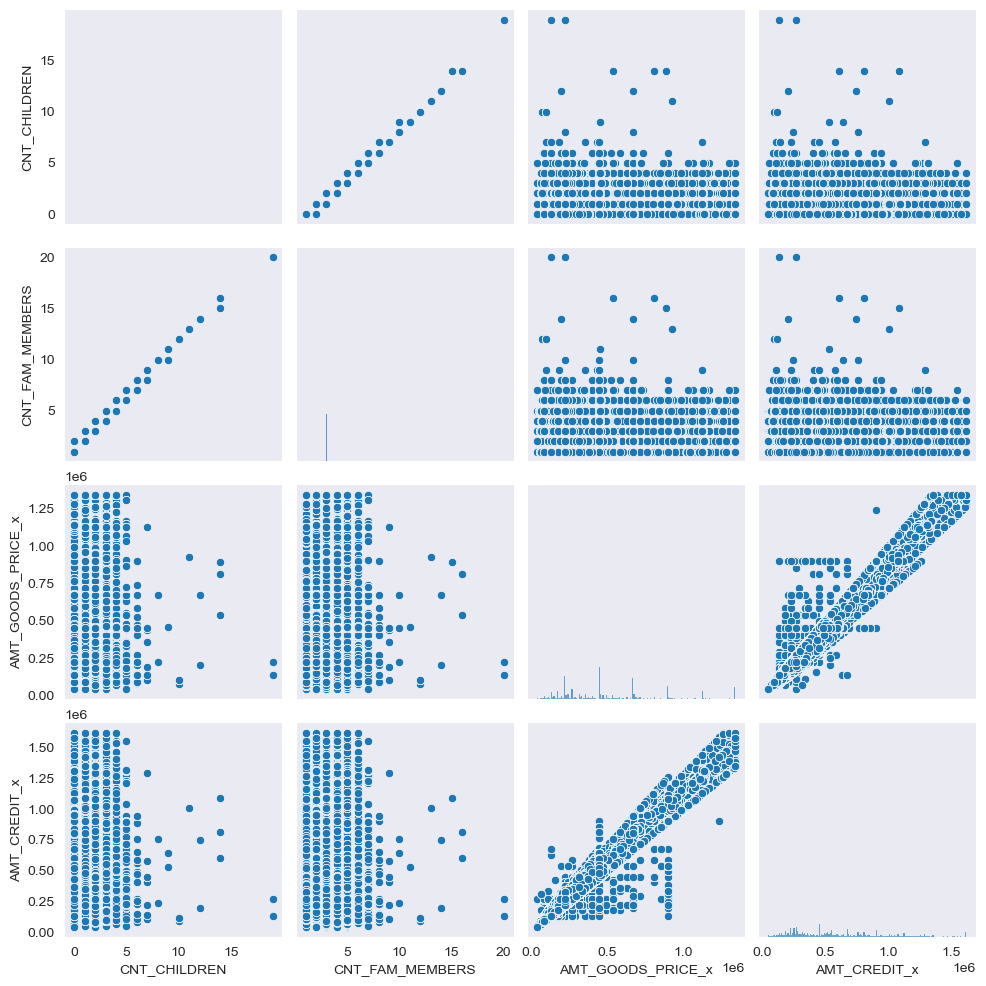

In [219]:
sns.pairplot(merged_dataset[['CNT_CHILDREN', 'CNT_FAM_MEMBERS','AMT_GOODS_PRICE_x', 'AMT_CREDIT_x']])
plt.show()